In [1]:
# %% init
import os
os.chdir("/home/tangir/crmbm/python/shrimp")

from IPython import get_ipython
get_ipython().magic("clear")

import matplotlib.pylab as plt
import matplotlib.dates as mdates
import mrs.reco as reco
import mrs.sim as sim
import mrs.db as db
import mrs.log as log
import mrs.aliases as xxx
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import suspect
from datetime import datetime

plt.close("all")
plt.rcParams['figure.dpi'] = 75
plt.rcParams['figure.max_open_warning'] = 1000
plt.rcParams["figure.figsize"] = [8, 6]
# get_ipython().magic("matplotlib inline")
get_ipython().magic("matplotlib notebook")
log.setLevel(log.INFO)

cm = sns.color_palette("rocket", as_cmap=True)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

(DEBUG) Loaded backend nbAgg version unknown.


# Select datasets

## Load data
Load datasets from SC and brain

In [2]:
rdb_sc = db.data_db("/home/tangir/crmbm/acq_db/sc.pkl")
rdb_brain = db.data_db("/home/tangir/crmbm/acq_db/brain.pkl")

(INFO)  data_db.__init__: initializing db files [in progress]
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/sc.pkl
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/sc_fit.pkl
(INFO)  data_db.__init__: initializing db files [done]
(INFO)  data_db.__init__: initializing db files [in progress]
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/brain.pkl
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/brain_fit.pkl
(INFO)  data_db.__init__: initializing db files [done]


In [3]:
#log.setLevel(log.DEBUG)
df = rdb_sc.extend_df_reco(True)
df_brain = rdb_brain.extend_df_reco(True)
#log.setLevel(log.INFO)

# remove db objects to free memory
del(rdb_sc)
del(rdb_brain)

df

(INFO)  data_db.extend_df_reco: extending dataframe by scraping data...
(INFO)  data_db.extend_df_reco: extending dataframe by scraping data...


patient  study  \
scan_hash                                          
5010227e1b906e17fdeac0fdff8396b2      296      1   
405976f0de3db2b1ea8b83c3accc8994      296      1   
fb81785a61e346c7fdbb37479f312ca5      300      1   
2fff316122fc89a0b4d1f918f6cd62d8      300      1   
77db8d723204884d29a997944390611b      304      1   
40ef3af628211f936a93c79adb00ac9d      307      1   
159437f4b7de93d40c7fef7853019df3      307      1   
4a3a0b1b9f85f1928b9bfb342358fef4      307      1   
1baf6b702f39fefb5ad9e44179057ef7      307      1   
a2b582b37a04bd4efc43138368bc0b96      308      1   
01a46c3d8ebdb2912567745a61ef0d24      310      1   
7cb024e470b0b2b072436635a19a1c00      311      1   
9f8067ea065153da5b3a352d58f6ca23      313      1   
0a58f85af8c32d06cbbca74391447ad2      314      1   
2195967ae34d5ef7dcfba4fc93a9e121      314      1   
fe34c6902afd341a0c81de0a0b6d6373      316      1   
5f9a42662bfe3586bee57f3ead964778      316      1   
3c700829d5feb605285c5ef7cfad4055      319      1   
f416f6db6cda52195e3b8046fc586ef2      319      1   
b9875913db5c0f321922f819401cc02e      328      1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb      329      1   
2a9fe3c48c69e575db0a8eeeb202d44d      329      1   
3695a02a4fbf0153215cf09eaa21658e      333      1   
2e9c959e58727727c1576108fb6ef2b9      336      1   
afb10548c794ebbf8bd304be1f52b0c1      338      1   
ef31f01b58b8279ef0df239b6d15a055      300      2   
62f4072c25c940cd1bfcb41a560749e2      349      1   
90a5b0c9d27daa2396d73e53f5a90afe      355      1   
42063831757801c81193689ead085d37      304      2   
8b934ce052f541a6923805395f44bfb8      304      2   
75ae13bc44bf3d55f5be46d4c59df84d      311      2   
caf8ec7f9e1026afbfa1e2c41ba43539      311      2   
355445d1bac5ee682c88f889b4c01d09      336      2   
967a1b8dace220e916df680759f31d84      336      2   
49872ea4c73b9206c804c4fdaa298ed9      336      2   
fd2940e9489a5d28773792aeb95f54e7      336      2   
90d883145e25fe54b74b05c16b56ace1      319      2   
e8481853cde6f05d66b1c43d8dd00e40      313      2   
da13ac26d45806eaced75e7dd71df1f3      333      2   
e2c8b162388ff1d24dca288885b87e4b      314      2   
45b70edaa2460689b120a7ed10a1f6e1      349      2   

                                                     dataset_legend  \
scan_hash                                                             
5010227e1b906e17fdeac0fdff8396b2                           #0 STEAM   
405976f0de3db2b1ea8b83c3accc8994                 #1 sLASER R:N=20:1   
fb81785a61e346c7fdbb37479f312ca5                 #0 sLASER R:N=25:1   
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
77db8d723204884d29a997944390611b                          #0 crappy   
40ef3af628211f936a93c79adb00ac9d        #0 sLASER 20:1 cardiac trig   
159437f4b7de93d40c7fef7853019df3           #1 sLASER 20:1 resp trig   
4a3a0b1b9f85f1928b9bfb342358fef4             #2 sLASER 20:1 no trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
a2b582b37a04bd4efc43138368bc0b96           #0 sLASER 20:1 resp trig   
01a46c3d8ebdb2912567745a61ef0d24                     #0 sLASER 20:1   
7cb024e470b0b2b072436635a19a1c00                     #0 sLASER 20:1   
9f8067ea065153da5b3a352d58f6ca23                     #0 sLASER 20:1   
0a58f85af8c32d06cbbca74391447ad2                     #0 sLASER 20:1   
2195967ae34d5ef7dcfba4fc93a9e121                      #1 sLASER 5:5   
fe34c6902afd341a0c81de0a0b6d6373                     #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778                      #1 sLASER 5:5   
3c700829d5feb605285c5ef7cfad4055                     #0 sLASER 20:1   
f416f6db6cda52195e3b8046fc586ef2                     #1 sLASER 10:2   
b9875913db5c0f321922f819401cc02e                     #0 sLASER 20:1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb                     #0 sLASER 20:1   
2a9fe3c48c69e575db0a8eeeb202d44d                     #1 sLASER 10:2   
3695a02a4fbf0153215cf09eaa21658e                     #0 sLASER 20:1   
2e9c959e58727727c15761

## Adding additional columns
Like BMI, BFP, etc.

SNR is normalized by:
* voxel size
* number of averages (post-data-rejection)

Therefore
* SNR values are divided by voxel volume and multiplied by a mean volume to get usual SNR values
* SNR values are divided by $\sqrt(NA)$ kept after data rejection and multiplied by $\sqrt(128)$

In [4]:
import datetime
this_year = datetime.date.today().year

# create a patient*study id number
df["patient_study_id"] = df["patient"].astype(str) + "_" + df["study"].astype(str)
df_brain["patient_study_id"] = df_brain["patient"].astype(str) + "_" + df_brain["study"].astype(str)

# calculate bmi
df["dataset_patient_bmi"] = df["dataset_raw_data__patient_weight"] / \
    df["dataset_raw_data__patient_height"]**2

# calculate BFP (IMG)
df["dataset_patient_bfp"] = 1.39 * df["dataset_patient_bmi"]
+ 0.16 * (this_year - pd.DatetimeIndex(df["dataset_raw_data__patient_birthday"]).year)
- 10.34 * (df["dataset_raw_data__patient_sex"] == "M").astype(int)
- 9

# SNR
# final estimations
df["dataset_snr_final"] = df["dataset_raw_analysis-results_cropping_snr"]
df["dataset_lw"] = df["dataset_raw_analysis-results_cropping_lw"]
df["dataset_snr_norm"] = df["dataset_raw_analysis-results_cropping_snr"]

# VOI normalization
# calculate voxel volume
df["dataset_voxel_vol_cm3"] = (np.array(list(df["dataset_raw_data_voxel_dimensions"])) / 10.0).prod()
mean_voxel_vol = df["dataset_voxel_vol_cm3"].mean()
df["dataset_snr_norm"] = df["dataset_snr_norm"] / df["dataset_voxel_vol_cm3"] * mean_voxel_vol

# NA normalization
na_norm = 128.0
df["dataset_snr_norm"] = df["dataset_snr_norm"] / np.sqrt(df["dataset_raw_data__data_rejection[0]_Post-rejection_na"]) * np.sqrt(na_norm)

# signal stability
df["dataset_prerej_amplitude_mean"] = [s[:,0].mean(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_amplitude_std"] = [s[:,0].std(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_linewidth_mean"] = [s[:,1].mean(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_linewidth_std"] = [s[:,1].std(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_chemical_shift_mean"] = [s[:,2].mean(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_chemical_shift_std"] = [s[:,2].std(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_phase_mean"] = [s[:,3].mean(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]
df["dataset_prerej_phase_std"] = [s[:,3].std(axis=0) if(type(s) != np.float) else np.nan for s in df["dataset_raw_data__data_rejection[0]_Pre-rejection_measurements"]]

# calculate theoretical scan time knowing NA and TR, neglicting resp. trig
df["dataset_acqtime"] = df["dataset_raw_data__sequence_tr"] / 1000.0 * (df["dataset_raw_data__sequence_na"] + df["dataset_raw_data__sequence_ds"])
df["dataset_acqtime_eff"] = df["dataset_dcm_data__sequence_eff_acquisition_time"]

# calculating data rejection rate
df["dataset_rejection_rate_prct"] = (df["dataset_raw_data__data_rejection[0]_Pre-rejection_na"] - 
 df["dataset_raw_data__data_rejection[0]_Post-rejection_na"]) / df["dataset_raw_data__data_rejection[0]_Pre-rejection_na"] * 100.0

df

patient  study  \
scan_hash                                          
5010227e1b906e17fdeac0fdff8396b2      296      1   
405976f0de3db2b1ea8b83c3accc8994      296      1   
fb81785a61e346c7fdbb37479f312ca5      300      1   
2fff316122fc89a0b4d1f918f6cd62d8      300      1   
77db8d723204884d29a997944390611b      304      1   
40ef3af628211f936a93c79adb00ac9d      307      1   
159437f4b7de93d40c7fef7853019df3      307      1   
4a3a0b1b9f85f1928b9bfb342358fef4      307      1   
1baf6b702f39fefb5ad9e44179057ef7      307      1   
a2b582b37a04bd4efc43138368bc0b96      308      1   
01a46c3d8ebdb2912567745a61ef0d24      310      1   
7cb024e470b0b2b072436635a19a1c00      311      1   
9f8067ea065153da5b3a352d58f6ca23      313      1   
0a58f85af8c32d06cbbca74391447ad2      314      1   
2195967ae34d5ef7dcfba4fc93a9e121      314      1   
fe34c6902afd341a0c81de0a0b6d6373      316      1   
5f9a42662bfe3586bee57f3ead964778      316      1   
3c700829d5feb605285c5ef7cfad4055      319      1   
f416f6db6cda52195e3b8046fc586ef2      319      1   
b9875913db5c0f321922f819401cc02e      328      1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb      329      1   
2a9fe3c48c69e575db0a8eeeb202d44d      329      1   
3695a02a4fbf0153215cf09eaa21658e      333      1   
2e9c959e58727727c1576108fb6ef2b9      336      1   
afb10548c794ebbf8bd304be1f52b0c1      338      1   
ef31f01b58b8279ef0df239b6d15a055      300      2   
62f4072c25c940cd1bfcb41a560749e2      349      1   
90a5b0c9d27daa2396d73e53f5a90afe      355      1   
42063831757801c81193689ead085d37      304      2   
8b934ce052f541a6923805395f44bfb8      304      2   
75ae13bc44bf3d55f5be46d4c59df84d      311      2   
caf8ec7f9e1026afbfa1e2c41ba43539      311      2   
355445d1bac5ee682c88f889b4c01d09      336      2   
967a1b8dace220e916df680759f31d84      336      2   
49872ea4c73b9206c804c4fdaa298ed9      336      2   
fd2940e9489a5d28773792aeb95f54e7      336      2   
90d883145e25fe54b74b05c16b56ace1      319      2   
e8481853cde6f05d66b1c43d8dd00e40      313      2   
da13ac26d45806eaced75e7dd71df1f3      333      2   
e2c8b162388ff1d24dca288885b87e4b      314      2   
45b70edaa2460689b120a7ed10a1f6e1      349      2   

                                                     dataset_legend  \
scan_hash                                                             
5010227e1b906e17fdeac0fdff8396b2                           #0 STEAM   
405976f0de3db2b1ea8b83c3accc8994                 #1 sLASER R:N=20:1   
fb81785a61e346c7fdbb37479f312ca5                 #0 sLASER R:N=25:1   
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
77db8d723204884d29a997944390611b                          #0 crappy   
40ef3af628211f936a93c79adb00ac9d        #0 sLASER 20:1 cardiac trig   
159437f4b7de93d40c7fef7853019df3           #1 sLASER 20:1 resp trig   
4a3a0b1b9f85f1928b9bfb342358fef4             #2 sLASER 20:1 no trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
a2b582b37a04bd4efc43138368bc0b96           #0 sLASER 20:1 resp trig   
01a46c3d8ebdb2912567745a61ef0d24                     #0 sLASER 20:1   
7cb024e470b0b2b072436635a19a1c00                     #0 sLASER 20:1   
9f8067ea065153da5b3a352d58f6ca23                     #0 sLASER 20:1   
0a58f85af8c32d06cbbca74391447ad2                     #0 sLASER 20:1   
2195967ae34d5ef7dcfba4fc93a9e121                      #1 sLASER 5:5   
fe34c6902afd341a0c81de0a0b6d6373                     #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778                      #1 sLASER 5:5   
3c700829d5feb605285c5ef7cfad4055                     #0 sLASER 20:1   
f416f6db6cda52195e3b8046fc586ef2                     #1 sLASER 10:2   
b9875913db5c0f321922f819401cc02e                     #0 sLASER 20:1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb                     #0 sLASER 20:1   
2a9fe3c48c69e575db0a8eeeb202d44d                     #1 sLASER 10:2   
3695a02a4fbf0153215cf09eaa21658e                     #0 sLASER 20:1   
2e9c959e58727727c15761

## Keep only resp-gating sLASER scans
Keep only:
* semi-LASER scans
* with resp gating
and check that it does not remove any patient of study

In [5]:
n_patient_study_before_filtering = df["patient_study_id"].nunique()

# keep this for big stats about data quality
df_slaser = df.loc[(df["dataset_raw_data__sequence_name"] == "eja_svs_slaser")]
df_brain_slaser = df_brain.loc[df_brain["dataset_raw_data__sequence_name"] == "eja_svs_slaser"]

df_slaser_resptrig = df.loc[(df["dataset_raw_data__sequence_name"] == "eja_svs_slaser")
                          & (df["dataset_raw_data__sequence_gating_mode"] == sim.gating_signal_source.RESP_GATING)]

df_removed = df.loc[(df["dataset_raw_data__sequence_name"] != "eja_svs_slaser")
                  | (df["dataset_raw_data__sequence_gating_mode"] != sim.gating_signal_source.RESP_GATING)]

# check that we did not remove any patient/study
n_patient_study_after_filtering = df_slaser_resptrig["patient_study_id"].nunique()

df_removed

patient  study  \
scan_hash                                          
5010227e1b906e17fdeac0fdff8396b2      296      1   
405976f0de3db2b1ea8b83c3accc8994      296      1   
fb81785a61e346c7fdbb37479f312ca5      300      1   
77db8d723204884d29a997944390611b      304      1   
40ef3af628211f936a93c79adb00ac9d      307      1   
4a3a0b1b9f85f1928b9bfb342358fef4      307      1   
90a5b0c9d27daa2396d73e53f5a90afe      355      1   
caf8ec7f9e1026afbfa1e2c41ba43539      311      2   
355445d1bac5ee682c88f889b4c01d09      336      2   
49872ea4c73b9206c804c4fdaa298ed9      336      2   
fd2940e9489a5d28773792aeb95f54e7      336      2   

                                                dataset_legend  \
scan_hash                                                        
5010227e1b906e17fdeac0fdff8396b2                      #0 STEAM   
405976f0de3db2b1ea8b83c3accc8994            #1 sLASER R:N=20:1   
fb81785a61e346c7fdbb37479f312ca5            #0 sLASER R:N=25:1   
77db8d723204884d29a997944390611b                     #0 crappy   
40ef3af628211f936a93c79adb00ac9d   #0 sLASER 20:1 cardiac trig   
4a3a0b1b9f85f1928b9bfb342358fef4        #2 sLASER 20:1 no trig   
90a5b0c9d27daa2396d73e53f5a90afe             #0 sLASER TE=52ms   
caf8ec7f9e1026afbfa1e2c41ba43539  #1 sLASER 20/1 NA=128 notrig   
355445d1bac5ee682c88f889b4c01d09   #0 sLASER 10/2 NA=64 notrig   
49872ea4c73b9206c804c4fdaa298ed9   #1 sLASER 20/1 NA=64 notrig   
fd2940e9489a5d28773792aeb95f54e7    #2 sLASER 5/5 NA=64 notrig   

                                                               dataset_raw_files[0]  \
scan_hash                                                                             
5010227e1b906e17fdeac0fdff8396b2  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
405976f0de3db2b1ea8b83c3accc8994  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
77db8d723204884d29a997944390611b  /home/tangir/crmbm/acq/304-ka-p1-moelle/201908...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
90a5b0c9d27daa2396d73e53f5a90afe  /home/tangir/crmbm/acq_twix/355-st-p1-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
fd2940e9489a5d28773792aeb95f54e7  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_files[1]  \
scan_hash                                                                             
5010227e1b906e17fdeac0fdff8396b2  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
405976f0de3db2b1ea8b83c3accc8994  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
77db8d723204884d29a997944390611b  /home/tangir/crmbm/acq/304-ka-p1-moelle/201908...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
90a5b0c9d27daa2396d73e53f5a90afe  /home/tangir/crmbm/acq_twix/355-st-p1-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
fd2940e9489a5d28773792aeb95f54e7  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_data_obj  \
scan_hash                                                                             
5010227e1b906e17fdeac0fdff8396b2  [(5.906507327308433+113.60

In [6]:
if(n_patient_study_before_filtering != n_patient_study_after_filtering):
    log.warning("we removed some patient or study from the db: %d vs %d" % (n_patient_study_before_filtering, n_patient_study_after_filtering))


(WARNING) <ipython-input-6-b04a913462c2>.<module>: we removed some patient or study from the db: 27 vs 24


I have been going over the datasets rejected here:

* 296_ym_p1_brainmoelle: one of the first SC scans, was not resp gating at the time, too bad but only P1 (no P2)
* 300_pm_p1_moelle: removing one no gating scan, there is another one with trig so OK
* 304_ka_p1_moelle: removing this P1 study (there is a P2 that will be considered P1), data was crappy, dicom only, and no trig for some reason
* 307_ap_p1_moelle: removing 2 scans (no trig and cardiac trig) that were done for tests, still a 2 resp trig left)
* 355_st_p1_moelle: removing scan and therefore patient, no resp trig because I was in hurry. Too bad, the data is not soo bad and it was a fat guy (cohort stats) :(
* 311_sl_p2_moelle, 336_nb_p2_moelle: just some trig tests removed, no patient or study removed

So removed 3 patient or study in total because not following the standard protocol (semiLASER + resp gating)

## Find any orphan P2 studies
and set them as P1 :)

In [7]:
# using previously filtered db
df = df_slaser_resptrig

# init new df
df_orphan_p2_fix = pd.DataFrame(columns=df.columns)

# browse the df
for this_index, this_row in df.iterrows():
    # if meet a P2 study
    if(this_row["study"] == 2):
        # get the patient
        this_patient = this_row["patient"]
        # find corresponding P1
        df_patient_p1 = df.loc[(df["patient"] == this_patient)
                             & (df["study"] == 1)]
        # if empty
        if(df_patient_p1.empty):
            # change the P2 we are on into a P1
            this_row["study"] = 1
    
    # store it
    df_orphan_p2_fix = df_orphan_p2_fix.append([this_row])
        
        
df_orphan_p2_fix

patient study  \
2fff316122fc89a0b4d1f918f6cd62d8     300     1   
159437f4b7de93d40c7fef7853019df3     307     1   
1baf6b702f39fefb5ad9e44179057ef7     307     1   
a2b582b37a04bd4efc43138368bc0b96     308     1   
01a46c3d8ebdb2912567745a61ef0d24     310     1   
7cb024e470b0b2b072436635a19a1c00     311     1   
9f8067ea065153da5b3a352d58f6ca23     313     1   
0a58f85af8c32d06cbbca74391447ad2     314     1   
2195967ae34d5ef7dcfba4fc93a9e121     314     1   
fe34c6902afd341a0c81de0a0b6d6373     316     1   
5f9a42662bfe3586bee57f3ead964778     316     1   
3c700829d5feb605285c5ef7cfad4055     319     1   
f416f6db6cda52195e3b8046fc586ef2     319     1   
b9875913db5c0f321922f819401cc02e     328     1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb     329     1   
2a9fe3c48c69e575db0a8eeeb202d44d     329     1   
3695a02a4fbf0153215cf09eaa21658e     333     1   
2e9c959e58727727c1576108fb6ef2b9     336     1   
afb10548c794ebbf8bd304be1f52b0c1     338     1   
ef31f01b58b8279ef0df239b6d15a055     300     2   
62f4072c25c940cd1bfcb41a560749e2     349     1   
42063831757801c81193689ead085d37     304     1   
8b934ce052f541a6923805395f44bfb8     304     1   
75ae13bc44bf3d55f5be46d4c59df84d     311     2   
967a1b8dace220e916df680759f31d84     336     2   
90d883145e25fe54b74b05c16b56ace1     319     2   
e8481853cde6f05d66b1c43d8dd00e40     313     2   
da13ac26d45806eaced75e7dd71df1f3     333     2   
e2c8b162388ff1d24dca288885b87e4b     314     2   
45b70edaa2460689b120a7ed10a1f6e1     349     2   

                                                     dataset_legend  \
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
159437f4b7de93d40c7fef7853019df3           #1 sLASER 20:1 resp trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
a2b582b37a04bd4efc43138368bc0b96           #0 sLASER 20:1 resp trig   
01a46c3d8ebdb2912567745a61ef0d24                     #0 sLASER 20:1   
7cb024e470b0b2b072436635a19a1c00                     #0 sLASER 20:1   
9f8067ea065153da5b3a352d58f6ca23                     #0 sLASER 20:1   
0a58f85af8c32d06cbbca74391447ad2                     #0 sLASER 20:1   
2195967ae34d5ef7dcfba4fc93a9e121                      #1 sLASER 5:5   
fe34c6902afd341a0c81de0a0b6d6373                     #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778                      #1 sLASER 5:5   
3c700829d5feb605285c5ef7cfad4055                     #0 sLASER 20:1   
f416f6db6cda52195e3b8046fc586ef2                     #1 sLASER 10:2   
b9875913db5c0f321922f819401cc02e                     #0 sLASER 20:1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb                     #0 sLASER 20:1   
2a9fe3c48c69e575db0a8eeeb202d44d                     #1 sLASER 10:2   
3695a02a4fbf0153215cf09eaa21658e                     #0 sLASER 20:1   
2e9c959e58727727c1576108fb6ef2b9                     #0 sLASER 20:1   
afb10548c794ebbf8bd304be1f52b0c1                  #0 sLASER 20:1 WS   
ef31f01b58b8279ef0df239b6d15a055      #0 sLASER 20:1 (REF with OVS)   
62f4072c25c940cd1bfcb41a560749e2      #0 sLASER 10:2 (REF with OVS)   
42063831757801c81193689ead085d37      #0 1st try (30-40Hz water LW)   
8b934ce052f541a6923805395f44bfb8         #1 2nd try (25Hz water LW)   
75ae13bc44bf3d55f5be46d4c59df84d         #0 sLASER 20/1 NA=128 trig   
967a1b8dace220e916df680759f31d84         #0 sLASER 20/1 NA=128 trig   
90d883145e25fe54b74b05c16b56ace1          #0 sLASER 10/2 NA=64 trig   
e8481853cde6f05d66b1c43d8dd00e40                     #0 sLASER 20/1   
da13ac26d45806eaced75e7dd71df1f3                     #0 sLASER 20/1   
e2c8b162388ff1d24dca288885b87e4b              #0 sLASER 20/1 NA=128   
45b70edaa2460689b120a7ed10a1f6e1              #0 sLASER 10/2 NA=128   

                                                               dataset_raw_files[0]  \
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
159437f4b7de93d40c7fef7853019df3  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
1baf6b702f39fefb5ad

## Keep only one scan per study
Now, on resp-gating sLASER, keep only one scan per study based on SNR and LW. This is the core group that will be used for the paper's stats.

In [8]:
# using previously filtered db
df = df_orphan_p2_fix

n_patient_study_before_filtering = df["patient_study_id"].nunique()

df_onescan_per_study = pd.DataFrame(columns=df.columns)
patient_study_id_done = []
for this_index, this_row in df.iterrows():
    # find duplicates
    if(this_row["patient_study_id"] not in patient_study_id_done):
        this_df_dup = df.loc[df["patient_study_id"] == this_row["patient_study_id"]]
        this_df_dup_best_snr = this_df_dup.loc[this_df_dup["dataset_raw_analysis-results_cropping_snr"] == this_df_dup["dataset_raw_analysis-results_cropping_snr"].max()]
        df_onescan_per_study = df_onescan_per_study.append([this_df_dup_best_snr])
        patient_study_id_done.append(this_row["patient_study_id"])

n_patient_study_after_filtering = df_onescan_per_study["patient_study_id"].nunique()

if(n_patient_study_before_filtering != n_patient_study_after_filtering):
    log.warning("we removed some patient or study from the db: %d vs %d" % (n_patient_study_before_filtering, n_patient_study_after_filtering))

df_onescan_per_study

patient study  \
2fff316122fc89a0b4d1f918f6cd62d8     300     1   
1baf6b702f39fefb5ad9e44179057ef7     307     1   
a2b582b37a04bd4efc43138368bc0b96     308     1   
01a46c3d8ebdb2912567745a61ef0d24     310     1   
7cb024e470b0b2b072436635a19a1c00     311     1   
9f8067ea065153da5b3a352d58f6ca23     313     1   
0a58f85af8c32d06cbbca74391447ad2     314     1   
5f9a42662bfe3586bee57f3ead964778     316     1   
f416f6db6cda52195e3b8046fc586ef2     319     1   
b9875913db5c0f321922f819401cc02e     328     1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb     329     1   
3695a02a4fbf0153215cf09eaa21658e     333     1   
2e9c959e58727727c1576108fb6ef2b9     336     1   
afb10548c794ebbf8bd304be1f52b0c1     338     1   
ef31f01b58b8279ef0df239b6d15a055     300     2   
62f4072c25c940cd1bfcb41a560749e2     349     1   
42063831757801c81193689ead085d37     304     1   
75ae13bc44bf3d55f5be46d4c59df84d     311     2   
967a1b8dace220e916df680759f31d84     336     2   
90d883145e25fe54b74b05c16b56ace1     319     2   
e8481853cde6f05d66b1c43d8dd00e40     313     2   
da13ac26d45806eaced75e7dd71df1f3     333     2   
e2c8b162388ff1d24dca288885b87e4b     314     2   
45b70edaa2460689b120a7ed10a1f6e1     349     2   

                                                     dataset_legend  \
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
a2b582b37a04bd4efc43138368bc0b96           #0 sLASER 20:1 resp trig   
01a46c3d8ebdb2912567745a61ef0d24                     #0 sLASER 20:1   
7cb024e470b0b2b072436635a19a1c00                     #0 sLASER 20:1   
9f8067ea065153da5b3a352d58f6ca23                     #0 sLASER 20:1   
0a58f85af8c32d06cbbca74391447ad2                     #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778                      #1 sLASER 5:5   
f416f6db6cda52195e3b8046fc586ef2                     #1 sLASER 10:2   
b9875913db5c0f321922f819401cc02e                     #0 sLASER 20:1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb                     #0 sLASER 20:1   
3695a02a4fbf0153215cf09eaa21658e                     #0 sLASER 20:1   
2e9c959e58727727c1576108fb6ef2b9                     #0 sLASER 20:1   
afb10548c794ebbf8bd304be1f52b0c1                  #0 sLASER 20:1 WS   
ef31f01b58b8279ef0df239b6d15a055      #0 sLASER 20:1 (REF with OVS)   
62f4072c25c940cd1bfcb41a560749e2      #0 sLASER 10:2 (REF with OVS)   
42063831757801c81193689ead085d37      #0 1st try (30-40Hz water LW)   
75ae13bc44bf3d55f5be46d4c59df84d         #0 sLASER 20/1 NA=128 trig   
967a1b8dace220e916df680759f31d84         #0 sLASER 20/1 NA=128 trig   
90d883145e25fe54b74b05c16b56ace1          #0 sLASER 10/2 NA=64 trig   
e8481853cde6f05d66b1c43d8dd00e40                     #0 sLASER 20/1   
da13ac26d45806eaced75e7dd71df1f3                     #0 sLASER 20/1   
e2c8b162388ff1d24dca288885b87e4b              #0 sLASER 20/1 NA=128   
45b70edaa2460689b120a7ed10a1f6e1              #0 sLASER 10/2 NA=128   

                                                               dataset_raw_files[0]  \
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
1baf6b702f39fefb5ad9e44179057ef7  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
a2b582b37a04bd4efc43138368bc0b96  /home/tangir/crmbm/acq_twix/308-rs-p1-moelle/m...   
01a46c3d8ebdb2912567745a61ef0d24  /home/tangir/crmbm/acq_twix/310-mg-p1-moelle/m...   
7cb024e470b0b2b072436635a19a1c00  /home/tangir/crmbm/acq_twix/311-sl-p1-moelle/m...   
9f8067ea065153da5b3a352d58f6ca23  /home/tangir/crmbm/acq_twix/313-ft-p1-moelle/m...   
0a58f85af8c32d06cbbca74391447ad2  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
5f9a42662bfe3586bee57f3ead964778  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
f416f6db6cda52195e3b8046fc586ef2  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
b9875913db5c0f321922f819401cc02e  /home/tangir/crmbm/acq_twix/328-af-p1-moelle/m...   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb  /home/tangir/cr

Now on brain data:

In [9]:
# using previously filtered db
df = df_brain_slaser

df_brain_onescan_per_study = pd.DataFrame(columns=df.columns)
patient_study_id_done = []
for this_index, this_row in df.iterrows():
    # find duplicates
    if(this_row["patient_study_id"] not in patient_study_id_done):
        this_df_dup = df.loc[df["patient_study_id"] == this_row["patient_study_id"]]
        this_df_dup_best_snr = this_df_dup.loc[this_df_dup["dataset_raw_analysis-results_cropping_snr"] == this_df_dup["dataset_raw_analysis-results_cropping_snr"].max()]
        df_brain_onescan_per_study = df_brain_onescan_per_study.append([this_df_dup_best_snr])
        patient_study_id_done.append(this_row["patient_study_id"])

df_brain_onescan_per_study

patient study  \
b057a3e07319341e032e3c6c36ec4d83     296     1   
c8c12d0843d056ad058d51fd96b360f5     308     1   
c7afef7aa25e055763846fa0ec43d26d     347     1   

                                                    dataset_legend  \
b057a3e07319341e032e3c6c36ec4d83        #1 brain - sLASER R:N=25:1   
c8c12d0843d056ad058d51fd96b360f5  #0 brain - sLASER 20:1 resp trig   
c7afef7aa25e055763846fa0ec43d26d            #0 sLASER 10:2 TE=30ms   

                                                               dataset_raw_files[0]  \
b057a3e07319341e032e3c6c36ec4d83  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
c8c12d0843d056ad058d51fd96b360f5  /home/tangir/crmbm/acq_twix/308-rs-p1-moelle/m...   
c7afef7aa25e055763846fa0ec43d26d  /home/tangir/crmbm/acq_twix/347-re-p1-moelle/m...   

                                                               dataset_raw_files[1]  \
b057a3e07319341e032e3c6c36ec4d83  /home/tangir/crmbm/acq_twix/296_ym_p1_brainmoe...   
c8c12d0843d056ad058d51fd96b360f5  /home/tangir/crmbm/acq_twix/308-rs-p1-moelle/m...   
c7afef7aa25e055763846fa0ec43d26d  /home/tangir/crmbm/acq_twix/347-re-p1-moelle/m...   

                                                               dataset_raw_data_obj  \
b057a3e07319341e032e3c6c36ec4d83  [(689.0669802502591-136.65124370561344j), (671...   
c8c12d0843d056ad058d51fd96b360f5  [(813.0401020344693-48.68837082080384j), (795....   
c7afef7aa25e055763846fa0ec43d26d  [(309.48049560871294+61.897647154302284j), (27...   

                                  dataset_raw_data__dt  dataset_raw_data__f0  \
b057a3e07319341e032e3c6c36ec4d83                0.0001            297.206367   
c8c12d0843d056ad058d51fd96b360f5                0.0001            297.206456   
c7afef7aa25e055763846fa0ec43d26d                0.0001            297.206385   

                                  dataset_raw_data__te  dataset_raw_data__tr  \
b057a3e07319341e032e3c6c36ec4d83                 49.96                3500.0   
c8c12d0843d056ad058d51fd96b360f5                 49.96                3000.0   
c7afef7aa25e055763846fa0ec43d26d                 30.28                3660.0   

                                  ...  \
b057a3e07319341e032e3c6c36ec4d83  ...   
c8c12d0843d056ad058d51fd96b360f5  ...   
c7afef7aa25e055763846fa0ec43d26d  ...   

                                  reco_pipeline_analyze_job_list[3]_POI_shift_range_ppm[1]  \
b057a3e07319341e032e3c6c36ec4d83                                                5.2          
c8c12d0843d056ad058d51fd96b360f5                                                5.2          
c7afef7aa25e055763846fa0ec43d26d                                                5.2          

                                 reco_pipeline_analyze_job_list[3]_POI_shift_true_ppm  \
b057a3e07319341e032e3c6c36ec4d83                                                4.7     
c8c12d0843d056ad058d51fd96b360f5                                                4.7     
c7afef7aa25e055763846fa0ec43d26d                                                4.7     

                                 reco_pipeline_analyze_job_list[3]_display  \
b057a3e07319341e032e3c6c36ec4d83                                     False   
c8c12d0843d056ad058d51fd96b360f5                                     False   
c7afef7aa25e055763846fa0ec43d26d                                     False   

                                 reco_pipeline_analyze_job_list[3]_display_range_ppm[0]  \
b057a3e07319341e032e3c6c36ec4d83                                                  1       
c8c12d0843d056ad058d51fd96b360f5                                                  1       
c7afef7aa25e055763846fa0ec43d26d                                                  1       

                                 reco_pipeline_analyze_job_list[3]_display_range_ppm[1]  \
b057a3e07319341e032e3c6c36ec4d83                                                  6       
c8c12d0843d056ad058d51fd96b360f5                                                  6       
c7afef7aa25e

## Final df
For SC and brain

In [10]:
# using previously filtered db
df_sc = df_onescan_per_study
df_sc_all_slaser = df_slaser
df_brain = df_brain_onescan_per_study

## Free some memory

In [11]:
for var_name in dir():
    if(var_name.startswith("df") and var_name not in ["df_sc",
                                                      "df_sc_all_slaser",
                                                      "df_brain"]):
        del globals()[var_name]

df_sc.info(memory_usage='deep')
df_sc_all_slaser.info(memory_usage='deep')
df_brain.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2fff316122fc89a0b4d1f918f6cd62d8 to 45b70edaa2460689b120a7ed10a1f6e1
Columns: 3109 entries, patient to dataset_rejection_rate_prct
dtypes: datetime64[ns](30), float64(1929), object(1150)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 405976f0de3db2b1ea8b83c3accc8994 to 45b70edaa2460689b120a7ed10a1f6e1
Columns: 3109 entries, patient to dataset_rejection_rate_prct
dtypes: bool(80), datetime64[ns](30), float64(1787), int64(85), object(1127)
memory usage: 2.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, b057a3e07319341e032e3c6c36ec4d83 to c7afef7aa25e055763846fa0ec43d26d
Columns: 1902 entries, patient to patient_study_id
dtypes: datetime64[ns](18), float64(968), object(916)
memory usage: 145.7 KB


# Cohort & anatomy

## [FIG1] Subject, height, weight, BMI, BFP
To check cohort characteristics

<IPython.core.display.Javascript object>


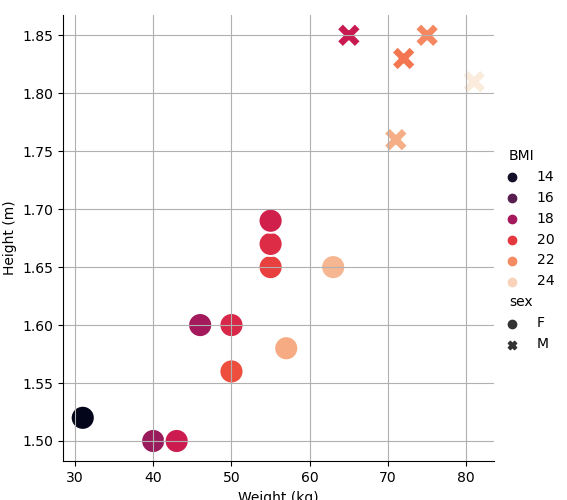

<IPython.core.display.Javascript object>


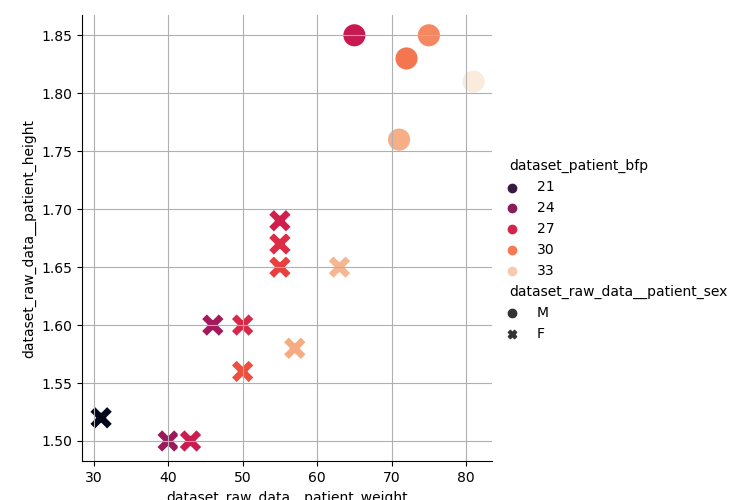

Mean weight = 56.81kgs +/-13.69 
Mean height = 1.66m +/-0.12 
Mean BMI = 20.22 +/-2.70 
Sex = M(5) F(11)


In [12]:
df = df_sc.loc[df_sc["study"] == 1]

this_df = df

this_df = this_df.rename(columns = {'dataset_raw_data__patient_weight':'Weight (kg)'})
this_df = this_df.rename(columns = {'dataset_raw_data__patient_height':'Height (m)'})
this_df = this_df.rename(columns = {'dataset_patient_bmi':'BMI'})
this_df = this_df.rename(columns = {'dataset_raw_data__patient_sex':'sex'})
 
g = sns.relplot(x="Weight (kg)", y="Height (m)", hue="BMI", palette=cm, style="sex", style_order=['F', 'M'],
                s=300, data=this_df)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

x = df["dataset_raw_data__patient_weight"]
y = df["dataset_raw_data__patient_height"]
z = df["dataset_patient_bfp"]
zz = df["dataset_raw_data__patient_sex"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, style=zz, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

print("Mean weight = %.2fkgs +/-%.2f " % (df["dataset_raw_data__patient_weight"].mean(),
                                          df["dataset_raw_data__patient_weight"].std()))
print("Mean height = %.2fm +/-%.2f " % (df["dataset_raw_data__patient_height"].mean(),
                                        df["dataset_raw_data__patient_height"].std()))
print("Mean BMI = %.2f +/-%.2f " % (df["dataset_patient_bmi"].mean(), 
                                    df["dataset_patient_bmi"].std()))

sex_counts = df["dataset_raw_data__patient_sex"].value_counts()
print("Sex = M(%d) F(%d)" % (sex_counts["M"], sex_counts["F"]))

Well ok, the cohort is not super... A lot of women, small and thin. :s

## $B_1$ power (ref. voltage) & BMI
Do we have a dependence between reference voltage and BMI/BFP?

<IPython.core.display.Javascript object>


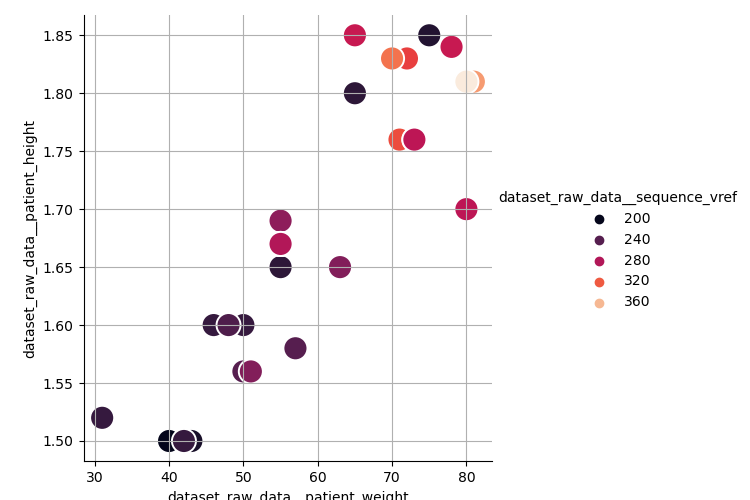

<IPython.core.display.Javascript object>


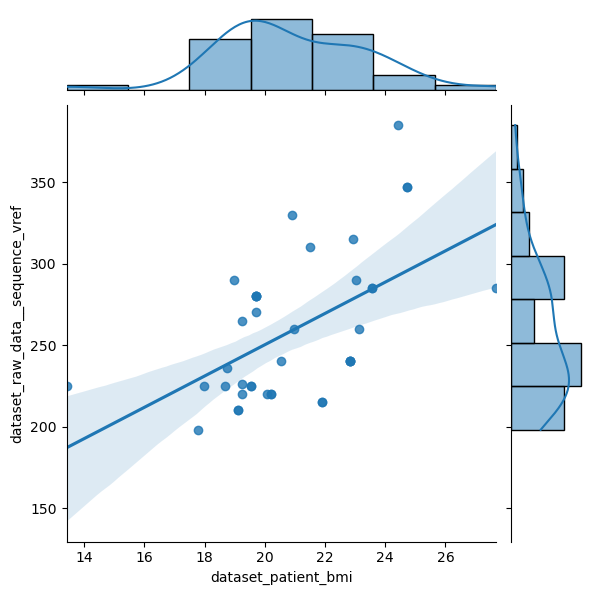

R = 0.55


<IPython.core.display.Javascript object>


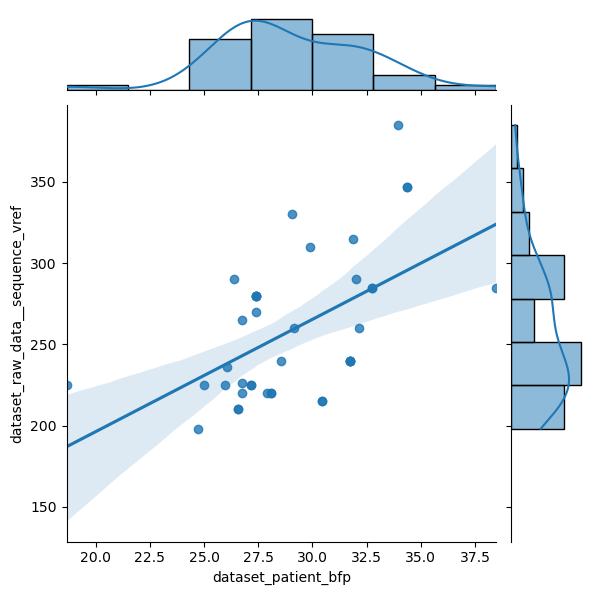

R = 0.55


In [13]:
df = df_sc_all_slaser

x = df["dataset_raw_data__patient_weight"]
y = df["dataset_raw_data__patient_height"]
z = df["dataset_raw_data__sequence_vref"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

x = df["dataset_patient_bmi"]
y = df["dataset_raw_data__sequence_vref"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bfp"]
y = df["dataset_raw_data__sequence_vref"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Like for SC imaging, there is here a "strong" correlation between Vref and BMI/BFP.

## Voxel position & BMI
Does the voxel position change with BMI?

<IPython.core.display.Javascript object>


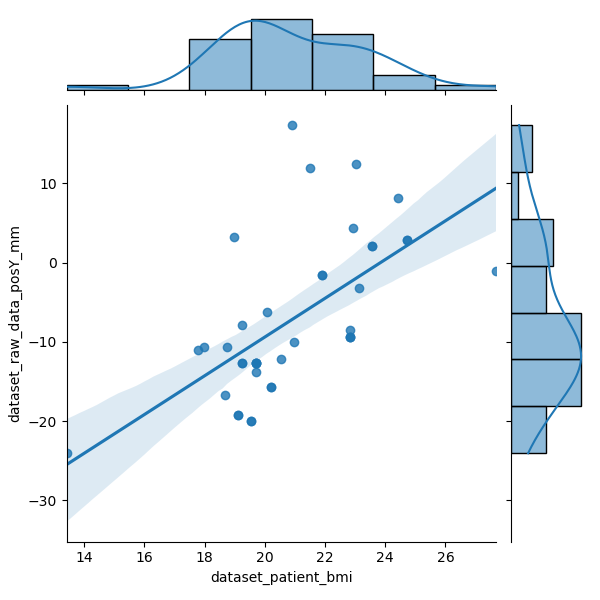

R = 0.63


<IPython.core.display.Javascript object>


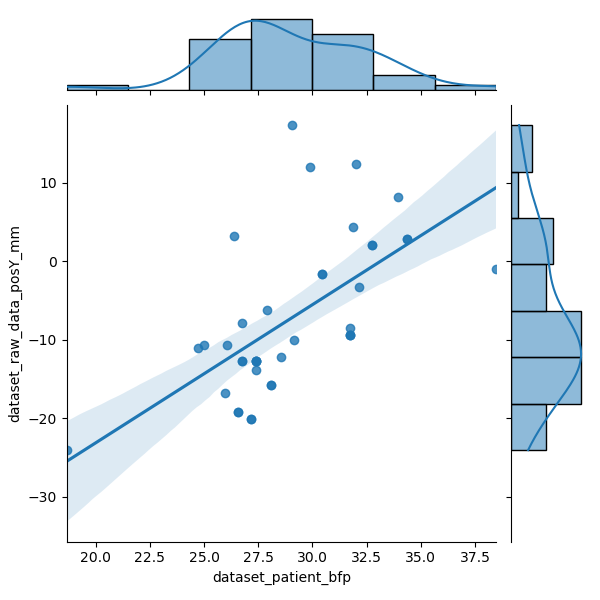

R = 0.63


In [14]:
df = df_sc_all_slaser

# add voxel position to df
df["dataset_raw_data_posX_mm"] = np.array([o.position[0] for o in df["dataset_raw_data_obj"]])
df["dataset_raw_data_posY_mm"] = np.array([o.position[1] for o in df["dataset_raw_data_obj"]])
df["dataset_raw_data_posZ_mm"] = np.array([o.position[2] for o in df["dataset_raw_data_obj"]])

x = df["dataset_patient_bmi"]
y = -df["dataset_raw_data_posY_mm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bfp"]
y = -df["dataset_raw_data_posY_mm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

The voxel position in Y is nicely correlated with BMI/BFP. THe bigger you are, the higher will the voxel and therefore the further a way from the coil...

# Data quality

## [FIG2a] SNR & LW vs. BMI

<IPython.core.display.Javascript object>


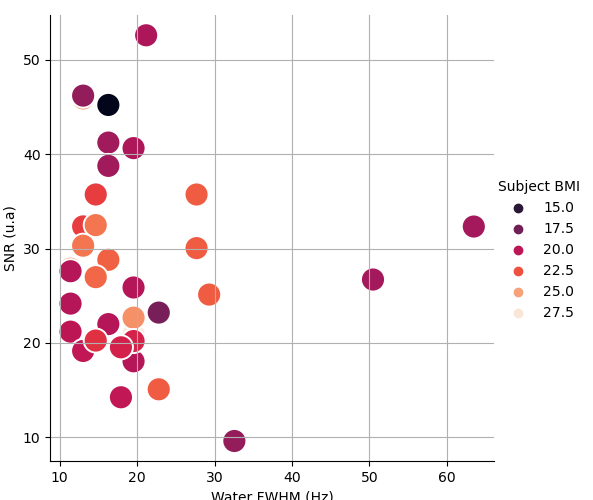

<IPython.core.display.Javascript object>


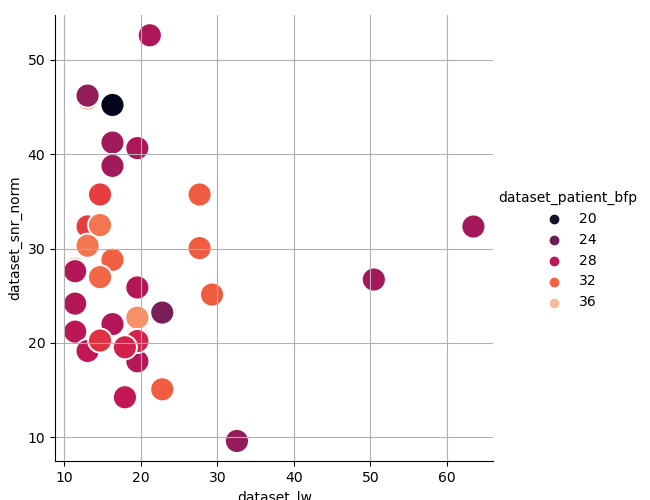

<IPython.core.display.Javascript object>


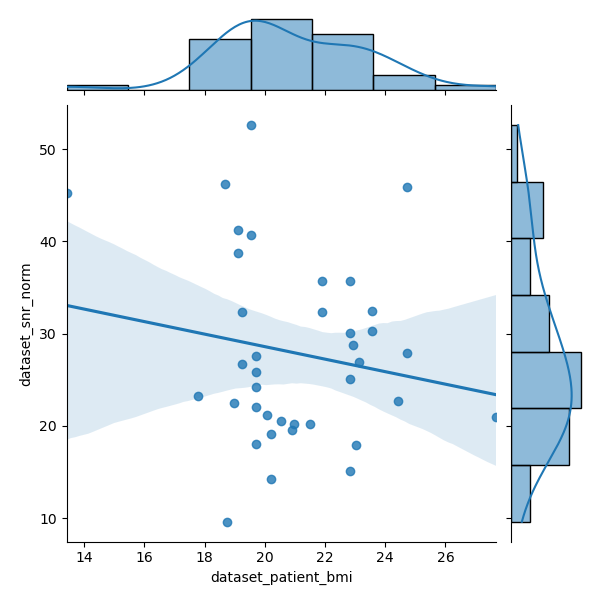

R = -0.17


<IPython.core.display.Javascript object>


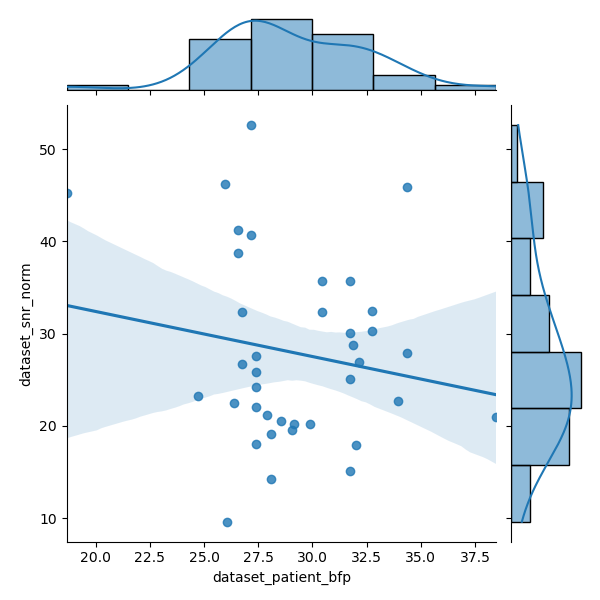

R = -0.17


In [15]:
df = df_sc_all_slaser

this_df = df
this_df = this_df.rename(columns = {'dataset_lw':'Water FWHM (Hz)'})
this_df = this_df.rename(columns = {'dataset_snr_norm':'SNR (u.a)'})
this_df = this_df.rename(columns = {'dataset_patient_bmi':'Subject BMI'})
g = sns.relplot(x="Water FWHM (Hz)", y="SNR (u.a)", hue="Subject BMI", palette=cm, s=300, data=this_df)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

x = df["dataset_lw"]
y = df["dataset_snr_norm"]
z = df["dataset_patient_bfp"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

# only SNR
x = df["dataset_patient_bmi"]
y = df["dataset_snr_norm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bfp"]
y = df["dataset_snr_norm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))


## SNR vs. voxel position (BMI)

There could be some slight SNR dependance with BMI...

SNR is normalized by:
* voxel position in Y

Therefore
* SNR values are multiplied by $(1+\frac{y^2}{R^2})^{\frac{2}{3}}$ and multiplied by $(1+\frac{y_{mean}^2}{R^2})^{\frac{2}{3}}$

According to the Biot–Savart law (Jackson, 1975), cited in https://doi.org/10.1201/9781315107325, the distance relative to the RF loop surface coil impacts SNR with a $(1+\frac{y^2}{R^2})^{\frac{2}{3}}$ term. $y$ is the absolute distance between the voxel and the RF coil, $R$ is the coil radius. $y_{mean}$ is the average $y$ position over the whole group.

The problem is to evaluate this absolute distance to coil when I only know the voxel position relative to the magnet center... Let's take the lowest voxel position in the study group, probably for the thinnest subject and consider that we were 4cm away from the coil.

Ok, another problem is that we were using a multi-channel Rx spinal cord coil. What do I put for the radius? Assuing a 14cm radius coil... Big approximation.

<IPython.core.display.Javascript object>


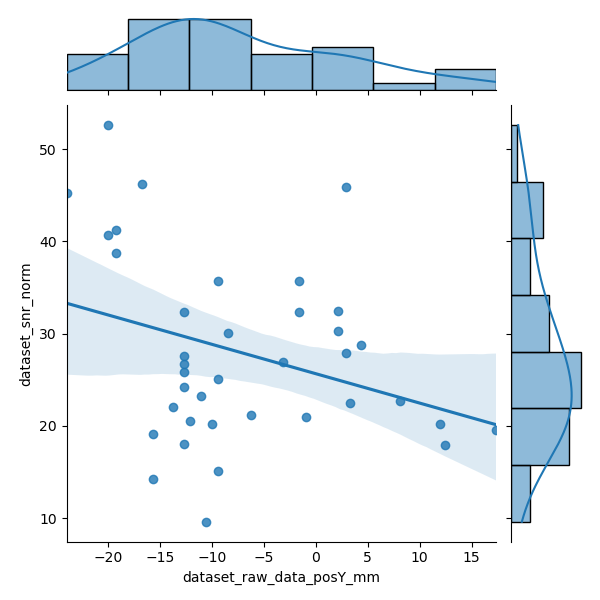

R = -0.32


<IPython.core.display.Javascript object>


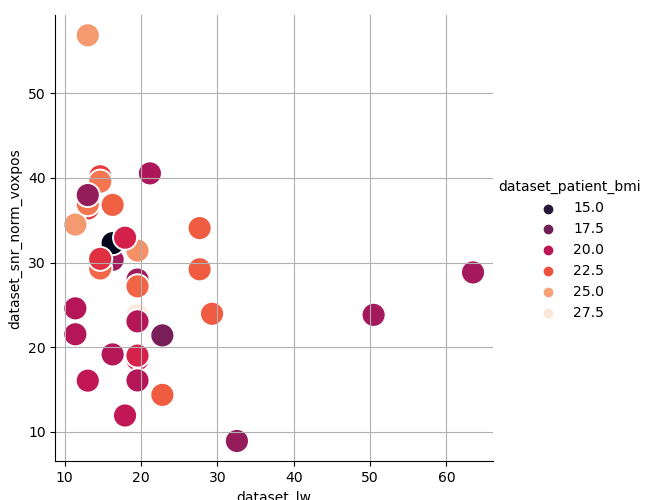

<IPython.core.display.Javascript object>


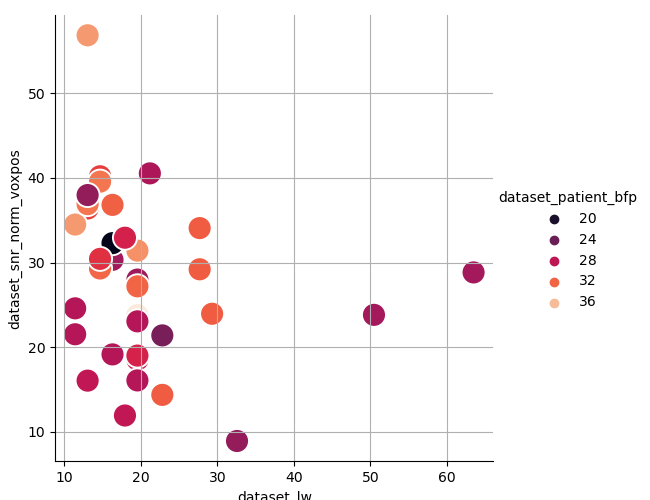

<IPython.core.display.Javascript object>


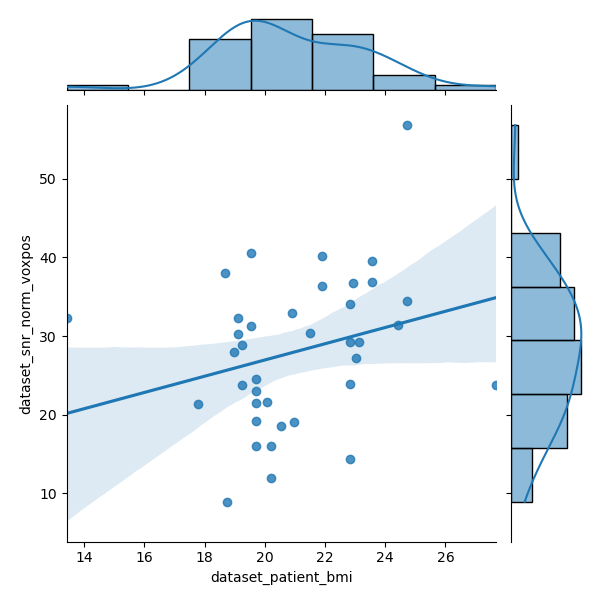

R = 0.27


<IPython.core.display.Javascript object>


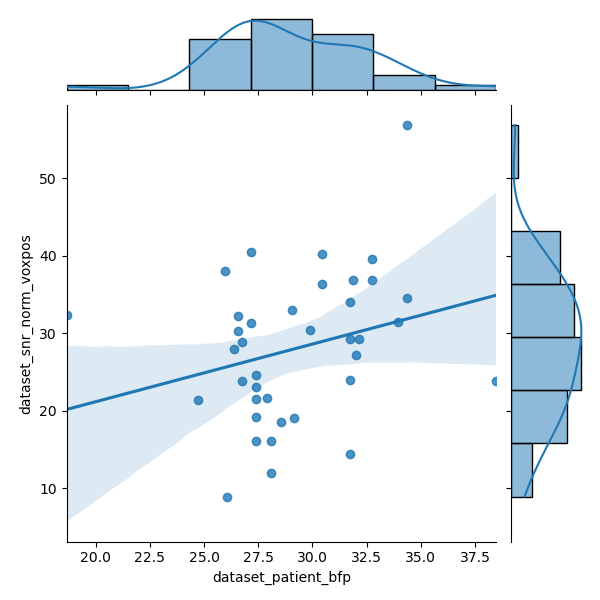

R = 0.27


In [16]:
df = df_sc_all_slaser

# does the Y position has an effect on SNR?
x = -df["dataset_raw_data_posY_mm"]
y = df["dataset_snr_norm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

# Y voxel position normalization
min_dist_voxel_coil_mm = 40.0  # mm
coil_radius_mm = 140.0 / 2  # mm 
# looking for minimum Y position
max_pos = np.max(df["dataset_raw_data_posY_mm"])
df["dataset_raw_data_posY_mm_abs"] = -(df["dataset_raw_data_posY_mm"] - max_pos) + min_dist_voxel_coil_mm
mean_abs_y_pos = df["dataset_raw_data_posY_mm_abs"].mean()
# normalization
df["dataset_snr_norm_voxpos"] = df["dataset_snr_norm"] * np.power(1 + np.power(df["dataset_raw_data_posY_mm_abs"], 2) / np.power(coil_radius_mm, 2), 3/2)
df["dataset_snr_norm_voxpos"] = df["dataset_snr_norm_voxpos"] / np.power(1 + np.power(mean_abs_y_pos, 2) / np.power(coil_radius_mm, 2), 3/2)

x = df["dataset_lw"]
y = df["dataset_snr_norm_voxpos"]
z = df["dataset_patient_bmi"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

x = df["dataset_lw"]
y = df["dataset_snr_norm_voxpos"]
z = df["dataset_patient_bfp"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

# only SNR
x = df["dataset_patient_bmi"]
y = df["dataset_snr_norm_voxpos"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bfp"]
y = df["dataset_snr_norm_voxpos"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

No more correlation in those last plots? Because we corected the SNR change due to voxel Y position.

To conclude, SNR is dependant on a few things:
* Of course, NA and voxel size
* But also Y voxel position and there those patient weight/height/BMI/BFP

# Signal stability, data quality & rejection

## SNR & signal stability
Before performing data rejection, the time evolution of the water peak amplitude, linewidth, chemical shift and phase are estimated. In a way, those estimations reflect signal stability or instability (due to physio motion). Could it affect the SNR?

<IPython.core.display.Javascript object>


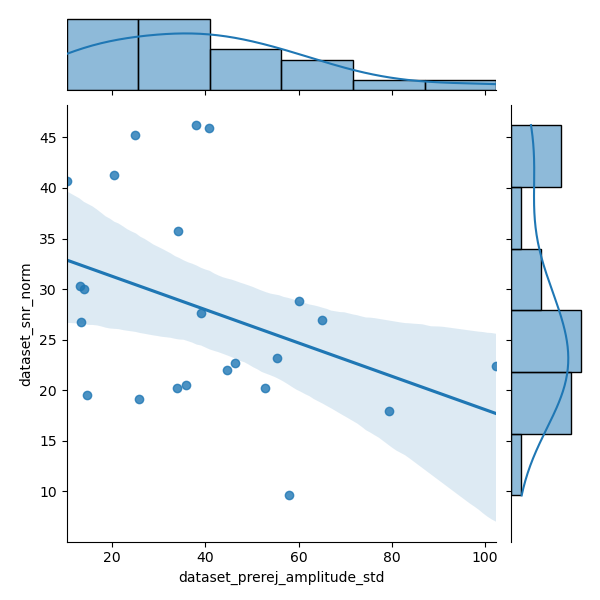

R = -0.38


<IPython.core.display.Javascript object>


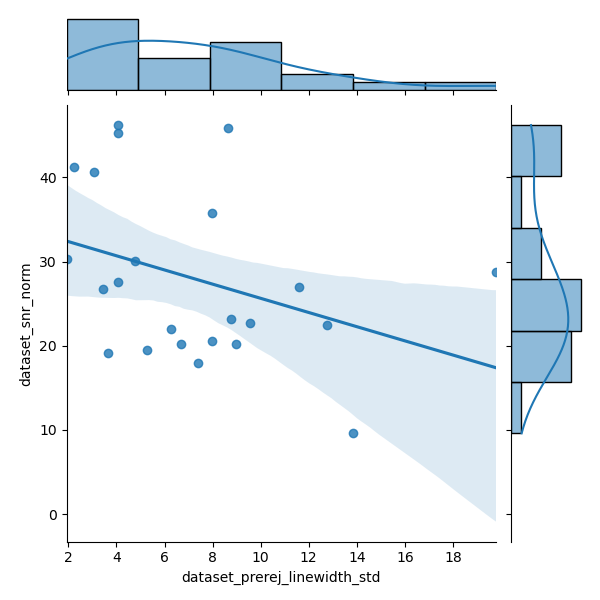

R = -0.36


<IPython.core.display.Javascript object>


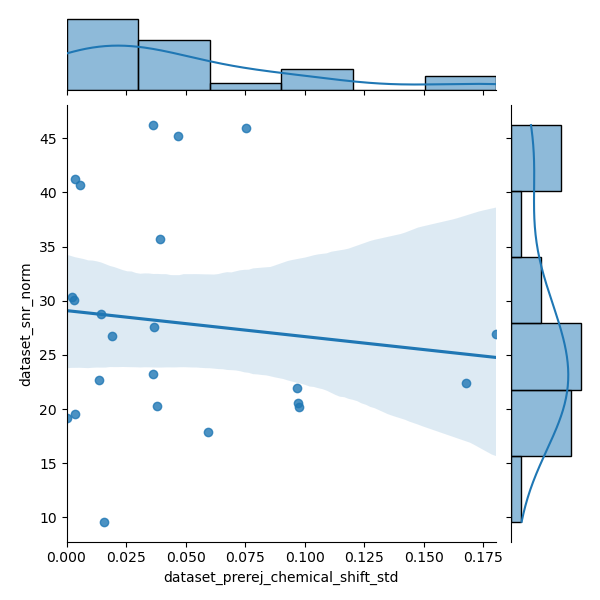

R = -0.12


<IPython.core.display.Javascript object>


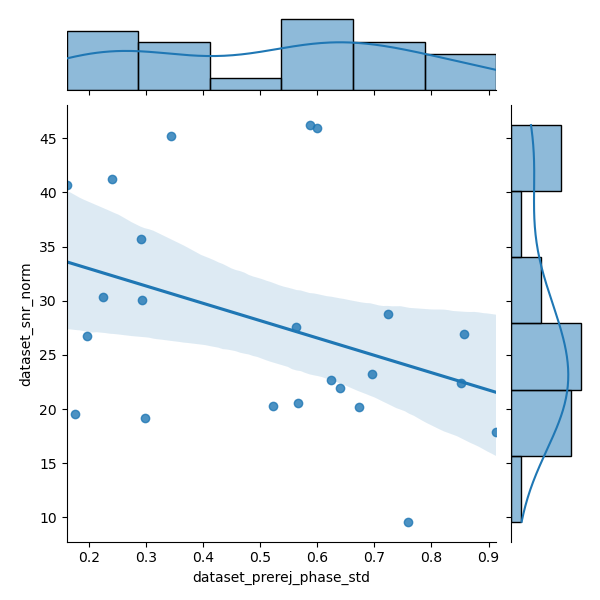

R = -0.38


In [17]:
df = df_sc

x = df["dataset_prerej_amplitude_std"].astype(np.float)
y = df["dataset_snr_norm"].astype(np.float)
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_linewidth_std"].astype(np.float)
y = df["dataset_snr_norm"].astype(np.float)
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_chemical_shift_std"].astype(np.float)
y = df["dataset_snr_norm"].astype(np.float)
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_phase_std"].astype(np.float)
y = df["dataset_snr_norm"].astype(np.float)
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Nice results but not very significant...
SNR increases if the acquired signal is stable in terms of amplitude, linewidth, chemical shift and phase

## Data rejection & signal stability

<IPython.core.display.Javascript object>


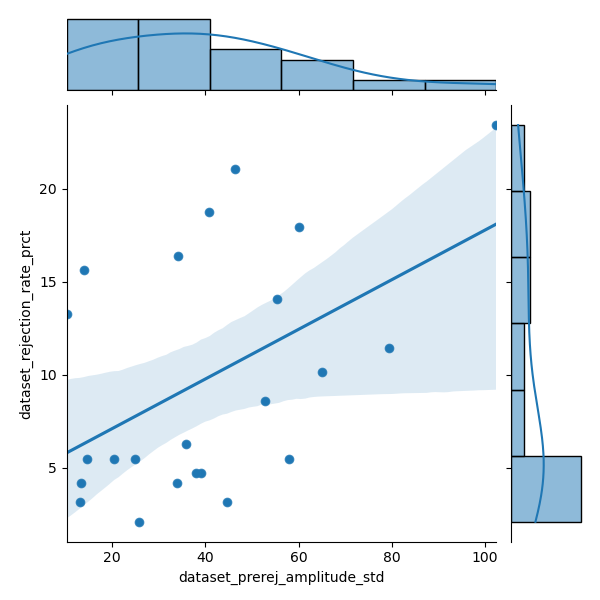

R = 0.48


<IPython.core.display.Javascript object>


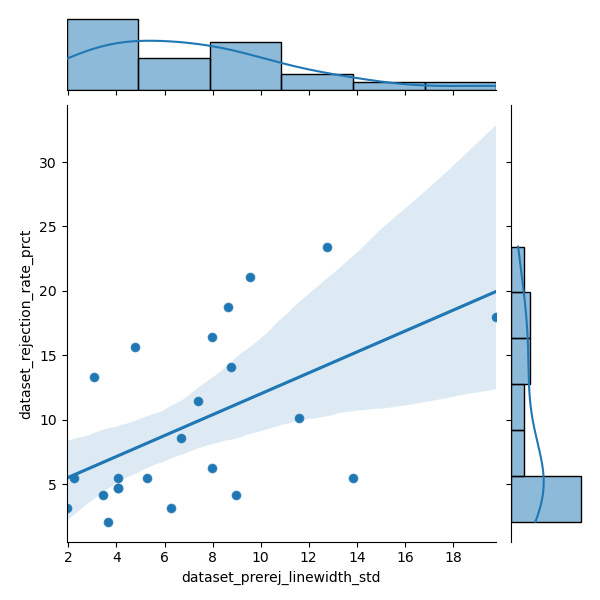

R = 0.54


<IPython.core.display.Javascript object>


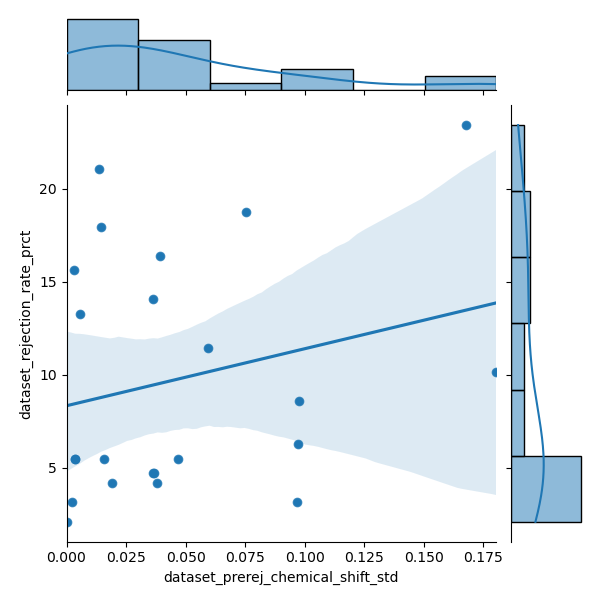

R = 0.24


<IPython.core.display.Javascript object>


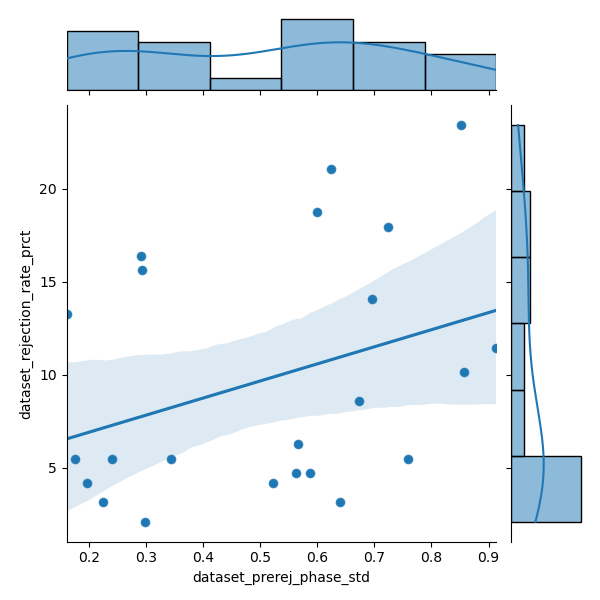

R = 0.34


In [18]:
df = df_sc

x = df["dataset_prerej_amplitude_std"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_linewidth_std"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_chemical_shift_std"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_prerej_phase_std"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Interesting but not super significant, as usual. The amount of data we rejected during reconstruction depends on the signal stability (amplitude, **linewidth**, chemical shift and phase).

## Data rejection rate & acquisition time

<IPython.core.display.Javascript object>


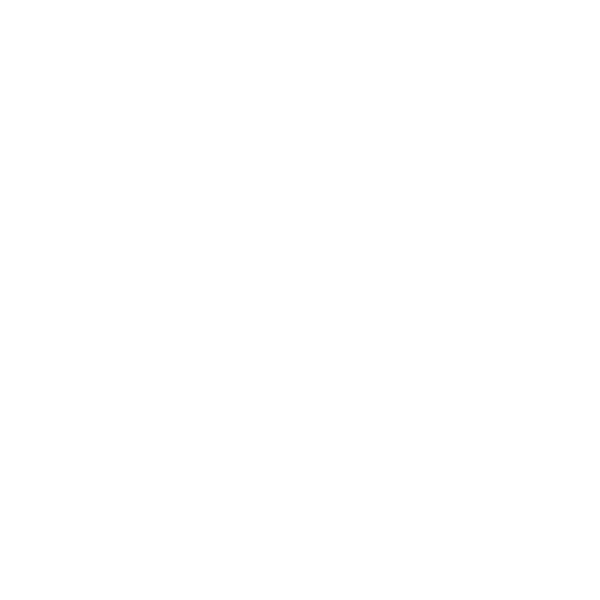

R = 0.15


<IPython.core.display.Javascript object>


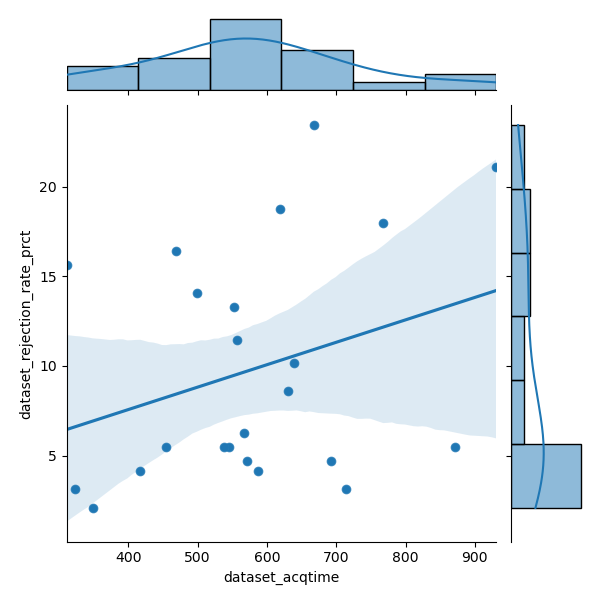

R = 0.30


In [19]:
df = df_sc

x = df["dataset_acqtime_eff"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_acqtime"]
y = df["dataset_rejection_rate_prct"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Interesting but not super significant, as usual. The amount of data we rejected during reconstruction depends on the acquisition time (the longer you scan, the higher the probability to have some motion).

## Signal stability & heart beat
What about physio motion like heart and respiration? It should be reflected in the signal instabilities...

<IPython.core.display.Javascript object>

R = -0.15


<IPython.core.display.Javascript object>


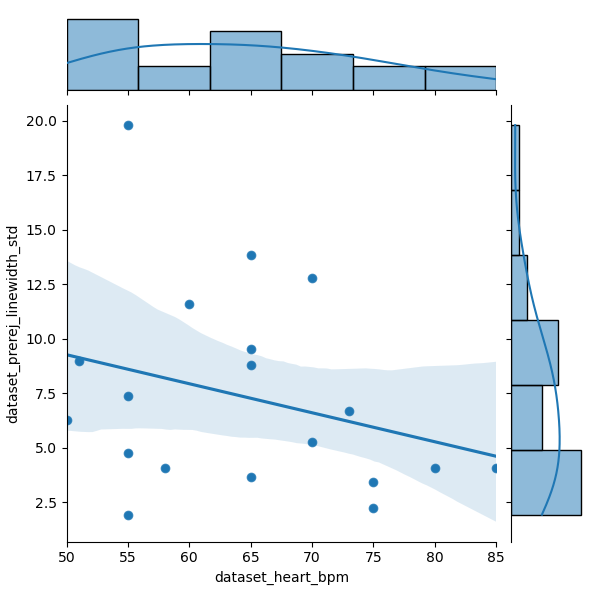

R = -0.29


<IPython.core.display.Javascript object>

R = -0.02


<IPython.core.display.Javascript object>


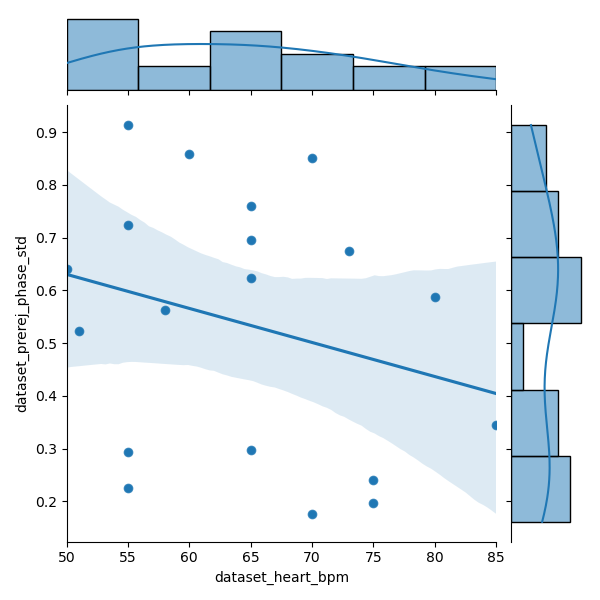

R = -0.27


In [20]:
df = df_sc

x = df["dataset_heart_bpm"].astype(np.float)
y = df["dataset_prerej_amplitude_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_heart_bpm"].astype(np.float)
y = df["dataset_prerej_linewidth_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_heart_bpm"].astype(np.float)
y = df["dataset_prerej_chemical_shift_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_heart_bpm"].astype(np.float)
y = df["dataset_prerej_phase_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Well, heart beat has apparently no influence on signal stability and therefore on our MRS data quality...

## Signal stability & respiration
Maybe respiration does explain the differences in signal stability between subjects?

<IPython.core.display.Javascript object>

R = -0.48


<IPython.core.display.Javascript object>


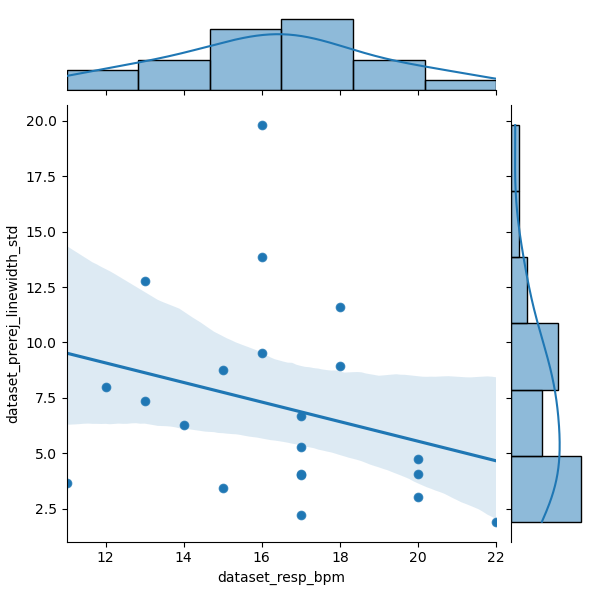

R = -0.28


<IPython.core.display.Javascript object>


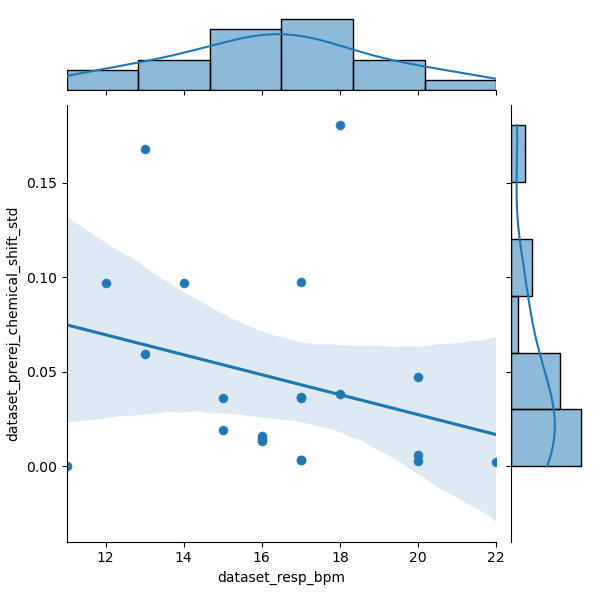

R = -0.28


<IPython.core.display.Javascript object>


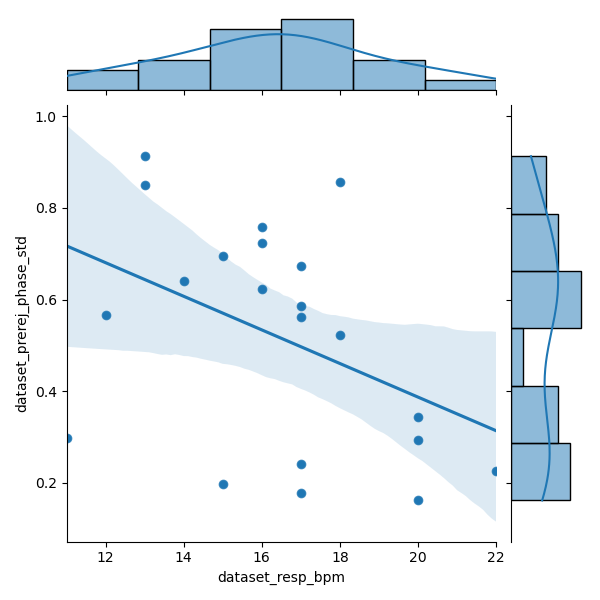

R = -0.42


In [21]:
df = df_sc

x = df["dataset_resp_bpm"].astype(np.float)
y = df["dataset_prerej_amplitude_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_resp_bpm"].astype(np.float)
y = df["dataset_prerej_linewidth_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_resp_bpm"].astype(np.float)
y = df["dataset_prerej_chemical_shift_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_resp_bpm"].astype(np.float)
y = df["dataset_prerej_phase_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Nope, does not make any sense.

## Signal stability & BMI/BFP
Maybe big people move less or more ? Just curious...

<IPython.core.display.Javascript object>

R = 0.09


<IPython.core.display.Javascript object>


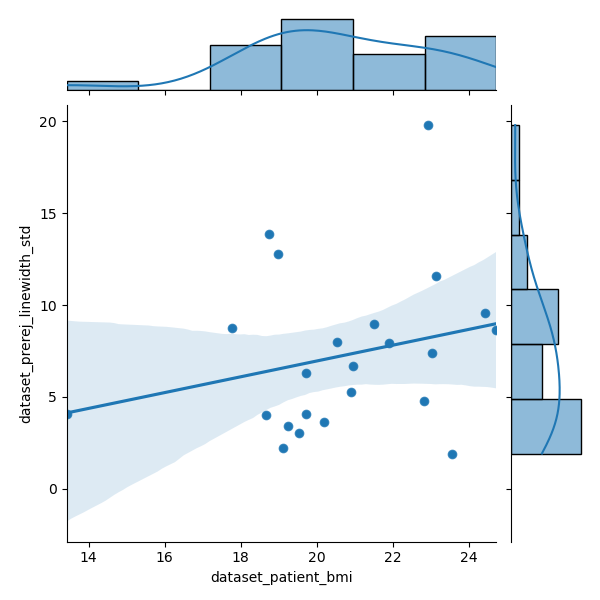

R = 0.25


<IPython.core.display.Javascript object>

R = 0.03


<IPython.core.display.Javascript object>


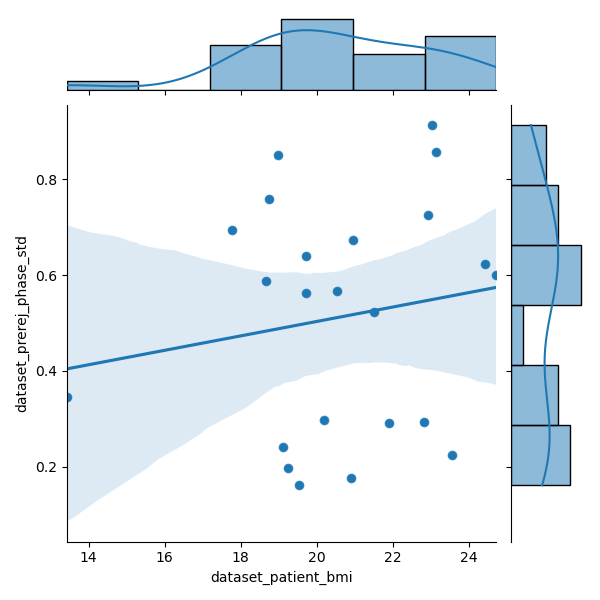

R = 0.16


In [22]:
df = df_sc

x = df["dataset_patient_bmi"].astype(np.float)
y = df["dataset_prerej_amplitude_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bmi"].astype(np.float)
y = df["dataset_prerej_linewidth_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bmi"].astype(np.float)
y = df["dataset_prerej_chemical_shift_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_patient_bmi"].astype(np.float)
y = df["dataset_prerej_phase_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Nothing interesting here...

# [PAPER] Best, ok and worst spectra
According to SNR and LW and me

<IPython.core.display.Javascript object>


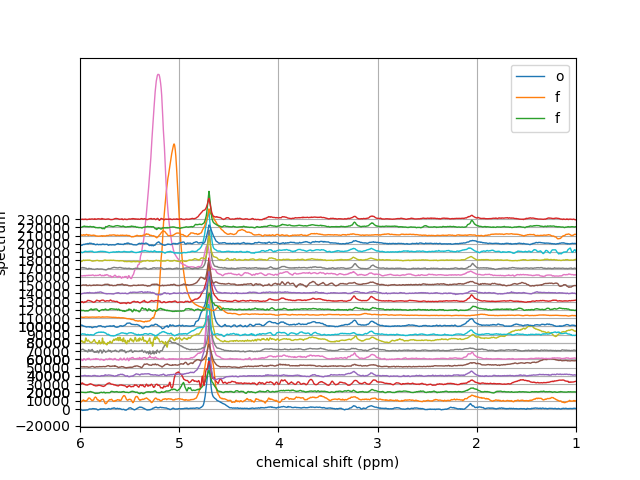

In [23]:
df = df_sc

k = 0
for this_index, this_row in df.iterrows():
    s = this_row["dataset_raw_data_obj"]
    if(s is None):
        s = this_row["dataset_dcm_data_obj"]
    
    s.set_display_offset(10000.0 * k)
    s.display_spectrum_1d(1000)
    k += 1

plt.legend('off')

# Minor questions and tests

## Does water LW from ref. data == WS data LW?

<IPython.core.display.Javascript object>


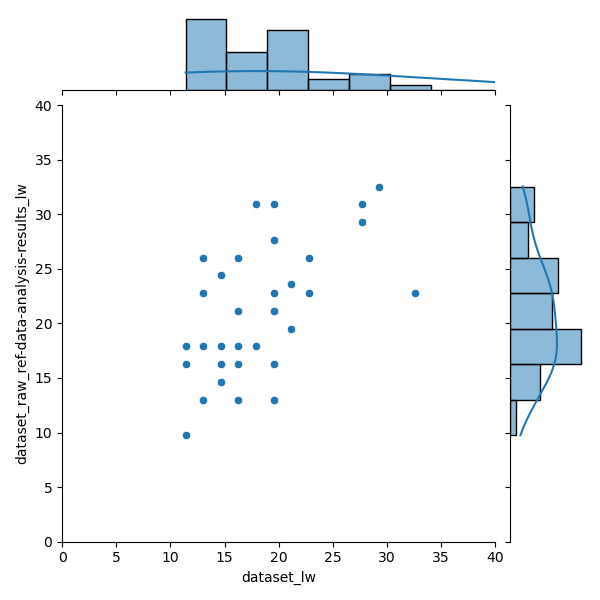

R = 0.12


In [24]:
df = df_sc_all_slaser

x = df["dataset_lw"]
y = df["dataset_raw_ref-data-analysis-results_lw"]
g = sns.JointGrid(x=x, y=y, xlim=(0, 40), ylim=(0, 40))
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

Yes, the LW measured on water is similar to the LW measured on NAA. This observation validates the approach of constraining the metabolite damping factors during the fit to the LW observed on water.

## Intensity of ref. water peak
Is it connected to MRS quality? Maybe reflects CSF contamination?

<IPython.core.display.Javascript object>

R = 0.08


<IPython.core.display.Javascript object>


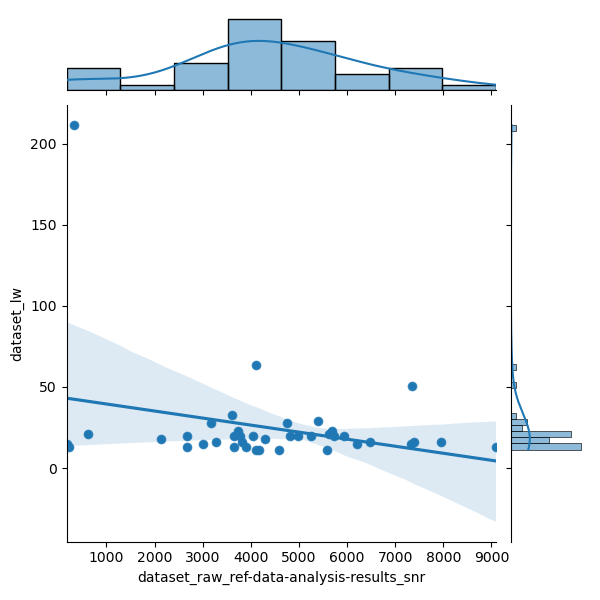

R = -0.28


In [25]:
df = df_sc_all_slaser

x = df["dataset_raw_ref-data-analysis-results_snr"]
y = df["dataset_snr_norm"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_raw_ref-data-analysis-results_snr"]
y = df["dataset_lw"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))


Nope, wrong intuition. The water intensity in the ref. data is not negative correlated to the SNR or LW. More the opposite actually...

## Artefact around 5 ppm
This artefact seems to increase when voxel size decreases in the $x$ dimension. The sLASER sequence is a *semi-*LASER sequence, meaning that not all spatial dimensions are selected using adiabatic RF pulses (like in LASER). The $x$ dimension is selected using a standard asymmetric RF sinc pulse while $y$ and $z$ are selected using HSn RF pulses.

But not only...

<IPython.core.display.Javascript object>


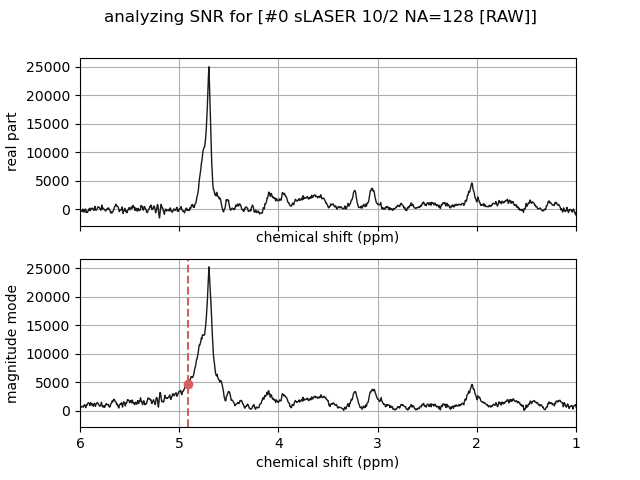

(INFO)  MRSData2.analyze_snr_1d: results for [#1 sLASER R:N=20:1 [RAW]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 6.20E+03, N = 1.75E+02, SNR = 35.38!
(INFO)  MRSData2.analyze_snr_1d: results for [#0 sLASER R:N=25:1 [RAW]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 7.36E+03, N = 1.90E+02, SNR = 38.85!
(INFO)  MRSData2.analyze_snr_1d: results for [#1 sLASER R:N=25:1 trig [RAW]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 7.21E+03, N = 1.89E+02, SNR = 38.17!
(INFO)  MRSData2.analyze_snr_1d: results for [#0 crappy [DCM]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 1.08E+04, N = 1.02E+02, SNR = 105.83!
(INFO)  MRSData2.analyze_snr_1d: results for [#0 sLASER 20:1 cardiac trig [RAW]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 6.05E+03, N = 3.31E+02, SNR = 18.28!
(INFO)  MRSData2.analyze_snr_1d: results for [#1 sLASER 20:1 resp trig [RAW]] coming...
(INFO)  MRSData2.analyze_snr_1d: S = 9.57E+03, N = 3.22E+02, SNR = 29.72!
(INFO)  MRSData2.analyze_snr_1d: results for [#2 sLA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


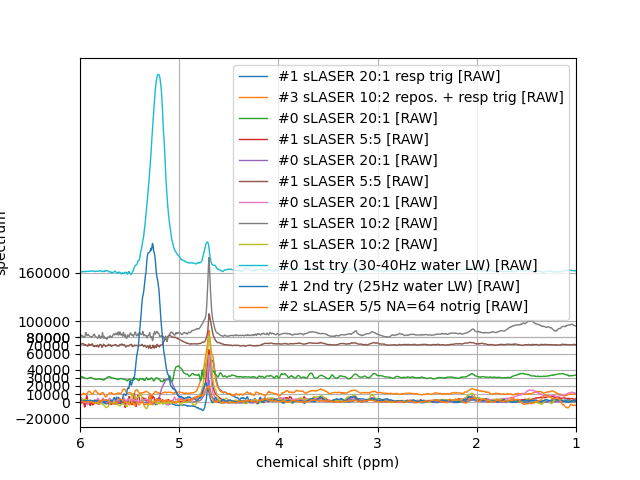

<IPython.core.display.Javascript object>


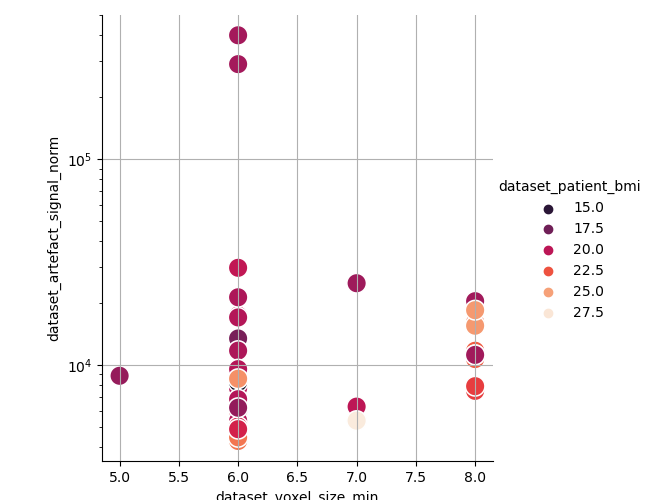

<IPython.core.display.Javascript object>


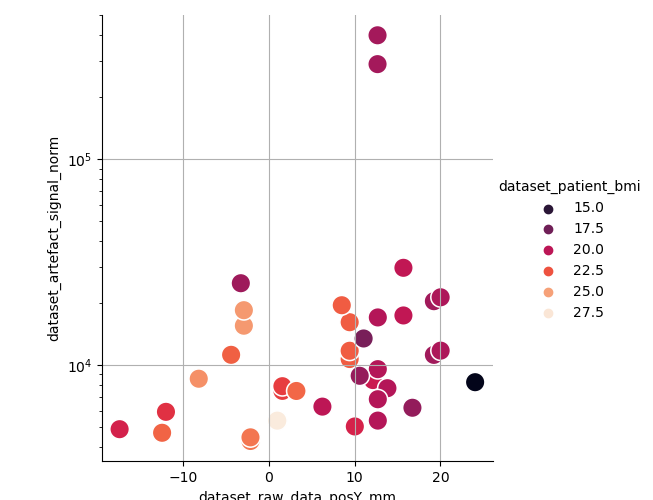

<IPython.core.display.Javascript object>

R = 0.40 for shim [X]


<IPython.core.display.Javascript object>


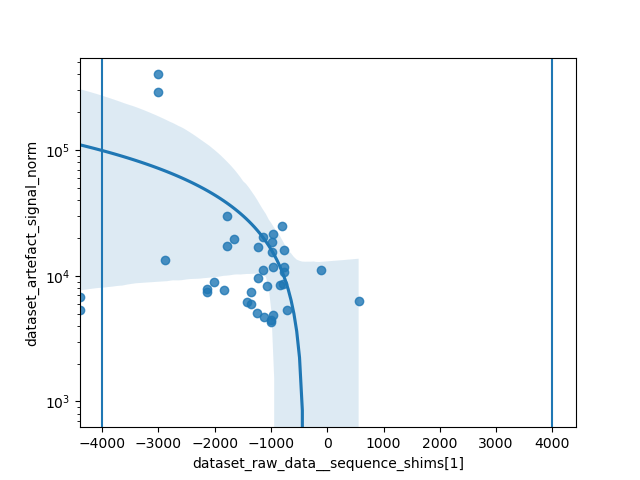

R = -0.36 for shim [Y]


<IPython.core.display.Javascript object>

R = 0.18 for shim [Z]


<IPython.core.display.Javascript object>

R = 0.46 for shim [Z2]


<IPython.core.display.Javascript object>


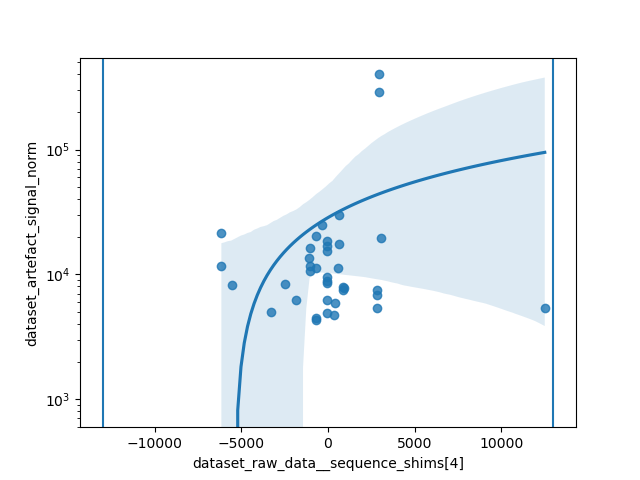

R = 0.21 for shim [ZX]


<IPython.core.display.Javascript object>


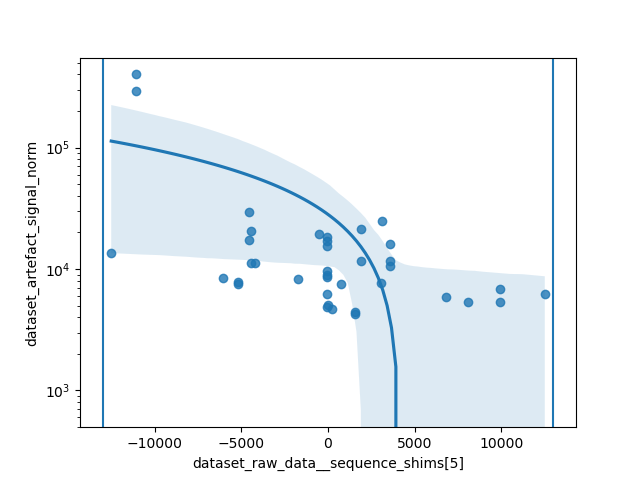

R = -0.49 for shim [ZY]


<IPython.core.display.Javascript object>


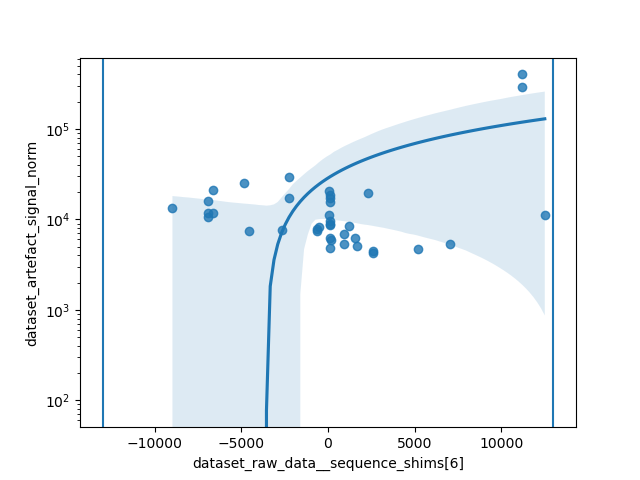

R = 0.51 for shim [Z2-Y2]


<IPython.core.display.Javascript object>

R = 0.33 for shim [XY]


<IPython.core.display.Javascript object>


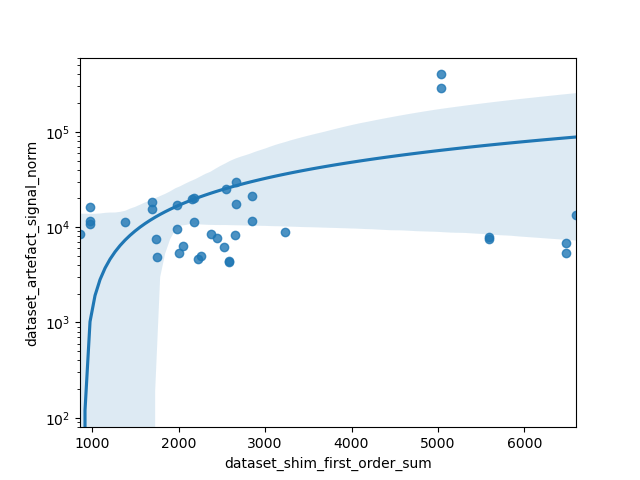

R = 0.32


<IPython.core.display.Javascript object>


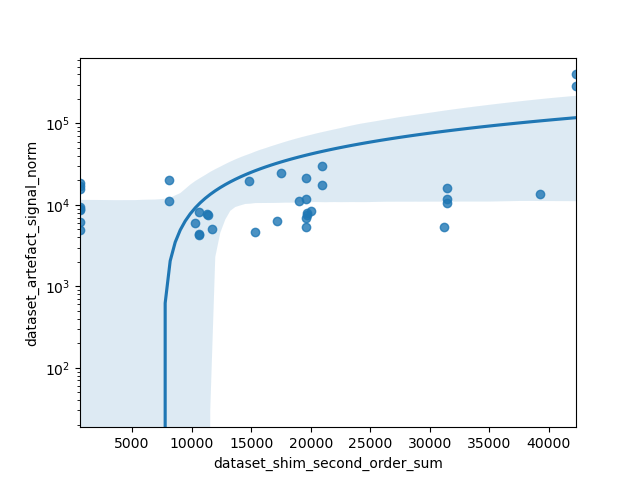

R = 0.52


<IPython.core.display.Javascript object>


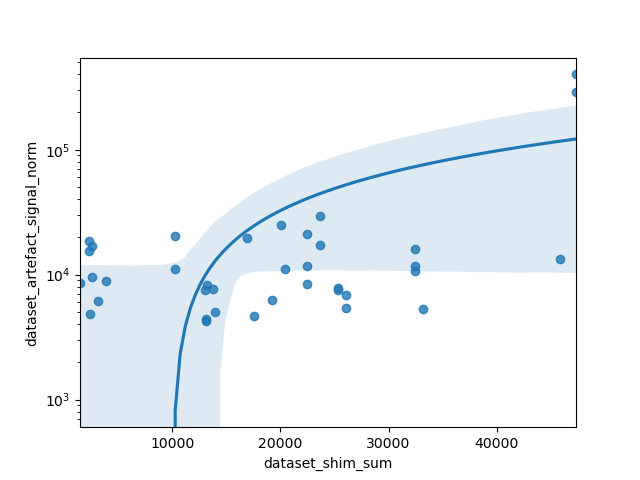

R = 0.53


In [26]:
df = df_sc_all_slaser

# voxel dimensions in X, Y and Z:
df["dataset_voxel_size_X"] = [o.voxel_size[0] for o in df["dataset_raw_data_obj"]]
df["dataset_voxel_size_Y"] = [o.voxel_size[1] for o in df["dataset_raw_data_obj"]]
df["dataset_voxel_size_Z"] = [o.voxel_size[2] for o in df["dataset_raw_data_obj"]]
df["dataset_voxel_size_min"] = [np.min(o.voxel_size) for o in df["dataset_raw_data_obj"]]

# estimate artefact intensity for each dataset
df["dataset_artefact_signal"] = np.array([o.analyze_snr_1d([4.9, 5.5], [-2, -1], True, True) for o in df["dataset_raw_data_obj"]])[:, 1]

# normalization of artefact SNR
df["dataset_artefact_signal_norm"] = df["dataset_artefact_signal"]
# VOI normalization
df["dataset_artefact_signal_norm"] = df["dataset_artefact_signal_norm"] / df["dataset_voxel_vol_cm3"] * mean_voxel_vol
# NA normalization
df["dataset_artefact_signal_norm"] = df["dataset_artefact_signal_norm"] / np.sqrt(df["dataset_raw_data__data_rejection[0]_Post-rejection_na"]) * np.sqrt(na_norm)

# find big artefact datasets
plt.figure(120)
artefact_df = df.loc[df["dataset_artefact_signal_norm"] > 15000.0]
for s in artefact_df["dataset_raw_data_obj"]:
    s.display_spectrum_1d(1200)

x = df["dataset_voxel_size_min"]
y = df["dataset_artefact_signal_norm"]
z = df["dataset_patient_bmi"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=200)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)
g.ax.set_yscale('log')

x = df["dataset_raw_data_posY_mm"]
y = df["dataset_artefact_signal_norm"]
z = df["dataset_patient_bmi"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=200)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)
g.ax.set_yscale('log')

# maybe related to shimming?
first_order_shim_ranges = [-4000, 4000]
second_order_shim_ranges = [-13000, 13000]
shim_labels = ['X', 'Y', 'Z', 'Z2', 'ZX', 'ZY', 'Z2-Y2', 'XY']
shim_ranges = [first_order_shim_ranges, first_order_shim_ranges, first_order_shim_ranges, 
               second_order_shim_ranges, 
               second_order_shim_ranges, 
               second_order_shim_ranges, 
               second_order_shim_ranges, 
               second_order_shim_ranges]

df["dataset_shim_sum"] = 0
artefact_df["dataset_shim_sum"] = 0

df["dataset_shim_first_order_sum"] = 0
artefact_df["dataset_shim_first_order_sum"] = 0

df["dataset_shim_second_order_sum"] = 0
artefact_df["dataset_shim_second_order_sum"] = 0

for this_shim_index, this_shim_name, this_shim_range in zip(range(8), shim_labels, shim_ranges):
    df_key = "dataset_raw_data__sequence_shims[" + str(this_shim_index) + "]"
    x = df[df_key]
    y = df["dataset_artefact_signal_norm"]
    plt.figure()
    g = sns.regplot(x=x, y=y)
    plt.axvline(this_shim_range[0])
    plt.axvline(this_shim_range[1])
    g.set_yscale('log')
    print("R = %.2f for shim [%s]" % (x.corr(y), this_shim_name))
    
    # add up all shims
    if(this_shim_index < 3):
        df["dataset_shim_first_order_sum"] += df[df_key].abs()
        artefact_df["dataset_shim_first_order_sum"] += df[df_key].abs()
    else:
        df["dataset_shim_second_order_sum"] += df[df_key].abs()
        artefact_df["dataset_shim_second_order_sum"] += df[df_key].abs()
          
    df["dataset_shim_sum"] += df[df_key].abs()
    artefact_df["dataset_shim_sum"] += artefact_df[df_key].abs()

# high shim voltage in general?
x = df["dataset_shim_first_order_sum"]
y = df["dataset_artefact_signal_norm"]
plt.figure()
g = sns.regplot(x=x, y=y)
g.set_yscale('log')
print("R = %.2f" % x.corr(y))         
          
x = df["dataset_shim_second_order_sum"]
y = df["dataset_artefact_signal_norm"]
plt.figure()
g = sns.regplot(x=x, y=y)
g.set_yscale('log')
print("R = %.2f" % x.corr(y))
          
x = df["dataset_shim_sum"]
y = df["dataset_artefact_signal_norm"]
plt.figure()
g = sns.regplot(x=x, y=y)
g.set_yscale('log')
print("R = %.2f" % x.corr(y)) 


I believe this artefact originates from badly localized signal in the $x$ dimension because of the poor efficiency of the half sinc selection pulse in inhomogenous $B_1$ situation (surface coil):
* This effect is increased when this bad pulse needs to select a small slice.
* Less clear but likely to happen, this effect is also increased when the VOI is far from the coil ($y$ position is high) and the $B_1$ inhomogeneity gets even more crazy.
* This problem could be connected to $B_0$ field homogeneity too! The worst cases were observed for maximum shim voltages... especially for 2nd order shim. Basically meaning that the shim adjustment failed and the operator (me) did not check, resulting in potential huge and shim-generated $B_0$ field inhomogeneity...

Related to $B_0$ and $B_1$ fields heterogeneity in general!

## Moving average window size
This reconstruction parameter had to be set manually a few times to avoid data corruption during frequency realignment and data rejection: 2, 4, 5... What does it depend on?

<IPython.core.display.Javascript object>

R = -0.05


<IPython.core.display.Javascript object>

R = -0.20


<IPython.core.display.Javascript object>


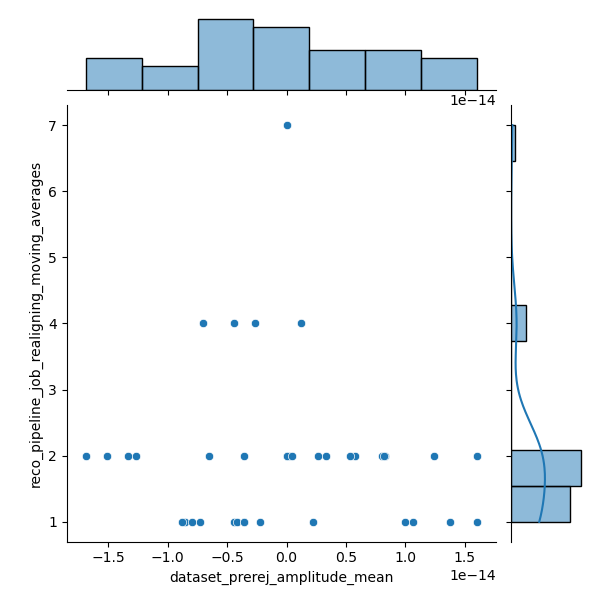

R = -0.07


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


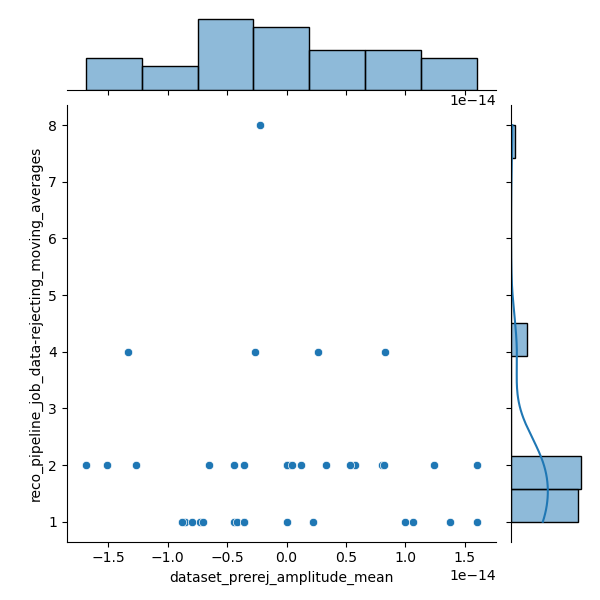

R = -0.05


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


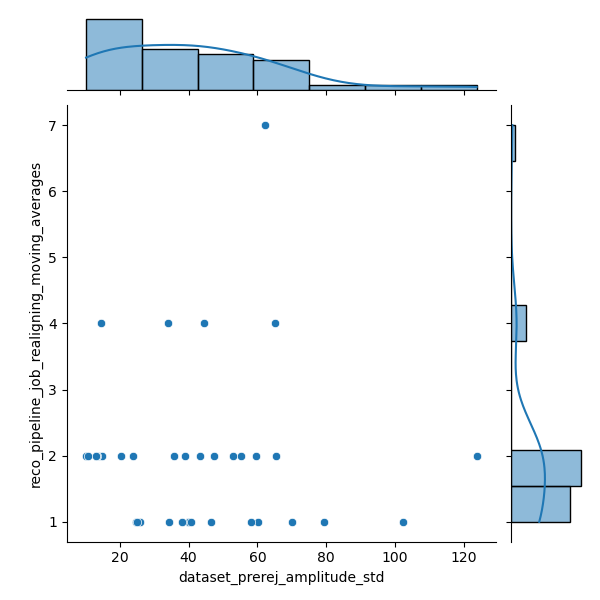

R = -0.01


<IPython.core.display.Javascript object>

R = 0.11


<IPython.core.display.Javascript object>

R = -0.00


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

R = 0.05


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

R = 0.32


<IPython.core.display.Javascript object>


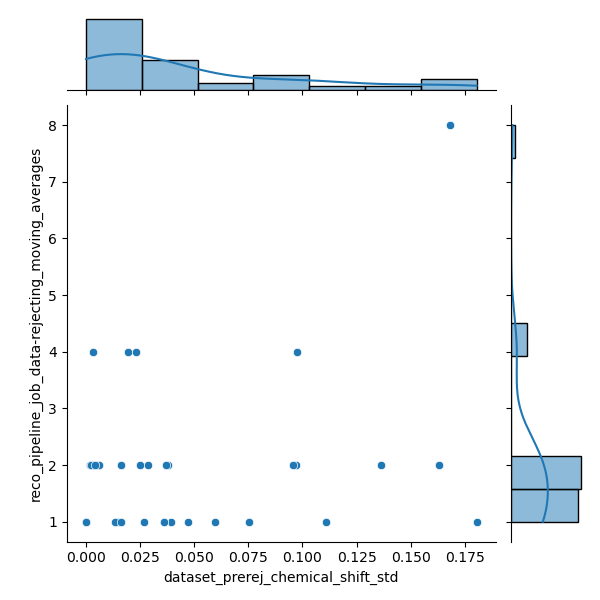

R = 0.26


<IPython.core.display.Javascript object>


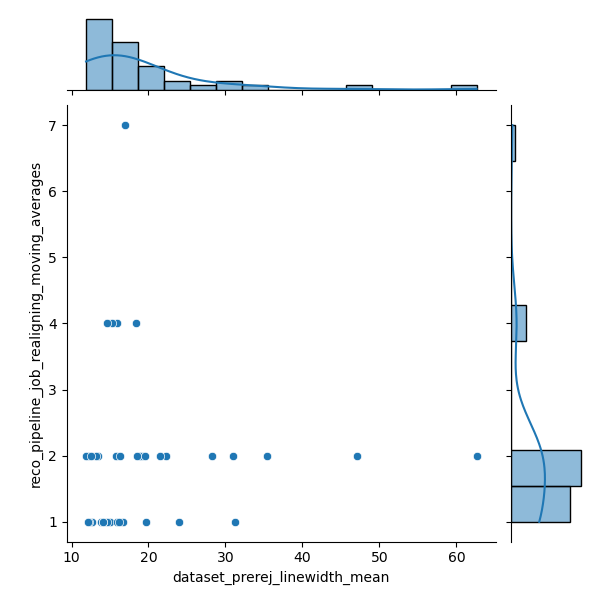

R = 0.00


<IPython.core.display.Javascript object>


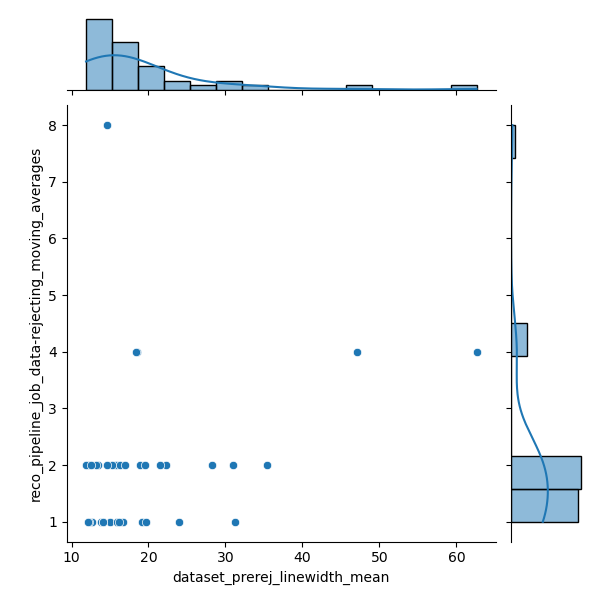

R = 0.29


<IPython.core.display.Javascript object>

R = -0.02


<IPython.core.display.Javascript object>

R = -0.00


<IPython.core.display.Javascript object>


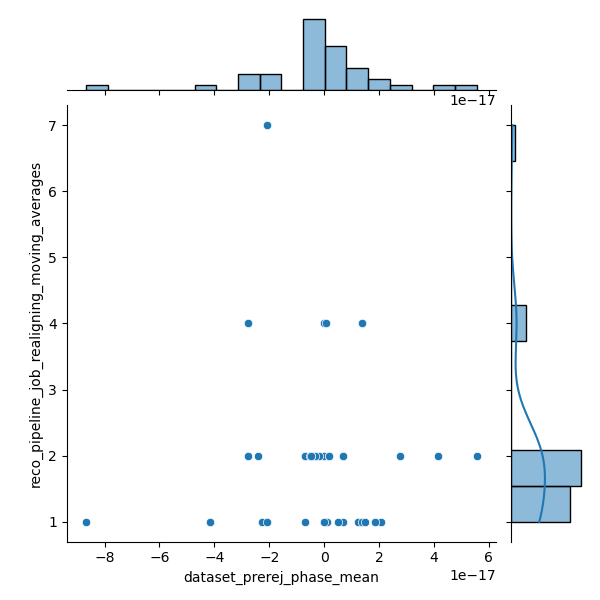

R = -0.04


/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


R = -0.11


<IPython.core.display.Javascript object>


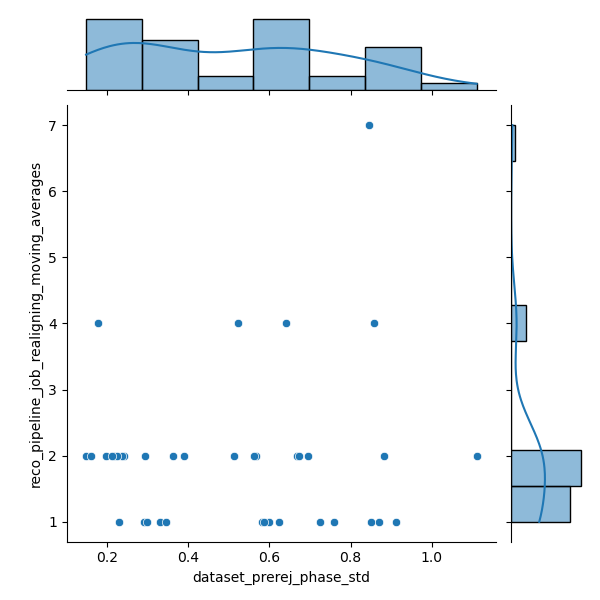

R = 0.09


<IPython.core.display.Javascript object>


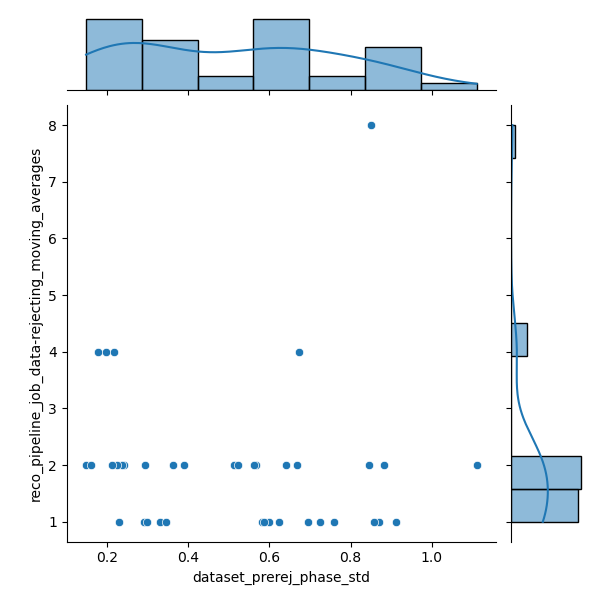

R = -0.04


In [27]:
df = df_sc_all_slaser

# extract SNR before realignment

try_this_list = ["dataset_raw_analysis-results_zero-filling_snr",
                 "dataset_prerej_amplitude_mean",
                 "dataset_prerej_amplitude_std",
                "dataset_prerej_chemical_shift_mean",
                "dataset_prerej_chemical_shift_std",
                 "dataset_prerej_linewidth_mean",
                 "dataset_prerej_linewidth_std",
                "dataset_prerej_phase_mean",
                "dataset_prerej_phase_std",]

for ttl in try_this_list:
    x = df[ttl]
    y = df["reco_pipeline_job_realigning_moving_averages"]
    g = sns.JointGrid(x=x, y=y)
    g.plot_joint(sns.scatterplot)
    g.plot_marginals(sns.histplot, kde=True)
    print("R = %.2f" % x.corr(y))

    x = df[ttl]
    y = df["reco_pipeline_job_data-rejecting_moving_averages"]
    g = sns.JointGrid(x=x, y=y)
    g.plot_joint(sns.scatterplot)
    g.plot_marginals(sns.histplot, kde=True)
    print("R = %.2f" % x.corr(y))

* Seems that some datasets with low SNR needed moving averaging for the frequency realignment and the data rejection to work. Could we maybe find a SNR threshold or a simple relation between SNR and moving average window size so that it is set automatically? **Well NO, wrong hypothesis** :P
* What else? variation of peak properties ? They are actually estimated using the moving average window... 

Could not conclude anything... I still do not know how to adjust the averaging moving window size automatically :(

## SNR & NA
Curious to see if the usual SNR and $/sqrt(NA)$ dependence is observable

In [28]:
df = df_sc_all_slaser

x = df["dataset_raw_data__sequence_na"].astype(np.float)
y = df["dataset_snr_final"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)


<IPython.core.display.Javascript object>

## sLASER protocols
Compare protocols 20/1, 10/2, 5/5 when possible in terms of SNR/LW

In [29]:
df = df_sc_all_slaser

# get the scans hash manually
df_slaser_tests = df.loc[(df["patient_study_id"] == "314_1")
                        | (df["patient_study_id"] == "316_1")
                        | (df["patient_study_id"] == "319_1")
                        | (df["patient_study_id"] == "329_1")
                        | (df["patient_study_id"] == "336_2")]

df_slaser_tests = df_slaser_tests.drop("967a1b8dace220e916df680759f31d84")

df_slaser_tests

patient  study               dataset_legend  \
scan_hash                                                                       
0a58f85af8c32d06cbbca74391447ad2      314      1               #0 sLASER 20:1   
2195967ae34d5ef7dcfba4fc93a9e121      314      1                #1 sLASER 5:5   
fe34c6902afd341a0c81de0a0b6d6373      316      1               #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778      316      1                #1 sLASER 5:5   
3c700829d5feb605285c5ef7cfad4055      319      1               #0 sLASER 20:1   
f416f6db6cda52195e3b8046fc586ef2      319      1               #1 sLASER 10:2   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb      329      1               #0 sLASER 20:1   
2a9fe3c48c69e575db0a8eeeb202d44d      329      1               #1 sLASER 10:2   
355445d1bac5ee682c88f889b4c01d09      336      2  #0 sLASER 10/2 NA=64 notrig   
49872ea4c73b9206c804c4fdaa298ed9      336      2  #1 sLASER 20/1 NA=64 notrig   
fd2940e9489a5d28773792aeb95f54e7      336      2   #2 sLASER 5/5 NA=64 notrig   

                                                               dataset_raw_files[0]  \
scan_hash                                                                             
0a58f85af8c32d06cbbca74391447ad2  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
2195967ae34d5ef7dcfba4fc93a9e121  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
fe34c6902afd341a0c81de0a0b6d6373  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
5f9a42662bfe3586bee57f3ead964778  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
3c700829d5feb605285c5ef7cfad4055  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
f416f6db6cda52195e3b8046fc586ef2  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb  /home/tangir/crmbm/acq_twix/329-pi-p1-moelle/m...   
2a9fe3c48c69e575db0a8eeeb202d44d  /home/tangir/crmbm/acq_twix/329-pi-p1-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
fd2940e9489a5d28773792aeb95f54e7  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_files[1]  \
scan_hash                                                                             
0a58f85af8c32d06cbbca74391447ad2  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
2195967ae34d5ef7dcfba4fc93a9e121  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
fe34c6902afd341a0c81de0a0b6d6373  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
5f9a42662bfe3586bee57f3ead964778  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
3c700829d5feb605285c5ef7cfad4055  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
f416f6db6cda52195e3b8046fc586ef2  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb  /home/tangir/crmbm/acq_twix/329-pi-p1-moelle/m...   
2a9fe3c48c69e575db0a8eeeb202d44d  /home/tangir/crmbm/acq_twix/329-pi-p1-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
fd2940e9489a5d28773792aeb95f54e7  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_data_obj  \
scan_hash                                                                             
0a58f85af8c32d06cbbca74391447ad2  [(730.3440293819107-125.91066233625389j), (712...   
2195967ae34d5ef7dcfba4fc93a9e121  [(1008.4807903081726-17.76038805871182j), (881...   
fe34c6902afd341a0c81de0a0b6d6373  [(526.3710825321402-109.50225527879674j), (518...   
5f9a42662bfe3586bee57f3ead964778  [(535.8489858681635+21.802746814175052j), (534...   
3c700829d5feb605285c5ef7cfad4055  [(1208.0387209839266-395.25782076094237j), (12...   
f416f6db6cda52195e3b8046fc586ef2  [(1760.5827174966569-749.9357520232237j), (188...   
fc8cb0e8f7b3747a10ee

In [30]:
df_slaser_results = pd.DataFrame(columns=["patient_study_id",
                 "r20_snr",
                 "r20_lw",
                 "r20_te",
                 "r10_snr",
                 "r10_lw",
                 "r10_te",
                 "r5_snr",
                 "r5_lw",
                 "r5_te"])

df_slaser_results = df_slaser_results.set_index("patient_study_id")

# initialize
for this_index, this_row in df_slaser_tests.iterrows():
    this_patient_study_id = this_row["patient_study_id"]
    df_slaser_results.loc[this_patient_study_id] = [np.nan] * 9

# complete
for this_index, this_row in df_slaser_tests.iterrows():
    this_patient_study_id = this_row["patient_study_id"]
    this_r = this_row["dataset_raw_data__sequence_pulse_rfc_r"]
    if(this_r >= 20):
        df_slaser_results.loc[this_patient_study_id]["r20_snr"] = this_row["dataset_snr_norm"]
        df_slaser_results.loc[this_patient_study_id]["r20_lw"] = this_row["dataset_lw"]
        df_slaser_results.loc[this_patient_study_id]["r20_te"] = this_row["dataset_raw_data__sequence_te"]

    elif(this_r == 10):
        df_slaser_results.loc[this_patient_study_id]["r10_snr"] = this_row["dataset_snr_norm"]
        df_slaser_results.loc[this_patient_study_id]["r10_lw"] = this_row["dataset_lw"]
        df_slaser_results.loc[this_patient_study_id]["r10_te"] = this_row["dataset_raw_data__sequence_te"]

    elif(this_r == 5):
        df_slaser_results.loc[this_patient_study_id]["r5_snr"] = this_row["dataset_snr_norm"]
        df_slaser_results.loc[this_patient_study_id]["r5_lw"] = this_row["dataset_lw"]
        df_slaser_results.loc[this_patient_study_id]["r5_te"] = this_row["dataset_raw_data__sequence_te"]

df_slaser_results

r20_snr   r20_lw r20_te  r10_snr   r10_lw r10_te   r5_snr  \
patient_study_id                                                              
314_1             41.2369   16.276  41.68      NaN      NaN    NaN  38.7641   
316_1             14.2352  17.9036  45.96      NaN      NaN    NaN  19.1433   
319_1             27.8628  11.3932  62.96  45.9123  13.0208  38.96      NaN   
329_1             40.6484  19.5312  45.96  52.6085  21.1589  29.96      NaN   
336_2             24.1629  11.3932  52.36   18.048  19.5312  32.28  25.8735   

                    r5_lw  r5_te  
patient_study_id                  
314_1              16.276  19.96  
316_1             13.0208  21.16  
319_1                 NaN    NaN  
329_1                 NaN    NaN  
336_2             19.5312  22.68

<IPython.core.display.Javascript object>


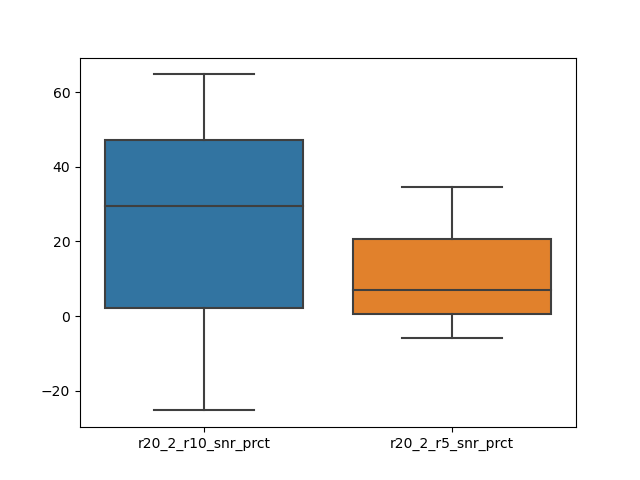

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

In [31]:
# replace 0 by nan
df_slaser_results = df_slaser_results.replace(0, np.nan)

# estimate relative changes of all this
df_slaser_results["r20_2_r10_snr_prct"] = (df_slaser_results["r10_snr"] - df_slaser_results["r20_snr"]) / df_slaser_results["r20_snr"] * 100
df_slaser_results["r20_2_r10_lw"] = df_slaser_results["r10_lw"] - df_slaser_results["r20_lw"]
df_slaser_results["r20_2_r10_te"] = df_slaser_results["r10_te"] - df_slaser_results["r20_te"]
#
df_slaser_results["r20_2_r5_snr_prct"] = (df_slaser_results["r5_snr"] - df_slaser_results["r20_snr"]) / df_slaser_results["r20_snr"] * 100
df_slaser_results["r20_2_r5_lw"] = df_slaser_results["r5_lw"] - df_slaser_results["r20_lw"]
df_slaser_results["r20_2_r5_te"] = df_slaser_results["r5_te"] - df_slaser_results["r20_te"]

# display
plt.figure()
y=df_slaser_results[["r20_2_r10_snr_prct", "r20_2_r5_snr_prct"]]
sns.boxplot(data=y)

plt.figure()
y=df_slaser_results[["r20_2_r10_lw", "r20_2_r5_lw"]]
sns.boxplot(data=y)

plt.figure()
y=df_slaser_results[["r20_2_r10_te", "r20_2_r5_te"]]
sns.boxplot(data=y)


Interesting... I see that the R=20/1 is maybe not the best protocol to use... 
* The SNR is increased when switching to R=10/2, the LW looks unchanged
* The SNR is not really increased when switching to R=5 (starting to suffer from bad selectivity ?)
* The TE is reduced in both cases quite a lot >20ms

Seems I should have used 10/2 as the standard protocol. In theory less adiabatic but gives a shorter TE and higher SNR (probably connected but not sure when looking at the 5/5 results).

However, I need to find or remember why I used the 20/1 most of the time to justify in the paper. First let's see the proportion of this and that protocol in the P1/P2 data. In theory, the 10/2 scans should remain because the highest SNR scan per study was kept.

In [32]:
df = df_sc

df_20 = df.loc[df["dataset_raw_data__sequence_pulse_rfc_r"] >= 20]
df_10 = df.loc[df["dataset_raw_data__sequence_pulse_rfc_r"] == 10]
df_5 = df.loc[df["dataset_raw_data__sequence_pulse_rfc_r"] == 5]

print("* P1 and P2 scans represent %d datasets" % len(df))
print("* sLASER R>=20 was used %d times (%.2f%%)" % (len(df_20), len(df_20)/len(df) * 100))
print("* sLASER R==10 was used %d times (%.2f%%)" % (len(df_10), len(df_10)/len(df) * 100))
print("* sLASER R==5 was used %d times (%.2f%%)" % (len(df_5), len(df_5)/len(df) * 100))

df

* P1 and P2 scans represent 24 datasets
* sLASER R>=20 was used 18 times (75.00%)
* sLASER R==10 was used 5 times (20.83%)
* sLASER R==5 was used 1 times (4.17%)


patient study  \
2fff316122fc89a0b4d1f918f6cd62d8     300     1   
1baf6b702f39fefb5ad9e44179057ef7     307     1   
a2b582b37a04bd4efc43138368bc0b96     308     1   
01a46c3d8ebdb2912567745a61ef0d24     310     1   
7cb024e470b0b2b072436635a19a1c00     311     1   
9f8067ea065153da5b3a352d58f6ca23     313     1   
0a58f85af8c32d06cbbca74391447ad2     314     1   
5f9a42662bfe3586bee57f3ead964778     316     1   
f416f6db6cda52195e3b8046fc586ef2     319     1   
b9875913db5c0f321922f819401cc02e     328     1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb     329     1   
3695a02a4fbf0153215cf09eaa21658e     333     1   
2e9c959e58727727c1576108fb6ef2b9     336     1   
afb10548c794ebbf8bd304be1f52b0c1     338     1   
ef31f01b58b8279ef0df239b6d15a055     300     2   
62f4072c25c940cd1bfcb41a560749e2     349     1   
42063831757801c81193689ead085d37     304     1   
75ae13bc44bf3d55f5be46d4c59df84d     311     2   
967a1b8dace220e916df680759f31d84     336     2   
90d883145e25fe54b74b05c16b56ace1     319     2   
e8481853cde6f05d66b1c43d8dd00e40     313     2   
da13ac26d45806eaced75e7dd71df1f3     333     2   
e2c8b162388ff1d24dca288885b87e4b     314     2   
45b70edaa2460689b120a7ed10a1f6e1     349     2   

                                                     dataset_legend  \
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
a2b582b37a04bd4efc43138368bc0b96           #0 sLASER 20:1 resp trig   
01a46c3d8ebdb2912567745a61ef0d24                     #0 sLASER 20:1   
7cb024e470b0b2b072436635a19a1c00                     #0 sLASER 20:1   
9f8067ea065153da5b3a352d58f6ca23                     #0 sLASER 20:1   
0a58f85af8c32d06cbbca74391447ad2                     #0 sLASER 20:1   
5f9a42662bfe3586bee57f3ead964778                      #1 sLASER 5:5   
f416f6db6cda52195e3b8046fc586ef2                     #1 sLASER 10:2   
b9875913db5c0f321922f819401cc02e                     #0 sLASER 20:1   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb                     #0 sLASER 20:1   
3695a02a4fbf0153215cf09eaa21658e                     #0 sLASER 20:1   
2e9c959e58727727c1576108fb6ef2b9                     #0 sLASER 20:1   
afb10548c794ebbf8bd304be1f52b0c1                  #0 sLASER 20:1 WS   
ef31f01b58b8279ef0df239b6d15a055      #0 sLASER 20:1 (REF with OVS)   
62f4072c25c940cd1bfcb41a560749e2      #0 sLASER 10:2 (REF with OVS)   
42063831757801c81193689ead085d37      #0 1st try (30-40Hz water LW)   
75ae13bc44bf3d55f5be46d4c59df84d         #0 sLASER 20/1 NA=128 trig   
967a1b8dace220e916df680759f31d84         #0 sLASER 20/1 NA=128 trig   
90d883145e25fe54b74b05c16b56ace1          #0 sLASER 10/2 NA=64 trig   
e8481853cde6f05d66b1c43d8dd00e40                     #0 sLASER 20/1   
da13ac26d45806eaced75e7dd71df1f3                     #0 sLASER 20/1   
e2c8b162388ff1d24dca288885b87e4b              #0 sLASER 20/1 NA=128   
45b70edaa2460689b120a7ed10a1f6e1              #0 sLASER 10/2 NA=128   

                                                               dataset_raw_files[0]  \
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
1baf6b702f39fefb5ad9e44179057ef7  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
a2b582b37a04bd4efc43138368bc0b96  /home/tangir/crmbm/acq_twix/308-rs-p1-moelle/m...   
01a46c3d8ebdb2912567745a61ef0d24  /home/tangir/crmbm/acq_twix/310-mg-p1-moelle/m...   
7cb024e470b0b2b072436635a19a1c00  /home/tangir/crmbm/acq_twix/311-sl-p1-moelle/m...   
9f8067ea065153da5b3a352d58f6ca23  /home/tangir/crmbm/acq_twix/313-ft-p1-moelle/m...   
0a58f85af8c32d06cbbca74391447ad2  /home/tangir/crmbm/acq_twix/314-yt-p1-moelle/m...   
5f9a42662bfe3586bee57f3ead964778  /home/tangir/crmbm/acq_twix/316-ap-p1-moelle/m...   
f416f6db6cda52195e3b8046fc586ef2  /home/tangir/crmbm/acq_twix/319-fc-p1-moelle/m...   
b9875913db5c0f321922f819401cc02e  /home/tangir/crmbm/acq_twix/328-af-p1-moelle/m...   
fc8cb0e8f7b3747a10eeabc1cf8ab9fb  /home/tangir/cr

Ok, and when did I prefer using this or that protocol. Did it depend on Vref, BMI ? 

<IPython.core.display.Javascript object>


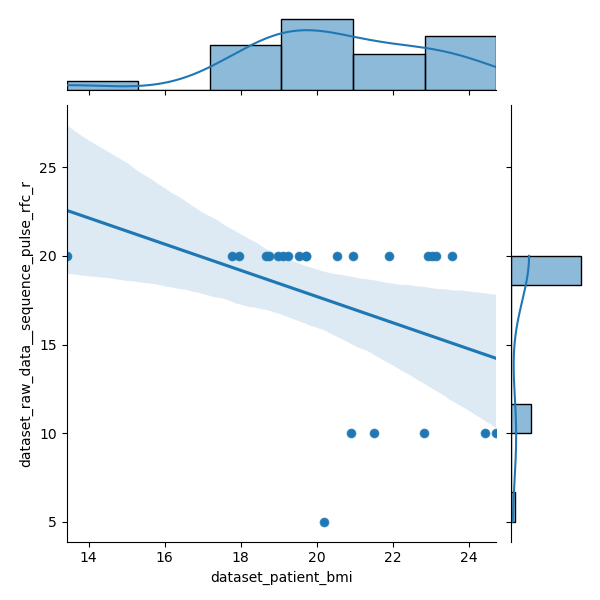

R = -0.38


<IPython.core.display.Javascript object>

R = -0.43


In [33]:
x = df["dataset_patient_bmi"]
y = df["dataset_raw_data__sequence_pulse_rfc_r"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_raw_data__sequence_vref"]
y = df["dataset_raw_data__sequence_pulse_rfc_r"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))


Ok makes sense. Since I was preferably scanning at R=20, I reduced R when BMI/Vref was too high (~300V). So it's not really like I had a choice.

But still I should performed R=10 systematically, it gives lower TE and stronger SNR. This was probably not the case in vitro because of long T2s...

It would be nice to estimate spectral quality with more than just SNR and LW. I suspect artefacts, lipids and shit showing up when reducing R because of bad selectivity and voxel contamination.

# [PAPER] Shimming: what is the best? 1st vs. 2nd order?
- Did 2nd order shim help? Extracting data from notebooks.

In [34]:
df = df_sc

# found this in my labbooks:
patient_list = [313,     319,     328, 329, 333, 336,  338,  300,    311,  336,  319,  313,  314,  349  ]
study_list = [    1,       1,       1,   1,   1,   1,    1,    2,      2,    1,    2,    2,    2,    2  ]
lw_linear = [    45,      25,      25,  30,  45,  30,   25,   35, np.nan,  np.nan,   39,   30,   20,   26  ]
lw_full = [      55,  np.nan,      40,  25,  50,  60,   35, 37.5,     25,   27,  np.nan,   50,   25,   30  ]

# keep only patient and study present in df
patient_list2 = []
study_list2 = []
lw_linear2 = []
lw_full2 = []
for p, s, lw1, lw2 in zip(patient_list, study_list, lw_linear, lw_full):
    if(p in df["patient"].to_list() and s in df.loc[df["patient"] == p]["study"].to_list()):
        patient_list2.append(p)
        study_list2.append(s)
        lw_linear2.append(lw1)
        lw_full2.append(lw2)

lw_linear2 = np.array(lw_linear2)
lw_full2 = np.array(lw_full2)
lw_diff2 = lw_full2 - lw_linear2
lw_diff2 = lw_diff2[~np.isnan(lw_diff2)]
print("In average, there was a %.2f +/- %.2f Hz change for the water LW when going from 1st to 2nd order shimming!" % (lw_diff2.mean(),lw_diff2.std()))


In average, there was a 9.65 +/- 9.44 Hz change for the water LW when going from 1st to 2nd order shimming!


# Scan-time, number of averages and data rejection

## Theoretical, effective (gated) and post-cor. acquisition duration
Compare theory, effective acquisition durations and "useful" acquisition durations (post-correction)

<IPython.core.display.Javascript object>


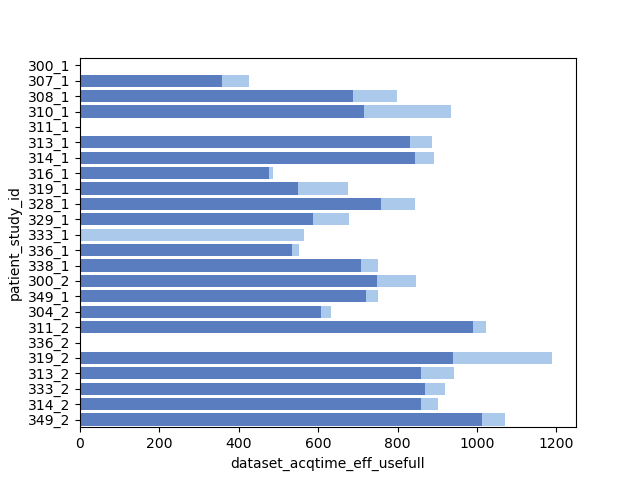

<AxesSubplot:xlabel='dataset_acqtime_eff_usefull', ylabel='patient_study_id'>

In [35]:
df = df_sc

# calculating usefull acqusition time post-correction
df["dataset_acqtime_eff_usefull"] = df["dataset_acqtime_eff"] - (df["dataset_acqtime_eff"] * df["dataset_rejection_rate_prct"] / 100.0)

# make a nice stackplot for each scan with: effective, and usefull
plt.figure()
sns.set_color_codes("pastel")
sns.barplot(x=df["dataset_acqtime_eff"], y=df["patient_study_id"],
            label="dataset_acqtime_eff", color="b")
sns.set_color_codes("muted")
sns.barplot(x=df["dataset_acqtime_eff_usefull"], y=df["patient_study_id"],
            label="dataset_acqtime_eff_usefull", color="b")


In [36]:
# to summarize into one bargraph:
# relative gain estimations between
# theory and effective durations
# effective durations and post-corrected durations

df["dataset_acqtime_eff_gain_prct"] = (df["dataset_acqtime_eff"] - df["dataset_acqtime"]) / df["dataset_acqtime"] * 100.0
df["dataset_acqtime_eff_usefull_gain_prct"] = (df["dataset_acqtime_eff_usefull"] - df["dataset_acqtime_eff"]) / df["dataset_acqtime_eff"] * 100.0
df["dataset_acqtime_eff_usefull_gain_prct_full"] = 100.0

plt.figure()
y = df["dataset_acqtime_eff_usefull_gain_prct_full"]
sns.set_color_codes("pastel")
sns.barplot(x=y, label="100%", color="b")

y = 100 + df["dataset_acqtime_eff_usefull_gain_prct"]
sns.set_color_codes("muted")
sns.barplot(x=y, label="dataset_acqtime_eff_usefull_gain_prct", color="b")


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='dataset_acqtime_eff_usefull_gain_prct'>

## Ideal acquisition time?
Any idea of how long shoud we scan?
Does it depend on SNR (I hope!) or BMI?

<IPython.core.display.Javascript object>


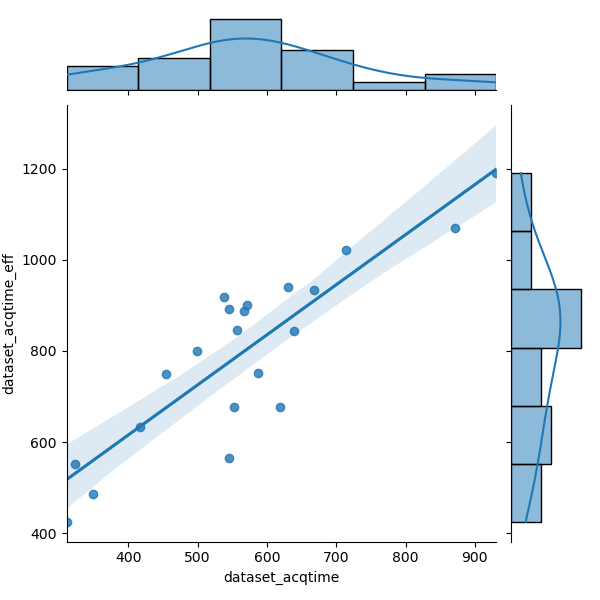

R = 0.87


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


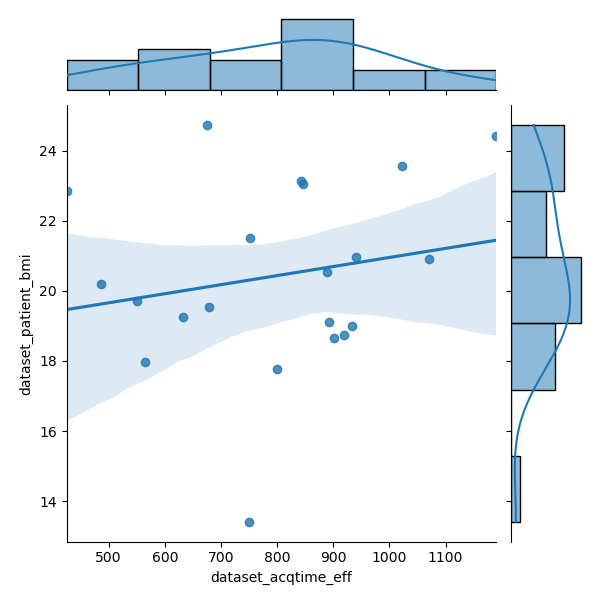

R = 0.19


<IPython.core.display.Javascript object>

R = -0.06


<IPython.core.display.Javascript object>


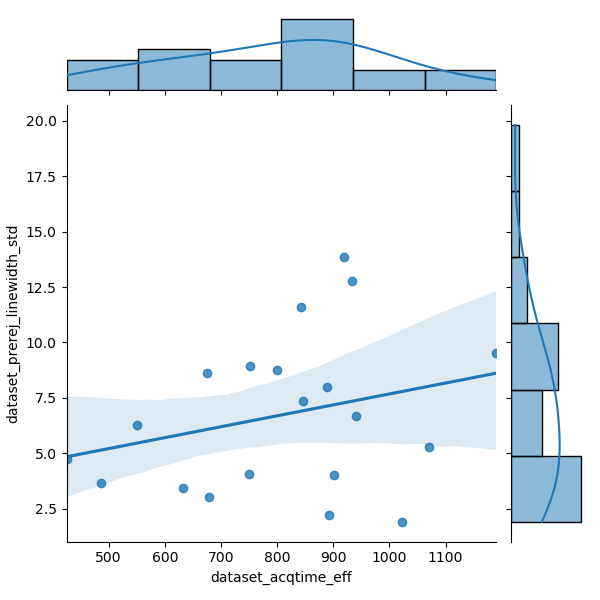

R = 0.27


In [37]:
df = df_sc

x = df["dataset_acqtime"]
y = df["dataset_acqtime_eff"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_acqtime"]
y = df["dataset_acqtime_eff"]
z = df["dataset_patient_bfp"]
g = sns.relplot(x=x, y=y, hue=z, palette=cm, s=300)
g.ax.xaxis.grid(True)
g.ax.yaxis.grid(True)

x = df["dataset_acqtime_eff"]
y = df["dataset_patient_bmi"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_acqtime_eff"]
y = df["dataset_snr_final"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))

x = df["dataset_acqtime_eff"]
y = df["dataset_prerej_linewidth_std"]
g = sns.JointGrid(x=x, y=y)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)
print("R = %.2f" % x.corr(y))


This what we can see:
* fat subjects need longer scan time (actually constrained by SAR and long TR
* no correlation between SNR and acquisition time
* the longer we scan, the less stable is the signal...

## Group-averaged rejected spectrum
Average over all subjects the data rejected into one crappy spectrum

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


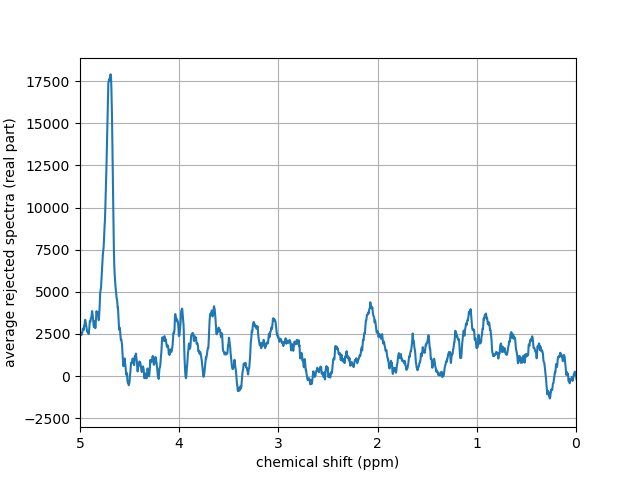

Text(0, 0.5, 'average rejected spectra (real part)')

In [38]:
df = df_sc

#init
s_arr = None
dt_final = 0.0001

fig = plt.figure()
ax = fig.subplots()

# extract rej spectrum for each dataset
for s in df["dataset_raw_data__data_rejection[0]_Rejected spectrum_obj"]:
    if(type(s) is not np.float):
        # resample so that all data can be averaged
        old_t = np.arange(0, s.shape[0] * s.dt, s.dt)
        new_t = np.arange(0, s.shape[0] * dt_final, dt_final) 

        s_interp = np.interp(new_t, old_t, s)

        # convert to suspect
        s_MRSData = suspect.MRSData(s_interp, dt_final, s.f0)
        s_MRSData2 = s_MRSData.view(reco.MRSData2)        

        s_MRSData2 = s_MRSData2.correct_zerofill_nd()
        if(s_arr is None):
            s_arr = s
        else:
            s_arr = np.vstack((s_arr, s_MRSData2))

        ax.plot(s_MRSData2.frequency_axis_ppm(), np.real(s_MRSData2.spectrum()))

ax.grid('on')
ax.set_xlim(5, 0)
ax.set_xlabel("chemical shift (ppm)")
ax.set_ylabel("rejected spectra (real part)")

# make the average + std plot
s_mean = np.mean(s_arr, axis=0)
s_mean = suspect.MRSData(s_mean, dt_final, s.f0)
s_mean = s_mean.view(reco.MRSData2)

s_std = np.std(s_arr, axis=0)
s_std = suspect.MRSData(s_std, dt_final, s.f0)
s_std = s_std.view(reco.MRSData2)

fig = plt.figure()
ax = fig.subplots()
ax.plot(s_mean.frequency_axis_ppm(), np.real(s_mean.spectrum()))
ax.grid('on')
ax.set_xlim(5, 0)
ax.set_xlabel("chemical shift (ppm)")
ax.set_ylabel("average rejected spectra (real part)")


Looks bad:
* Many artefact peaks
* Lipids
* NAA, Cho, Cre residue at 2 and 3 ppm ! :(
* Not sure about the 3-4 ppm region
* Usual artefact 5-6ppm

## Frequency realignment & data rejection: gain in SNR & LW
- Evaluate data rejection approach with peak properties estimated before and after :)

<IPython.core.display.Javascript object>


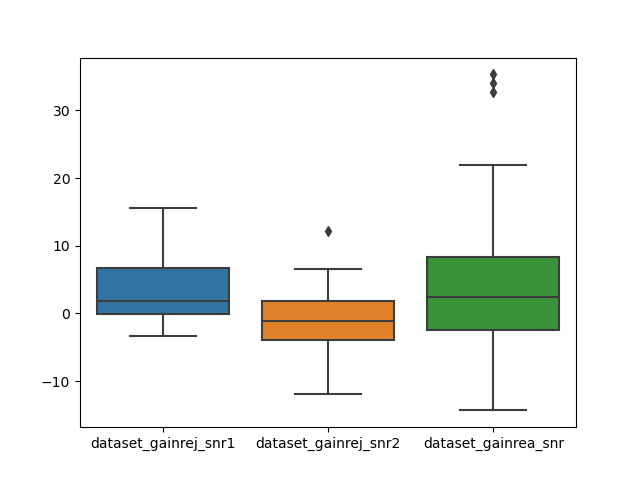

<IPython.core.display.Javascript object>

<AxesSubplot:>

In [39]:
df = df_sc

# extract SNR and LW estimation regarding frequency realignment and data rejection 
df["dataset_prerej_snr1"] = df["dataset_raw_data__data_rejection[0]_Pre-rejection_snr"]
df["dataset_prerej_snr2"] = df["dataset_raw_analysis-results_frequency realigning_snr"]
df["dataset_postrej_snr1"] = df["dataset_raw_data__data_rejection[0]_Post-rejection_snr"]
df["dataset_postrej_snr2"] = df["dataset_raw_analysis-results_data rejecting_snr"]
#
df["dataset_prerej_lw1"] = df["dataset_raw_data__data_rejection[0]_Pre-rejection_lw"]
df["dataset_prerej_lw2"] = df["dataset_raw_analysis-results_frequency realigning_lw"]
df["dataset_postrej_lw1"] = df["dataset_raw_data__data_rejection[0]_Post-rejection_lw"]
df["dataset_postrej_lw2"] = df["dataset_raw_analysis-results_data rejecting_lw"]
#
df["dataset_prerea_snr"] = df["dataset_raw_analysis-results_apodizing_snr"]
df["dataset_postrea_snr"] = df["dataset_raw_analysis-results_frequency realigning_snr"]
#
df["dataset_prerea_lw"] = df["dataset_raw_analysis-results_apodizing_lw"]
df["dataset_postrea_lw"] = df["dataset_raw_analysis-results_frequency realigning_lw"]

# SNR and LW gain calculation
df["dataset_gainrej_snr1"] = (df["dataset_postrej_snr1"] - df["dataset_prerej_snr1"]) / df["dataset_prerej_snr1"] * 100.0
df["dataset_gainrej_snr2"] = (df["dataset_postrej_snr2"] - df["dataset_prerej_snr2"]) / df["dataset_prerej_snr2"] * 100.0
df["dataset_gainrej_lw1"] = (df["dataset_postrej_lw1"] - df["dataset_prerej_lw1"])
df["dataset_gainrej_lw2"] = (df["dataset_postrej_lw2"] - df["dataset_prerej_lw2"])
#
df["dataset_gainrea_snr"] = (df["dataset_postrea_snr"] - df["dataset_prerea_snr"]) / df["dataset_prerea_snr"] * 100.0
df["dataset_gainrea_lw"] = (df["dataset_postrea_lw"] - df["dataset_prerea_lw"])

plt.figure()
y=df[["dataset_gainrej_snr1", "dataset_gainrej_snr2", "dataset_gainrea_snr"]]
sns.boxplot(data=y)

plt.figure()
y=df[["dataset_gainrej_lw1", "dataset_gainrej_lw2", "dataset_gainrea_lw"]]
sns.boxplot(data=y)


# Gating approaches
For subjects who were scanned with different gating methods
* compare final SNR and LW
* compare peak properties variability (before data rejection)

In [40]:
df = df_sc_all_slaser

# get the scans hash manually
df_gating_tests = df.loc[(df["patient_study_id"] == "300_1")
                        | (df["patient_study_id"] == "307_1")
                        | (df["patient_study_id"] == "311_2")
                        | (df["patient_study_id"] == "336_2")]
df_gating_tests

patient  study  \
scan_hash                                          
fb81785a61e346c7fdbb37479f312ca5      300      1   
2fff316122fc89a0b4d1f918f6cd62d8      300      1   
40ef3af628211f936a93c79adb00ac9d      307      1   
159437f4b7de93d40c7fef7853019df3      307      1   
4a3a0b1b9f85f1928b9bfb342358fef4      307      1   
1baf6b702f39fefb5ad9e44179057ef7      307      1   
75ae13bc44bf3d55f5be46d4c59df84d      311      2   
caf8ec7f9e1026afbfa1e2c41ba43539      311      2   
355445d1bac5ee682c88f889b4c01d09      336      2   
967a1b8dace220e916df680759f31d84      336      2   
49872ea4c73b9206c804c4fdaa298ed9      336      2   
fd2940e9489a5d28773792aeb95f54e7      336      2   

                                                     dataset_legend  \
scan_hash                                                             
fb81785a61e346c7fdbb37479f312ca5                 #0 sLASER R:N=25:1   
2fff316122fc89a0b4d1f918f6cd62d8            #1 sLASER R:N=25:1 trig   
40ef3af628211f936a93c79adb00ac9d        #0 sLASER 20:1 cardiac trig   
159437f4b7de93d40c7fef7853019df3           #1 sLASER 20:1 resp trig   
4a3a0b1b9f85f1928b9bfb342358fef4             #2 sLASER 20:1 no trig   
1baf6b702f39fefb5ad9e44179057ef7  #3 sLASER 10:2 repos. + resp trig   
75ae13bc44bf3d55f5be46d4c59df84d         #0 sLASER 20/1 NA=128 trig   
caf8ec7f9e1026afbfa1e2c41ba43539       #1 sLASER 20/1 NA=128 notrig   
355445d1bac5ee682c88f889b4c01d09        #0 sLASER 10/2 NA=64 notrig   
967a1b8dace220e916df680759f31d84         #0 sLASER 20/1 NA=128 trig   
49872ea4c73b9206c804c4fdaa298ed9        #1 sLASER 20/1 NA=64 notrig   
fd2940e9489a5d28773792aeb95f54e7         #2 sLASER 5/5 NA=64 notrig   

                                                               dataset_raw_files[0]  \
scan_hash                                                                             
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
159437f4b7de93d40c7fef7853019df3  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
1baf6b702f39fefb5ad9e44179057ef7  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
75ae13bc44bf3d55f5be46d4c59df84d  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
967a1b8dace220e916df680759f31d84  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
fd2940e9489a5d28773792aeb95f54e7  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_files[1]  \
scan_hash                                                                             
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
159437f4b7de93d40c7fef7853019df3  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
1baf6b702f39fefb5ad9e44179057ef7  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
75ae13bc44bf3d55f5be46d4c59df84d  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
355445d1bac5ee682c88f889b4c01d09  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
967a1b8dace220e916df680759f31d84  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/

In [41]:
# remove some scans
df_gating_tests = df_gating_tests.drop("1baf6b702f39fefb5ad9e44179057ef7")
df_gating_tests = df_gating_tests.drop("fd2940e9489a5d28773792aeb95f54e7")
df_gating_tests = df_gating_tests.drop("355445d1bac5ee682c88f889b4c01d09")
df_gating_tests

patient  study  \
scan_hash                                          
fb81785a61e346c7fdbb37479f312ca5      300      1   
2fff316122fc89a0b4d1f918f6cd62d8      300      1   
40ef3af628211f936a93c79adb00ac9d      307      1   
159437f4b7de93d40c7fef7853019df3      307      1   
4a3a0b1b9f85f1928b9bfb342358fef4      307      1   
75ae13bc44bf3d55f5be46d4c59df84d      311      2   
caf8ec7f9e1026afbfa1e2c41ba43539      311      2   
967a1b8dace220e916df680759f31d84      336      2   
49872ea4c73b9206c804c4fdaa298ed9      336      2   

                                                dataset_legend  \
scan_hash                                                        
fb81785a61e346c7fdbb37479f312ca5            #0 sLASER R:N=25:1   
2fff316122fc89a0b4d1f918f6cd62d8       #1 sLASER R:N=25:1 trig   
40ef3af628211f936a93c79adb00ac9d   #0 sLASER 20:1 cardiac trig   
159437f4b7de93d40c7fef7853019df3      #1 sLASER 20:1 resp trig   
4a3a0b1b9f85f1928b9bfb342358fef4        #2 sLASER 20:1 no trig   
75ae13bc44bf3d55f5be46d4c59df84d    #0 sLASER 20/1 NA=128 trig   
caf8ec7f9e1026afbfa1e2c41ba43539  #1 sLASER 20/1 NA=128 notrig   
967a1b8dace220e916df680759f31d84    #0 sLASER 20/1 NA=128 trig   
49872ea4c73b9206c804c4fdaa298ed9   #1 sLASER 20/1 NA=64 notrig   

                                                               dataset_raw_files[0]  \
scan_hash                                                                             
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
159437f4b7de93d40c7fef7853019df3  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
75ae13bc44bf3d55f5be46d4c59df84d  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
967a1b8dace220e916df680759f31d84  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_files[1]  \
scan_hash                                                                             
fb81785a61e346c7fdbb37479f312ca5  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
2fff316122fc89a0b4d1f918f6cd62d8  /home/tangir/crmbm/acq_twix/300-pm-p1-moelle/m...   
40ef3af628211f936a93c79adb00ac9d  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
159437f4b7de93d40c7fef7853019df3  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
4a3a0b1b9f85f1928b9bfb342358fef4  /home/tangir/crmbm/acq_twix/307-AP-P1-MOELLE/m...   
75ae13bc44bf3d55f5be46d4c59df84d  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
caf8ec7f9e1026afbfa1e2c41ba43539  /home/tangir/crmbm/acq_twix/311-sl-p2-moelle/m...   
967a1b8dace220e916df680759f31d84  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   
49872ea4c73b9206c804c4fdaa298ed9  /home/tangir/crmbm/acq_twix/336-nb-p2-moelle/m...   

                                                               dataset_raw_data_obj  \
scan_hash                                                                             
fb81785a61e346c7fdbb37479f312ca5  [(426.508162270165-25.29576424165769j), (419.8...   
2fff316122fc89a0b4d1f918f6cd62d8  [(466.7910467092009+42.6625311942012j), (449.5...   
40ef3af628211f936a93c79adb00ac9d  [(407.49602726268415-207.9086346239237j), (425...   
159437f4b7de93d40c7fef7853019df3  [(498.05689346512656+329.8932319576538j), (420...   
4a3a0b1b9f85f1928b9bfb342358fef4  [(509.3192079352583+42.15127719925854j), (507....   
75ae13bc44bf3d55f5be46d4c59df84d  [(278.27531875958914-2.7295633846843037j), (26...   
caf8ec7f9e1026afbfa1e2c41ba43539  [(273.0080880478138+48.28108955825748j), (269....   
967a1b8dace220e916df680759f31d84  [

In [42]:
df_gating_results = pd.DataFrame(columns=["patient_study_id",
                 "notrig_dataset_snr_norm",
                 "notrig_dataset_lw",
                 "notrig_prerej_amplitude_std",
                 "notrig_prerej_linewidth_std",
                 "notrig_prerej_chemical_shift_std",
                 "notrig_prerej_phase_std",
                 "cardiac_dataset_snr_norm",
                 "cardiac_dataset_lw",
                 "cardiac_prerej_amplitude_std",
                 "cardiac_prerej_linewidth_std",
                 "cardiac_prerej_chemical_shift_std",
                 "cardiac_prerej_phase_std",
                 "resp_dataset_snr_norm",
                 "resp_dataset_lw",
                 "resp_prerej_amplitude_std",
                 "resp_prerej_linewidth_std",
                 "resp_prerej_chemical_shift_std",
                 "resp_prerej_phase_std"])
df_gating_results = df_gating_results.set_index("patient_study_id")

# initialize
for this_index, this_row in df_gating_tests.iterrows():
    this_patient_study_id = this_row["patient_study_id"]
    df_gating_results.loc[this_patient_study_id] = [np.nan] * 18

# complete
for this_index, this_row in df_gating_tests.iterrows():
    this_patient_study_id = this_row["patient_study_id"]
    this_gating = this_row["dataset_raw_data__sequence_gating_mode"]
    if(this_gating == sim.gating_signal_source.NO_GATING):
        df_gating_results.loc[this_patient_study_id]["notrig_dataset_snr_norm"] = this_row["dataset_snr_norm"]
        df_gating_results.loc[this_patient_study_id]["notrig_dataset_lw"] = this_row["dataset_lw"]
        df_gating_results.loc[this_patient_study_id]["notrig_prerej_amplitude_std"] = this_row["dataset_prerej_amplitude_std"]
        df_gating_results.loc[this_patient_study_id]["notrig_prerej_linewidth_std"] = this_row["dataset_prerej_linewidth_std"]
        df_gating_results.loc[this_patient_study_id]["notrig_prerej_chemical_shift_std"] = this_row["dataset_prerej_chemical_shift_std"]
        df_gating_results.loc[this_patient_study_id]["notrig_prerej_phase_std"] = this_row["dataset_prerej_phase_std"]

    elif(this_gating == sim.gating_signal_source.CARDIAC_GATING):
        df_gating_results.loc[this_patient_study_id]["cardiac_dataset_snr_norm"] = this_row["dataset_snr_norm"]
        df_gating_results.loc[this_patient_study_id]["cardiac_dataset_lw"] = this_row["dataset_lw"]
        df_gating_results.loc[this_patient_study_id]["cardiac_prerej_amplitude_std"] = this_row["dataset_prerej_amplitude_std"]
        df_gating_results.loc[this_patient_study_id]["cardiac_prerej_linewidth_std"] = this_row["dataset_prerej_linewidth_std"]
        df_gating_results.loc[this_patient_study_id]["cardiac_prerej_chemical_shift_std"] = this_row["dataset_prerej_chemical_shift_std"]
        df_gating_results.loc[this_patient_study_id]["cardiac_prerej_phase_std"] = this_row["dataset_prerej_phase_std"]

    elif(this_gating == sim.gating_signal_source.RESP_GATING):
        df_gating_results.loc[this_patient_study_id]["resp_dataset_snr_norm"] = this_row["dataset_snr_norm"]
        df_gating_results.loc[this_patient_study_id]["resp_dataset_lw"] = this_row["dataset_lw"]
        df_gating_results.loc[this_patient_study_id]["resp_prerej_amplitude_std"] = this_row["dataset_prerej_amplitude_std"]
        df_gating_results.loc[this_patient_study_id]["resp_prerej_linewidth_std"] = this_row["dataset_prerej_linewidth_std"]
        df_gating_results.loc[this_patient_study_id]["resp_prerej_chemical_shift_std"] = this_row["dataset_prerej_chemical_shift_std"]
        df_gating_results.loc[this_patient_study_id]["resp_prerej_phase_std"] = this_row["dataset_prerej_phase_std"]
             
df_gating_results

notrig_dataset_snr_norm notrig_dataset_lw  \
patient_study_id                                             
300_1                            32.3484           13.0208   
307_1                            35.7298           27.6693   
311_2                            32.4855           14.6484   
336_2                            24.1629           11.3932   

                 notrig_prerej_amplitude_std notrig_prerej_linewidth_std  \
patient_study_id                                                           
300_1                                24.6681                     4.58813   
307_1                                65.4348                     13.5994   
311_2                                 13.072                     2.44122   
336_2                                59.6622                     6.17274   

                 notrig_prerej_chemical_shift_std notrig_prerej_phase_std  \
patient_study_id                                                            
300_1                                           0                0.228364   
307_1                                   0.0249303                0.667752   
311_2                                   0.0039589                0.213035   
336_2                                   0.0954253                0.883059   

                 cardiac_dataset_snr_norm cardiac_dataset_lw  \
patient_study_id                                               
300_1                                 NaN                NaN   
307_1                             15.0791            22.7865   
311_2                                 NaN                NaN   
336_2                                 NaN                NaN   

                 cardiac_prerej_amplitude_std cardiac_prerej_linewidth_std  \
patient_study_id                                                             
300_1                                     NaN                          NaN   
307_1                                 43.4153                      5.45147   
311_2                                     NaN                          NaN   
336_2                                     NaN                          NaN   

                 cardiac_prerej_chemical_shift_std cardiac_prerej_phase_std  \
patient_study_id                                                              
300_1                                          NaN                      NaN   
307_1                                    0.0286077                 0.512939   
311_2                                          NaN                      NaN   
336_2                                          NaN                      NaN   

                 resp_dataset_snr_norm resp_dataset_lw  \
patient_study_id                                         
300_1                          35.7319         14.6484   
307_1                          25.1213         29.2969   
311_2                          30.3051         13.0208   
336_2                          27.5973         11.3932   

                 resp_prerej_amplitude_std resp_prerej_linewidth_std  \
patient_study_id                                                       
300_1                              34.1816                    7.9642   
307_1                              47.3168                   17.8939   
311_2                              13.0128                   1.92368   
336_2                              38.9949                   4.05722   

                 resp_prerej_chemical_shift_std resp_prerej_phase_std  
patient_study_id                                                       
300_1                                 0.0391588              0.291642  
307_1                                0.00596214              0.361885  
311_2                                0.00244201              0.224967  
336_2                                 0.0368152              0.562552

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


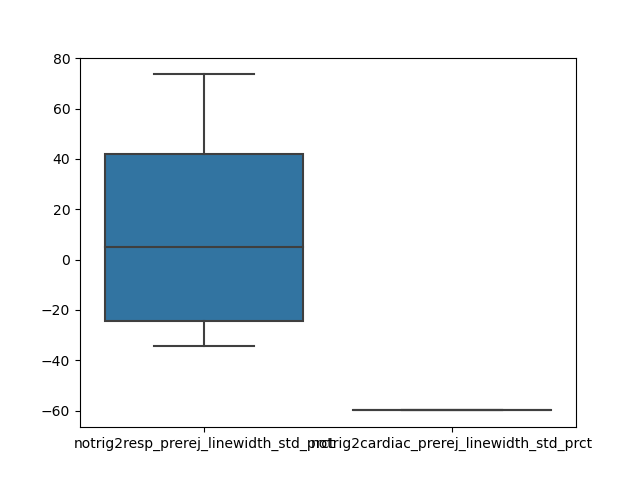

<IPython.core.display.Javascript object>


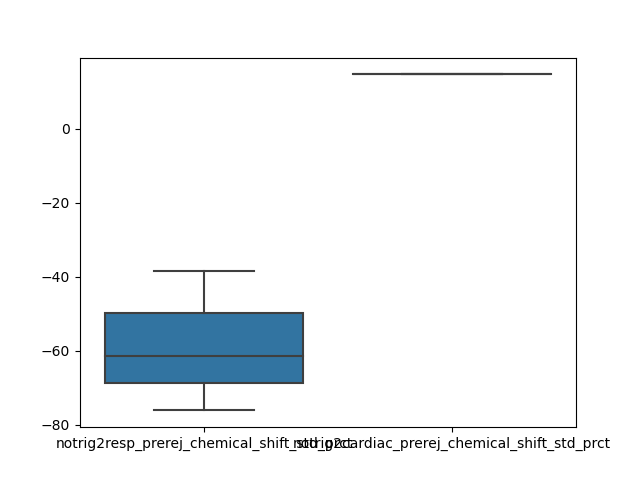

<IPython.core.display.Javascript object>

<AxesSubplot:>

In [43]:
# replace 0 by nan
df_gating_results = df_gating_results.replace(0, np.nan)

# estimate relative changes of all this
df_gating_results["notrig2resp_dataset_snr_norm_prct"] = (df_gating_results["resp_dataset_snr_norm"] - df_gating_results["notrig_dataset_snr_norm"]) / df_gating_results["notrig_dataset_snr_norm"] * 100
df_gating_results["notrig2resp_dataset_lw"] = df_gating_results["resp_dataset_lw"] - df_gating_results["notrig_dataset_lw"]
df_gating_results["notrig2resp_prerej_amplitude_std_prct"] = (df_gating_results["resp_prerej_amplitude_std"] - df_gating_results["notrig_prerej_amplitude_std"]) / df_gating_results["notrig_prerej_amplitude_std"] * 100
df_gating_results["notrig2resp_prerej_linewidth_std_prct"] = (df_gating_results["resp_prerej_linewidth_std"] - df_gating_results["notrig_prerej_linewidth_std"]) / df_gating_results["notrig_prerej_linewidth_std"] * 100
df_gating_results["notrig2resp_prerej_chemical_shift_std_prct"] = (df_gating_results["resp_prerej_chemical_shift_std"] - df_gating_results["notrig_prerej_chemical_shift_std"]) / df_gating_results["notrig_prerej_chemical_shift_std"] * 100
df_gating_results["notrig2resp_prerej_phase_std_prct"] = (df_gating_results["resp_prerej_phase_std"] - df_gating_results["notrig_prerej_phase_std"]) / df_gating_results["notrig_prerej_phase_std"] * 100
#
df_gating_results["notrig2cardiac_dataset_snr_norm_prct"] = (df_gating_results["cardiac_dataset_snr_norm"] - df_gating_results["notrig_dataset_snr_norm"]) / df_gating_results["notrig_dataset_snr_norm"] * 100
df_gating_results["notrig2cardiac_dataset_lw"] = df_gating_results["cardiac_dataset_lw"] - df_gating_results["notrig_dataset_lw"]
df_gating_results["notrig2cardiac_prerej_amplitude_std_prct"] = (df_gating_results["cardiac_prerej_amplitude_std"] - df_gating_results["notrig_prerej_amplitude_std"]) / df_gating_results["notrig_prerej_amplitude_std"] * 100
df_gating_results["notrig2cardiac_prerej_linewidth_std_prct"] = (df_gating_results["cardiac_prerej_linewidth_std"] - df_gating_results["notrig_prerej_linewidth_std"]) / df_gating_results["notrig_prerej_linewidth_std"] * 100
df_gating_results["notrig2cardiac_prerej_chemical_shift_std_prct"] = (df_gating_results["cardiac_prerej_chemical_shift_std"] - df_gating_results["notrig_prerej_chemical_shift_std"]) / df_gating_results["notrig_prerej_chemical_shift_std"] * 100
df_gating_results["notrig2cardiac_prerej_phase_std_prct"] = (df_gating_results["cardiac_prerej_phase_std"] - df_gating_results["notrig_prerej_phase_std"]) / df_gating_results["notrig_prerej_phase_std"] * 100

# display
plt.figure()
y=df_gating_results[["notrig2resp_dataset_snr_norm_prct", "notrig2cardiac_dataset_snr_norm_prct"]]
sns.boxplot(data=y)

plt.figure()
y=df_gating_results[["notrig2resp_dataset_lw", "notrig2cardiac_dataset_lw"]]
sns.boxplot(data=y)

plt.figure()
y=df_gating_results[["notrig2resp_prerej_amplitude_std_prct", "notrig2cardiac_prerej_amplitude_std_prct"]]
sns.boxplot(data=y)

plt.figure()
y=df_gating_results[["notrig2resp_prerej_linewidth_std_prct", "notrig2cardiac_prerej_linewidth_std_prct"]]
sns.boxplot(data=y)

plt.figure()
y=df_gating_results[["notrig2resp_prerej_chemical_shift_std_prct", "notrig2cardiac_prerej_chemical_shift_std_prct"]]
sns.boxplot(data=y)

plt.figure()
y=df_gating_results[["notrig2resp_prerej_phase_std_prct", "notrig2cardiac_prerej_phase_std_prct"]]
sns.boxplot(data=y)


All this was hard to program... but interesting however poorly significant results:
* too few points for cardiac gating to conclude anything
* the use of resp gating increases signal stability during scan: all peak properties (amplitude, linewidth, chemical shift and phase) standard deviations are reduced
* however, the gain in SNR/LW is really poor when comparing resp to no trig. Need more subjects if I really want to show this.

# Quantification results
Anything below deals with fit results

## Load fit data

In [44]:
rdb_sc = db.data_db("/home/tangir/crmbm/acq_db/sc.pkl")
rdb_brain = db.data_db("/home/tangir/crmbm/acq_db/brain.pkl")
df_fit = rdb_sc.extend_df_fit()
df_brain_fit = rdb_brain.extend_df_fit()

# remove db objects to free memory
del(rdb_sc)
del(rdb_brain)


(INFO)  data_db.__init__: initializing db files [in progress]
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/sc.pkl
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/sc_fit.pkl
(INFO)  data_db.__init__: initializing db files [done]
(INFO)  data_db.__init__: initializing db files [in progress]
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/brain.pkl
(INFO)  data_db.__init__: /home/tangir/crmbm/acq_db/brain_fit.pkl
(INFO)  data_db.__init__: initializing db files [done]
(INFO)  data_db.extend_df_fit: extending dataframe by scraping data...
(INFO)  data_db.extend_df_fit: extending dataframe by scraping data...


## Join data

In [45]:
# SC dataframe
df_sc = pd.merge(df_fit, df_sc, left_on='scan_hash', right_index=True, how='inner', sort=False)

# brain dataframe
df_brain = pd.merge(df_brain_fit, df_brain, left_on='scan_hash', right_index=True, how='inner', sort=False)

## Show really badly fitted SC datasets
using FQN and R2, just to check things and reco/refit if necessary

In [46]:
df = df_sc

rsq_f_threshold = 0.6
fqn_threshold = 3

df_bad_fit = df.loc[(df["fit_results_optim_result_rsq_f"] < rsq_f_threshold)
                    & (df["fit_results_optim_result_fqn"] > fqn_threshold)]

k = 0
for this_index, this_row in df_bad_fit.iterrows():
    s = this_row["dataset_raw_data_obj"]
    if(s is None):
        s = this_row["dataset_dcm_data_obj"]
    
    s.set_display_offset(20000.0 * k)
    s.display_spectrum_1d(3303)
    k += 1
    
df_bad_fit[["patient", "study", "scan_hash", "fit_strategy_name", "dataset_legend", "dataset_raw_analysis-results_cropping_snr", "dataset_raw_analysis-results_cropping_lw"]]

<IPython.core.display.Javascript object>

patient study  \
fit_hash                                         
60325a09267609672fe85609453fc7b2     313     1   
bcd1df78e1276fa051893f3e09ac2d16     313     1   
cb72a7ac61f10eddb43756be3ecc98c6     313     1   
b2e8f13b73c0ef05cee324b7a1163f21     313     1   
17af89f322c67b30b11148bbf7a01363     313     1   
2433c1060b2989f3072afe75015a8b09     313     1   
5e14a2e4cb28344e727e6a49843a11df     319     1   
017cfaf19635a68e1c430a09aa34e9b3     319     1   
2765b9aa9e1232c58eca5ff8c1c1a28a     319     1   
e6241b8da5ef994d55b1a0ec41674186     319     1   
1f6dc379fbc290d794d8be55be6457f9     319     1   
7f669a6799005a7d86e990df1128370a     319     1   
1cf3907b8e010579d4e3d6d4818902af     333     1   
dbe21711acec0dde4cd344f451b1c05d     333     1   
26e06d49b6559d6f127b537a36ebb37d     333     1   
cb20f4acc18aab786706f323ed6fd840     333     1   
c74ad1e57f044b5c44ee1a54f9f4d3b2     333     1   
4c09c753b02fcabfb43f130b01bbb346     333     1   

                                                         scan_hash  \
fit_hash                                                             
60325a09267609672fe85609453fc7b2  9f8067ea065153da5b3a352d58f6ca23   
bcd1df78e1276fa051893f3e09ac2d16  9f8067ea065153da5b3a352d58f6ca23   
cb72a7ac61f10eddb43756be3ecc98c6  9f8067ea065153da5b3a352d58f6ca23   
b2e8f13b73c0ef05cee324b7a1163f21  9f8067ea065153da5b3a352d58f6ca23   
17af89f322c67b30b11148bbf7a01363  9f8067ea065153da5b3a352d58f6ca23   
2433c1060b2989f3072afe75015a8b09  9f8067ea065153da5b3a352d58f6ca23   
5e14a2e4cb28344e727e6a49843a11df  f416f6db6cda52195e3b8046fc586ef2   
017cfaf19635a68e1c430a09aa34e9b3  f416f6db6cda52195e3b8046fc586ef2   
2765b9aa9e1232c58eca5ff8c1c1a28a  f416f6db6cda52195e3b8046fc586ef2   
e6241b8da5ef994d55b1a0ec41674186  f416f6db6cda52195e3b8046fc586ef2   
1f6dc379fbc290d794d8be55be6457f9  f416f6db6cda52195e3b8046fc586ef2   
7f669a6799005a7d86e990df1128370a  f416f6db6cda52195e3b8046fc586ef2   
1cf3907b8e010579d4e3d6d4818902af  3695a02a4fbf0153215cf09eaa21658e   
dbe21711acec0dde4cd344f451b1c05d  3695a02a4fbf0153215cf09eaa21658e   
26e06d49b6559d6f127b537a36ebb37d  3695a02a4fbf0153215cf09eaa21658e   
cb20f4acc18aab786706f323ed6fd840  3695a02a4fbf0153215cf09eaa21658e   
c74ad1e57f044b5c44ee1a54f9f4d3b2  3695a02a4fbf0153215cf09eaa21658e   
4c09c753b02fcabfb43f130b01bbb346  3695a02a4fbf0153215cf09eaa21658e   

                                                   fit_strategy_name  \
fit_hash                                                               
60325a09267609672fe85609453fc7b2                       singlets_None   
bcd1df78e1276fa051893f3e09ac2d16                  singlets_free_None   
cb72a7ac61f10eddb43756be3ecc98c6               singlets_CH2s_mI_None   
b2e8f13b73c0ef05cee324b7a1163f21          free_singlets_CH2s_mI_None   
17af89f322c67b30b11148bbf7a01363       singlets_CH2s_mI_Glx_Tau_None   
2433c1060b2989f3072afe75015a8b09  free_singlets_CH2s_mI_Glx_Tau_None   
5e14a2e4cb28344e727e6a49843a11df                       singlets_None   
017cfaf19635a68e1c430a09aa34e9b3                  singlets_free_None   
2765b9aa9e1232c58eca5ff8c1c1a28a               singlets_CH2s_mI_None   
e6241b8da5ef994d55b1a0ec41674186          free_singlets_CH2s_mI_None   
1f6dc379fbc290d794d8be55be6457f9       singlets_CH2s_mI_Glx_Tau_None   
7f669a6799005a7d86e990df1128370a  free_singlets_CH2s_mI_Glx_Tau_None   
1cf3907b8e010579d4e3d6d4818902af                       singlets_None   
dbe21711acec0dde4cd344f451b1c05d                  singlets_free_None   
26e06d49b6559d6f127b537a36ebb37d               singlets_CH2s_mI_None   
cb20f4acc18aab786706f323ed6fd840          free_singlets_CH2s_mI_None   
c74ad1e57f044b5c44ee1a54f9f4d3b2       singlets_CH2s_mI_Glx_Tau_None   
4c09c753b02fcabfb43f130b01bbb346  free_singlets_CH2s_mI_Glx_Tau_None   

                                  dataset_legend  \
fit_hash                                           
60325a09267609672fe85609453fc7b2  #0 sLASER 20:1   
bcd1df78e1276fa051893f3e09ac2d16  

Only three datasets are really badly fitted - whatever the fit strategy used. Let's see how they annoy us for the following... 

## Recalculate metabolite parameters
* T2/T1 normalization
* ratios
* absolute concentrations
* relative CRBs

In [47]:
water_concentration = 55000.0

def add_metabolite_concentration_columns(this_df, water_c):
    # init new columns
    some_init_col = this_df["fit_results_params_ref_area_pnorm_obj"]
    
    this_df["params_area_pnorm_T2norm_obj"] = some_init_col
    this_df["params_ref_area_pnorm_T2norm_obj"] = some_init_col
    this_df["params_area_pnorm_T2norm_abs_obj"] = some_init_col
    this_df["params_area_pnorm_T2norm_ratio_cre_obj"] = some_init_col
    #
    this_df["params_area_pnorm_T2norm_abs_obj_with_err_prct"] = some_init_col
    this_df["params_area_pnorm_T2norm_ratio_cre_obj_with_err_prct"] = some_init_col

    this_df["params_fit_T2norm_obj"] = some_init_col
    this_df["params_ref_fit_T2norm_obj"] = some_init_col
    this_df["params_fit_T2norm_abs_obj"] = some_init_col
    this_df["params_fit_T2norm_ratio_cre_obj"] = some_init_col
    #
    this_df["params_fit_T2norm_abs_obj_with_err_prct"] = some_init_col
    this_df["params_fit_T2norm_ratio_cre_obj_with_err_prct"] = some_init_col

    for this_index, this_row in this_df.iterrows():
        # get params for this row
        p_area = this_row["fit_results_params_area_pnorm_obj"]
        p_ref_area = this_row["fit_results_params_ref_area_pnorm_obj"]
        p_fit = this_row["fit_results_params_fit_final_obj"]
        p_ref_fit = this_row["fit_results_params_ref_fit_obj"]

        # normalize T2
        this_te = this_row["dataset_raw_data__te"]
        p_area_T2norm = p_area.correct_T2s(this_te)
        p_ref_area_T2norm = p_ref_area.correct_T2s(this_te)
        #
        p_fit_T2norm = p_fit.correct_T2s(this_te)
        p_ref_fit_T2norm = p_ref_fit.correct_T2s(this_te)

        # relative to water
        p_area_T2norm_rel_water = p_area_T2norm.get_relative_to_meta(xxx.m_Water, water_c, p_ref_area_T2norm)
        #
        p_fit_T2norm_rel_water = p_fit_T2norm.get_relative_to_meta(xxx.m_Water, water_c, p_ref_fit_T2norm)

        # ratios relative to cr
        p_area_T2norm_ratio_cr = p_area_T2norm.get_ratios(xxx.m_Cr_CH3)
        #
        p_fit_T2norm_ratio_cr = p_fit_T2norm.get_ratios(xxx.m_Cr_CH3)
        
        # rel. CRBs in prct
        p_area_T2norm_rel_water_err = p_area_T2norm_rel_water.copy()
        p_area_T2norm_rel_water_err._errors = (p_area_T2norm_rel_water.errors / p_area_T2norm_rel_water) * 100.0
        p_area_T2norm_ratio_cr_err = p_area_T2norm_ratio_cr.copy()
        p_area_T2norm_ratio_cr_err._errors = (p_area_T2norm_ratio_cr.errors / p_area_T2norm_ratio_cr) * 100.0
        #
        p_fit_T2norm_rel_water_err = p_fit_T2norm_rel_water.copy()
        p_fit_T2norm_rel_water_err._errors = (p_fit_T2norm_rel_water.errors / p_fit_T2norm_rel_water) * 100.0
        p_fit_T2norm_ratio_cr_err = p_fit_T2norm_ratio_cr.copy()
        p_fit_T2norm_ratio_cr_err._errors = (p_fit_T2norm_ratio_cr.errors / p_fit_T2norm_ratio_cr) * 100.0
        
        # store
        this_df.at[this_index, "params_area_pnorm_T2norm_obj"] = p_area_T2norm
        this_df.at[this_index, "params_ref_area_pnorm_T2norm_obj"] = p_ref_area_T2norm
        this_df.at[this_index, "params_area_pnorm_T2norm_abs_obj"] = p_area_T2norm_rel_water
        this_df.at[this_index, "params_area_pnorm_T2norm_ratio_cre_obj"] = p_area_T2norm_ratio_cr
        #
        this_df.at[this_index, "params_area_pnorm_T2norm_abs_obj_with_err_prct"] = p_area_T2norm_rel_water_err
        this_df.at[this_index, "params_area_pnorm_T2norm_ratio_cre_obj_with_err_prct"] = p_area_T2norm_ratio_cr_err
        
        this_df.at[this_index, "params_fit_T2norm_obj"] = p_fit_T2norm
        this_df.at[this_index, "params_ref_fit_T2norm_obj"] = p_ref_fit_T2norm
        this_df.at[this_index, "params_fit_T2norm_abs_obj"] = p_fit_T2norm_rel_water
        this_df.at[this_index, "params_fit_T2norm_ratio_cre_obj"] = p_fit_T2norm_ratio_cr
        #
        this_df.at[this_index, "params_fit_T2norm_abs_obj_with_err_prct"] = p_fit_T2norm_rel_water_err
        this_df.at[this_index, "params_fit_T2norm_ratio_cre_obj_with_err_prct"] = p_fit_T2norm_ratio_cr_err
        
    return(this_df)

df_sc = add_metabolite_concentration_columns(df_sc, water_concentration)
df_brain = add_metabolite_concentration_columns(df_brain, water_concentration)   


/home/tangir/data/work/recherche/crmbm/python/shrimp/mrs/sim.py:362: RuntimeWarning: invalid value encountered in true_divide
  p2._errors[:, xxx.p_cm] = p2[:, xxx.p_cm] * (p1.errors[:, xxx.p_cm] / p1[:, xxx.p_cm] + params_ref.errors[mIndex, xxx.p_cm] / params_ref[mIndex, xxx.p_cm])
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/home/tangir/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


## Convert to a tidy/long style
* break parameters object into multiple columns
* in order to be able to do seaborn plots easily

In [48]:
def break_params_into_columns(this_df, col_name_list):
    
    # make a unique list of metabolites studied, considering all strategies
    metabolite_fit_indexes_list = []
    for sf in this_df["fit_strategy_obj"].unique():
        metabolite_fit_indexes_list = metabolite_fit_indexes_list + list(sf.metabolites)
    metabolite_fit_indexes_list = np.unique(metabolite_fit_indexes_list)

    par_name_list = ["cm", "dd", "df", "dp"]
    this_meta_names_old = None

    for c in col_name_list:
        # browse df and affect columns
        for this_index, this_row in this_df.iterrows():
            # get params for this row
            this_p = this_row[c]
            this_meta_names = this_p.get_meta_names()
            
            # checking consistency btw
            if(this_meta_names_old is not None and this_meta_names != this_meta_names_old):
                log.error("weird stuff here!")
            this_meta_names_old = this_meta_names

            # affect each meta/par/err col
            for im, m in enumerate(this_meta_names):
                if(im in metabolite_fit_indexes_list):
                    for ip, p in enumerate(par_name_list):
                        # value
                        new_col_name = c + "$" + m + "$" + p + "$val"
                        this_df.at[this_index, new_col_name] = this_p[im, ip]
                        # error
                        new_col_name = c + "$" + m + "$" + p + "$err"
                        this_df.at[this_index, new_col_name] = this_p.errors[im, ip]
                        
    # now remove any sim.params columns to free memory...
    for c in this_df.columns:
        if(type(this_df[c][0]) == sim.params):
            this_df = this_df.drop(c, axis=1)
    
    return(this_df)


params_cols = ["params_area_pnorm_T2norm_obj",
                "params_ref_area_pnorm_T2norm_obj",
                "params_area_pnorm_T2norm_abs_obj",
                "params_area_pnorm_T2norm_ratio_cre_obj",
                "params_fit_T2norm_obj",
                "params_ref_fit_T2norm_obj",
                "params_fit_T2norm_abs_obj",
                "params_fit_T2norm_ratio_cre_obj",
              "params_area_pnorm_T2norm_abs_obj_with_err_prct",
              "params_area_pnorm_T2norm_ratio_cre_obj_with_err_prct",
              "params_fit_T2norm_abs_obj_with_err_prct",
              "params_fit_T2norm_ratio_cre_obj_with_err_prct"]

df_sc = break_params_into_columns(df_sc, params_cols)
df_brain = break_params_into_columns(df_brain, params_cols)

In [49]:
def convert_to_tidy_df(this_df):
    # first find the columns to break
    sim_params_col_list = []
    for c in this_df.columns:
        if("$" in c):
            sim_params_col_list.append(c)

    # find all columns not included in previous list
    this_df = this_df.reset_index()
    id_vars_list = []
    for c in this_df.columns:
        if(c not in sim_params_col_list):
            id_vars_list.append(c)

    # melt all those param columns
    this_df = this_df.melt(id_vars=id_vars_list, var_name="melted_params_name", value_name="param_val")         
            
    # split columns into metabolite and parameter name and err
    melted_params_name_col = this_df["melted_params_name"]

    melted_params_name_col_par_type = melted_params_name_col.str.split("$").str[0]
    melted_params_name_col_met = melted_params_name_col.str.split("$").str[1]
    melted_params_name_col_par = melted_params_name_col.str.split("$").str[2]
    melted_params_name_col_val_type = melted_params_name_col.str.split("$").str[3]
    this_df["param_p_type"] = melted_params_name_col_par_type
    this_df["param_m"] = melted_params_name_col_met
    this_df["param_p"] = melted_params_name_col_par
    this_df["param_p_val_type"] = melted_params_name_col_val_type

    return(this_df)


# tidy things up
df_sc = convert_to_tidy_df(df_sc)
df_brain = convert_to_tidy_df(df_brain)

## Free some memory

In [50]:
# remove useless variables
for var_name in dir():
    if(var_name.startswith("df") and var_name not in ["df_sc", "df_brain"]):
        del globals()[var_name]
      
df_sc.info()
df_brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179712 entries, 0 to 179711
Columns: 3176 entries, fit_hash to param_p_val_type
dtypes: bool(4), datetime64[ns](30), float64(1957), int64(3), object(1182)
memory usage: 4.2+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76608 entries, 0 to 76607
Columns: 1947 entries, fit_hash to param_p_val_type
dtypes: bool(4), datetime64[ns](18), float64(974), int64(3), object(948)
memory usage: 1.1+ GB


## Optimal fit strategy

### Brain data

#### Fit strategies & sequence
Checking what sequence to simulate to fit our data. The acquired data is from sLASER but the simulated data from the simulated sLASER sequence looks weird... PRESS seems to work well, let's see.

(On brain only because too time consuming)

<IPython.core.display.Javascript object>


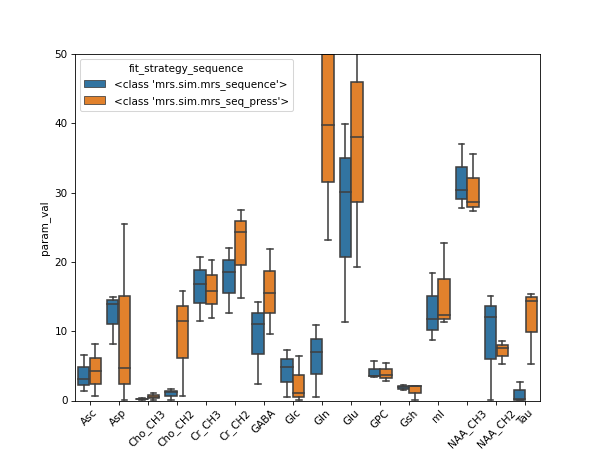

(0.0, 50.0)

In [87]:
df = df_brain

this_df = df.loc[(df["param_p"] == "cm") & 
                 (df["param_p_type"] == "params_fit_T2norm_abs_obj_with_err_prct") & 
                 (df["param_p_val_type"] == "val") &
                 (df["fit_strategy_name"].str.find("hardest") > -1) &
                 ~(df["param_m"].isin(["Lip1", "Lip2", "Water"]))]

plt.figure()
g = sns.boxplot(x="param_m", 
                y="param_val",
                hue="fit_strategy_sequence",
                data=this_df, showfliers = False)

plt.xticks(rotation=45)
plt.ylim([0, 50])

When fitting good brain MR sLASER spectra, CRBs of most coupled metabolites are increased when using a sLASER signal modelling... :( Better to use PRESS until I fix the problem.

#### Fit strategies & R2/FQN
Which one to choose? Based on fit criteria (RSQ, FQN)

<IPython.core.display.Javascript object>


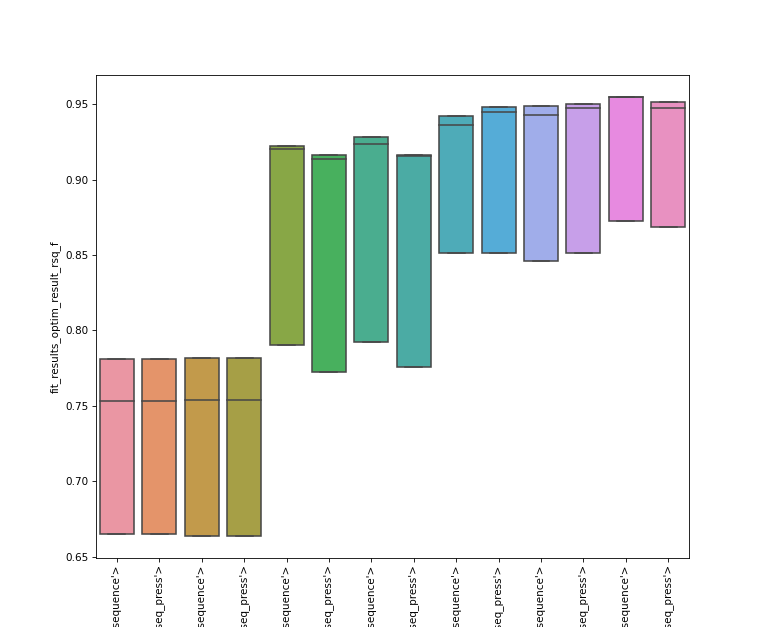

<IPython.core.display.Javascript object>


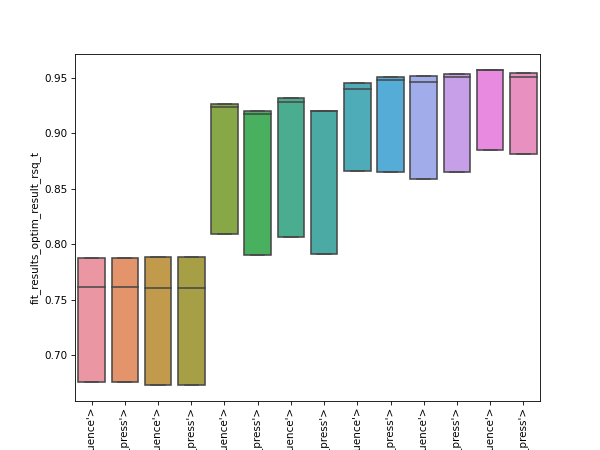

<IPython.core.display.Javascript object>


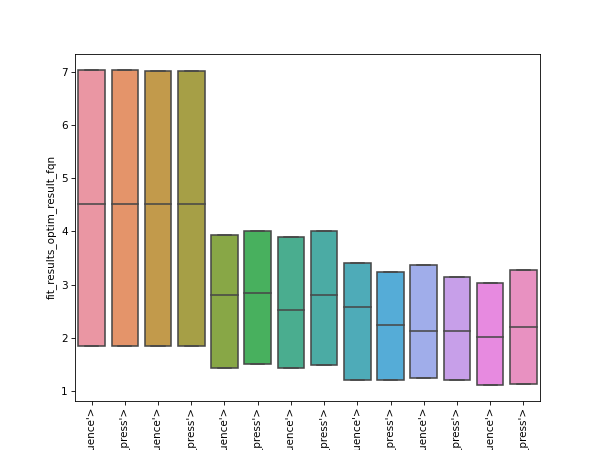

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, "singlets_<class 'mrs.sim.mrs_sequence'>"),
  Text(1, 0, "singlets_<class 'mrs.sim.mrs_seq_press'>"),
  Text(2, 0, "singlets_free_<class 'mrs.sim.mrs_sequence'>"),
  Text(3, 0, "singlets_free_<class 'mrs.sim.mrs_seq_press'>"),
  Text(4, 0, "singlets_CH2s_mI_<class 'mrs.sim.mrs_sequence'>"),
  Text(5, 0, "singlets_CH2s_mI_<class 'mrs.sim.mrs_seq_press'>"),
  Text(6, 0, "free_singlets_CH2s_mI_<class 'mrs.sim.mrs_sequence'>"),
  Text(7, 0, "free_singlets_CH2s_mI_<class 'mrs.sim.mrs_seq_press'>"),
  Text(8, 0, "singlets_CH2s_mI_Glx_Tau_<class 'mrs.sim.mrs_sequence'>"),
  Text(9, 0, "singlets_CH2s_mI_Glx_Tau_<class 'mrs.sim.mrs_seq_press'>"),
  Text(10, 0, "free_singlets_CH2s_mI_Glx_Tau_<class 'mrs.sim.mrs_sequence'>"),
  Text(11, 0, "free_singlets_CH2s_mI_Glx_Tau_<class 'mrs.sim.mrs_seq_press'>"),
  Text(12, 0, "free_singlets_hardest_<class 'mrs.sim.mrs_sequence'>"),
  Text(13, 0, "free_singlets_hardest_<class '

In [98]:
df = df_brain

this_df = df

plt.figure()
g = sns.boxplot(x="fit_strategy_name", 
                y="fit_results_optim_result_rsq_f",
                data=this_df)
plt.xticks(rotation=90)

plt.figure()
g = sns.boxplot(x="fit_strategy_name", 
                y="fit_results_optim_result_rsq_t",
                data=this_df)
plt.xticks(rotation=90)

plt.figure()
g = sns.boxplot(x="fit_strategy_name", 
                y="fit_results_optim_result_fqn",
                data=this_df)
plt.xticks(rotation=90)

Numerical fitting criteria show that simulating PRESS of sLASER does not make a huge difference... Maybe check metabolite by metabolite using CRB. 

#### Fit strategies & CRBs
Which one to choose? Based on fit CRBs

<IPython.core.display.Javascript object>


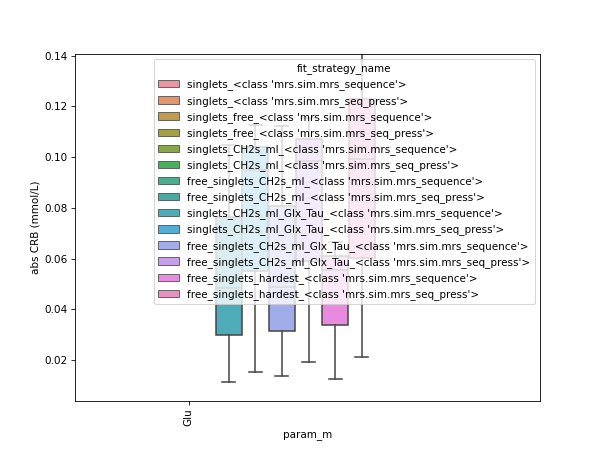

<IPython.core.display.Javascript object>


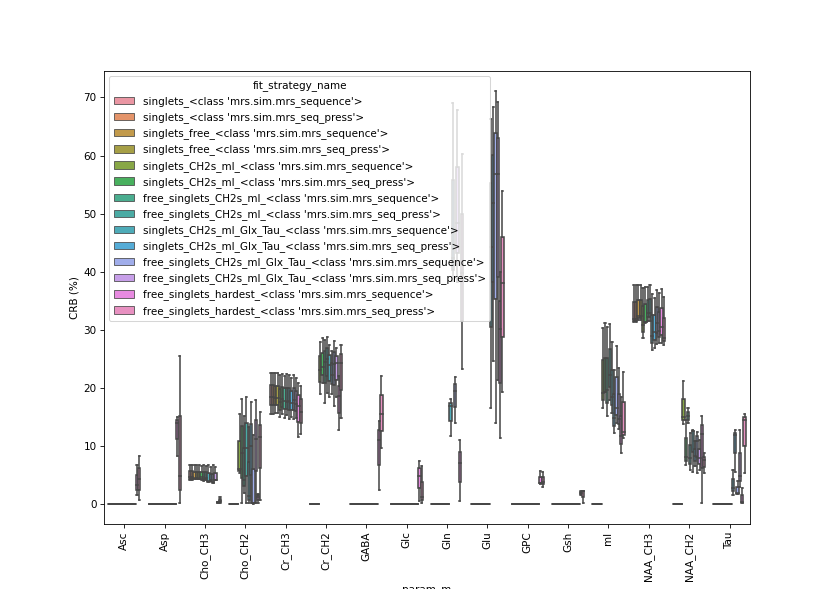

Text(0, 0.5, 'CRB (%)')

In [99]:
df = df_brain

this_df = df.loc[(df["param_p"] == "cm") & 
                 (df["param_p_type"] == "params_fit_T2norm_abs_obj") & 
                 (df["param_p_val_type"] == "err") &
                 ~(df["param_m"].isin(["Lip1", "Lip2", "Water"]))]

plt.figure()
g = sns.boxplot(x="param_m", 
                y="param_val",
                hue="fit_strategy_name",
                data=this_df, showfliers = False)
plt.xticks(rotation=90)
plt.ylabel("abs CRB (mmol/L)")

this_df = df.loc[(df["param_p"] == "cm") & 
                 (df["param_p_type"] == "params_fit_T2norm_abs_obj_with_err_prct") & 
                 (df["param_p_val_type"] == "val") &
                 ~(df["param_m"].isin(["Lip1", "Lip2", "Water"]))]

plt.figure()
g = sns.boxplot(x="param_m", 
                y="param_val",
                hue="fit_strategy_name",
                data=this_df, showfliers = False)
plt.xticks(rotation=90)
plt.ylabel("CRB (%)")


* Results from previous sections confirmed here. The PRESS simulated sequence should be used for the fitting. sLASER simulated sequence only showed nearly systematic CRB increase... :( We have a bug.
* Moreover, looks like the more metabolites we put, the better it is for all metabolites --> ON BRAIN DATA.

## Stuff


In [ ]:
df = df_sc

this_df = df.loc[(df["param_p"] == "cm") & 
                 (df["param_p_type"] == "params_fit_T2norm_abs_obj_with_err_prct") & 
                 (df["param_p_val_type"] == "err") &
                 ~(df["param_m"].isin(["Lip1", "Lip2", "Water"]))]

plt.figure()
g = sns.boxplot(x="param_m", 
                y="param_val",
                hue="fit_strategy_name",
                data=this_df, showfliers = False)
plt.xticks(rotation=45)
plt.ylim([0, 50])

# Some more questions

* More generally, what is a good MRS quality criterium? SNR, LW, CRBs ? Does CRBs are linear with SNR ?
"From  julliepanmac : I suggest that the adequacy of the spectral model to fit the data could be a way to reject poor data. At least for singlets, we have found that the co-linearity of the reported CRLB with measured sqrt(LW)/SNR could be useful."

* Choosing SNR/LW threshold

* Percentage of exploitable scans/patients

* Water LW looks visually good in SC compared to brain right? So why is the data so different? Metabolite concentrations?

* check for intra-subject repro if any data

* What does CRB errors depend on? scatter plots CRBS(met) = f(SNR, FWHM)
    * Use this to choose which metabolites to include, how many NA are really needed

* CRBs: relative / absolute? work according to the last quantification review!

* Percentage of acceptable or quantifiable MR spectra?


# Correlation matrix analysis
In case I missed something interesting!

## Generate a correlation matrix of all parameters
To find any correlations between any parameters

In [ ]:
df = df_sc

# correlate only numeric fields
df_num = df.select_dtypes(include=np.number)
df_corr = df_num.corr(min_periods=5).abs()

df_corr = df_corr["dataset_snr_final"]
df_corr = df_corr.loc[df_corr < (1.00 - 1e-6)]
df_corr = df_corr.loc[df_corr > 0.50]
df_corr = df_corr.sort_values(ascending=False)
df_corr

## Plot manually some findings
Choose from the following, according to correlation coeff:
* Could not find any interesting corr for SNR except with other snr estimations, fit criterias and data rejection bounds
* BMI and BFP are connected to data rejection (chemical shift, phase bounds), effective acq time, vref, tr, shims 3 & 4, exc pulse durations, f0
* LW maybe connected to noise level, phase rejection bound, shim3, shim6, weight, voi size, shim1, tr, f0, heart, height, pulse dur, vref, r, n
* Vref connected to tr, pulse dur, posY, patient weight/height
* TE is linked to pulse dur, n
* FQN, RSQs are linked to rejection bounds, snr, vref

with a R threshold of 0.5

In [ ]:
# list pairs of keys to plot correlation
interesting_corrs = {}
interesting_corrs["dataset_snr_final"] = ["dataset_raw_data__data_rejection[0]_Rejection bounds_amplitude (%)",
                                          "dataset_raw_data__data_rejection[0]_Rejection bounds_chemical shift (ppm)",
                                          "dataset_raw_data__data_rejection[0]_Rejection bounds_linewidth (Hz)[1]",
                                          "dataset_raw_data__data_rejection[0]_Rejection bounds_phase std. factor (%)",
                                         "dataset_prerej_amplitude_mean",
"dataset_prerej_linewidth_mean",
"dataset_prerej_chemical_shift_mean",
"dataset_prerej_phase_mean",
"dataset_prerej_amplitude_std",
"dataset_prerej_linewidth_std",
"dataset_prerej_chemical_shift_std",
"dataset_prerej_phase_std"]

interesting_corrs["dataset_patient_bmi"] = ["dataset_raw_data__data_rejection[0]_Rejection bounds_amplitude (%)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_chemical shift (ppm)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_linewidth (Hz)[1]",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_phase std. factor (%)",
                                            "dataset_raw_data__sequence_eff_acquisition_time",
                                            "dataset_raw_data__sequence_vref",
                                            "dataset_raw_data__sequence_tr",
                                            "dataset_raw_data__sequence_shims[0]",
                                            "dataset_raw_data__sequence_shims[1]",
                                            "dataset_raw_data__sequence_shims[2]",
                                            "dataset_raw_data__sequence_shims[3]",
                                            "dataset_raw_data__sequence_shims[4]",
                                            "dataset_raw_data__sequence_shims[5]",
                                            "dataset_raw_data__sequence_shims[6]",
                                            "dataset_raw_data__sequence_shims[7]",
                                            "dataset_raw_data__sequence_pulse_exc_duration",
                                            "dataset_raw_data__sequence_f0",
"dataset_prerej_linewidth_mean",
"dataset_prerej_chemical_shift_mean",
"dataset_prerej_phase_mean",
"dataset_prerej_amplitude_std",
"dataset_prerej_linewidth_std",
"dataset_prerej_chemical_shift_std",
"dataset_prerej_phase_std"]

interesting_corrs["dataset_patient_bfp"] = ["dataset_raw_data__data_rejection[0]_Rejection bounds_amplitude (%)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_chemical shift (ppm)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_linewidth (Hz)[1]",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_phase std. factor (%)",
                                            "dataset_raw_data__sequence_eff_acquisition_time",
                                            "dataset_raw_data__sequence_vref",
                                            "dataset_raw_data__sequence_tr",
                                            "dataset_raw_data__sequence_shims[0]",
                                            "dataset_raw_data__sequence_shims[1]",
                                            "dataset_raw_data__sequence_shims[2]",
                                            "dataset_raw_data__sequence_shims[3]",
                                            "dataset_raw_data__sequence_shims[4]",
                                            "dataset_raw_data__sequence_shims[5]",
                                            "dataset_raw_data__sequence_shims[6]",
                                            "dataset_raw_data__sequence_shims[7]",
                                            "dataset_raw_data__sequence_pulse_exc_duration",
                                            "dataset_raw_data__sequence_f0",
"dataset_prerej_linewidth_mean",
"dataset_prerej_chemical_shift_mean",
"dataset_prerej_phase_mean",
"dataset_prerej_amplitude_std",
"dataset_prerej_linewidth_std",
"dataset_prerej_chemical_shift_std",
"dataset_prerej_phase_std"]

interesting_corrs["dataset_lw"] = ["dataset_raw_data__noise_level",
                                   "dataset_raw_data__data_rejection[0]_Rejection bounds_amplitude (%)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_chemical shift (ppm)",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_linewidth (Hz)[1]",
                                            "dataset_raw_data__data_rejection[0]_Rejection bounds_phase std. factor (%)",
                                            "dataset_raw_data__sequence_eff_acquisition_time",
                                            "dataset_raw_data__sequence_vref",
                                            "dataset_raw_data__sequence_tr",
                                            "dataset_raw_data__sequence_shims[0]",
                                            "dataset_raw_data__sequence_shims[1]",
                                            "dataset_raw_data__sequence_shims[2]",
                                            "dataset_raw_data__sequence_shims[3]",
                                            "dataset_raw_data__sequence_shims[4]",
                                            "dataset_raw_data__sequence_shims[5]",
                                            "dataset_raw_data__sequence_shims[6]",
                                            "dataset_raw_data__sequence_shims[7]",
                                            "dataset_raw_data__sequence_pulse_exc_duration",
                                            "dataset_raw_data__sequence_f0",
                                            "dataset_raw_data__patient_weight",
                                            "dataset_voxel_vol_cm3",
                                            #"dataset_heart_bpm",
                                            "dataset_raw_data__patient_height",
                                            "dataset_raw_data__sequence_pulse_rfc_duration",
                                            "dataset_raw_data__sequence_pulse_rfc_r",
                                            "dataset_raw_data__sequence_pulse_rfc_n",
"dataset_prerej_linewidth_mean",
"dataset_prerej_chemical_shift_mean",
"dataset_prerej_phase_mean",
"dataset_prerej_amplitude_std",
"dataset_prerej_linewidth_std",
"dataset_prerej_chemical_shift_std",
"dataset_prerej_phase_std"]


interesting_corrs["dataset_raw_data__sequence_vref"] = ["dataset_raw_data__sequence_tr",
                                            "dataset_raw_data__patient_weight",
                                            "dataset_raw_data__patient_height",
                                            "dataset_raw_data__sequence_pulse_exc_duration",
                                            "dataset_raw_data__sequence_pulse_rfc_duration",
                                                       "dataset_raw_data_posY_mm"]


interesting_corrs["dataset_raw_data__sequence_te"] = ["dataset_raw_data__sequence_pulse_exc_duration",
                                            "dataset_raw_data__sequence_pulse_rfc_duration",
                                                       "dataset_raw_data__sequence_pulse_rfc_n"]

# now plot all this stuff
for p1, p2_list in interesting_corrs.items():
    for p2 in p2_list:

        this_df_num = df_num.loc[ ~np.isnan(df_num[p1])
                                & ~np.isinf(df_num[p1])
                                & ~np.isnan(df_num[p2])
                                & ~np.isinf(df_num[p2])]

        rrr = this_df_num[p1].corr(this_df_num[p2])
        if(np.abs(rrr) > 0.5):
            print("p1 = %s | p2 = %s" % (p1, p2))
            x = df[p1].astype(np.float)
            y = df[p2].astype(np.float)
            g = sns.JointGrid(x=x, y=y)
            g.plot_joint(sns.regplot)
            # g.plot_marginals(sns.histplot, kde=True)
            print("R = %.2f" % x.corr(y))


Actually, when we really look at the scatter plots and recalculate the correlation coeff, there is not much than stays above 0.5... And what is left, we could definitely guessed: Vref & pulse durations, etc. 